In [1]:
% matplotlib inline
# % config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pickle

from limlam_mocker import limlam_mocker as llm
#Get Parameters for run
from limlam_mocker import params        as params

import lnn as lnn

### load in models
from models_to_load import *

np.random.seed(1337)

%load_ext autoreload

In [2]:
%autoreload
# %autoreload 0
#%autoreload 2

# Setup Learning Enviornment

In [3]:
import tensorflow as tf
from tensorflow import keras

mapLoc = '../maps2/basic_Li/'
different_mapLoc = '../maps2/random_maps2/'
random_small_Li_mapLoc = '../maps2/random_small_Li/'
catLoc = '../catalogues2/'
modelLoc = '../models2/'
modelLoc2 = '../models3/'

### map info
numb_maps = 100
pix_x = 256
pix_y = 256

### output info
lum_func_size = 49

# Load Models

In [4]:
log_lum_full_in_6_layer_kernel_3_2D = get_master_(modelLoc2, pix_x, pix_y, numb_maps, lum_func_size,
                                extra_file_name='', file_name='log_lum_full_in_6_layer_kernel_3_2D',
                                train_number=1, give_weights=True,
                                droprate=0.2, numb_layers=6, base_filters=32, threeD=False,
                                luminosity_byproduct='log', kernel_size=3)

In [16]:
log_lum_full_in_6_layer_2D_basic_Li = get_master_2(modelLoc2, pix_x, pix_y, numb_maps, lum_func_size,
                                extra_file_name='', file_name='log_lum_full_in_6_layer_2D_basic_Li',
                                train_number=0, give_weights=True,
                                droprate=0.2, numb_layers=6, base_filters=32, threeD=False,
                                luminosity_byproduct='log', kernel_size=3)

In [6]:
log_lum_full_in_6_resnet_basic_Li = get_master_res_next(modelLoc2, pix_x, pix_y, numb_maps, lum_func_size,
                                extra_file_name='', file_name='log_lum_full_in_6_resnet_basic_Li',
                                train_number=0,
                                base_filters=32,
                                cardinality=1,
                                give_weights=True)

In [7]:
log_lum_full_in_6_layer_kernel_3_2D_random_maps = get_master_(modelLoc2, pix_x, pix_y, numb_maps, lum_func_size,
                                extra_file_name='', file_name='log_lum_full_in_6_layer_kernel_3_2D_random_maps1',
                                train_number=0,
                                droprate=0.2, numb_layers=6, base_filters=32, threeD=False,
                                luminosity_byproduct='log', kernel_size=3)

In [8]:
log_lum_full_in_6_resnet_different_maps = get_master_res_next(modelLoc2, pix_x, pix_y, numb_maps, lum_func_size,
                                extra_file_name='', file_name='log_lum_full_in_6_resnet_different_maps',
                                train_number=0,
                                base_filters=32,
                                cardinality=1,
                                give_weights=True)

In [38]:
log_lum_full_in_6_layer_2D_random_small_Li = get_master_2(modelLoc2, pix_x, pix_y, numb_maps, lum_func_size,
                                extra_file_name='', file_name='log_lum_full_in_6_layer_2D_random_small_Li',
                                train_number=0, give_weights=True,
                                droprate=0.2, numb_layers=6, base_filters=32, threeD=False,
                                luminosity_byproduct='log', kernel_size=3)

In [10]:
log_lum_full_in_6_layer_2D_hyper_params_random_small_Li = get_master_2(modelLoc2, pix_x, pix_y, numb_maps, lum_func_size,
                                extra_file_name='', file_name='log_lum_full_in_6_layer_2D_hyper_params_random_small_Li',
                                train_number=0, give_weights=True,
                                droprate=0.2, numb_layers=6, base_filters=32, threeD=False,
                                luminosity_byproduct='log', kernel_size=3)

In [39]:
log_lum_full_in_6_resnet_random_small_Li = get_master_res_next(modelLoc2, pix_x, pix_y, numb_maps, lum_func_size,
                                extra_file_name='', file_name='log_lum_full_in_6_resnet_random_small_Li',
                                train_number=0,
                                base_filters=32,
                                cardinality=1,
                                give_weights=True)

In [12]:
log_lum_full_in_6_resnet_hyper_params_random_small_Li = get_master_res_next(modelLoc2, pix_x, pix_y, numb_maps, lum_func_size,
                                extra_file_name='', file_name='log_lum_full_in_6_resnet_hyper_params_random_small_Li',
                                train_number=0,
                                base_filters=32,
                                cardinality=1,
                                give_weights=True)

In [13]:
log_lum_full_in_6_resnet_hyper_params_64_layers_random_small_Li = get_master_res_next(modelLoc2, pix_x, pix_y, numb_maps, lum_func_size,
                                extra_file_name='', file_name='log_lum_full_in_6_resnet_hyper_params_64_layers_random_small_Li',
                                train_number=0,
                                base_filters=32,
                                cardinality=1,
                                give_weights=True)

In [14]:
log_lum_full_in_6_resnet_hyper_params_small_128_layers_random_small_Li = get_master_res_next(modelLoc2, pix_x, pix_y, numb_maps, lum_func_size,
                                extra_file_name='', file_name='log_lum_full_in_6_resnet_hyper_params_small_128_layers_random_small_Li',
                                train_number=0,
                                base_filters=32,
                                cardinality=1,
                                give_weights=True)

In [30]:
smaller_test = get_master_2(modelLoc2, 64, 64, 4, lum_func_size,
                                extra_file_name='', file_name='smaller_test2',
                                train_number=0, give_weights=True,
                                droprate=0.5, numb_layers=5, base_filters=64, threeD=True,
                                luminosity_byproduct='log', kernel_size=3,
                                dense_layer=500)

In [47]:
smaller_test_less_lums = get_master_2(modelLoc2, 64, 64, 4, 3,
                                extra_file_name='', file_name='smaller_test_less_lums',
                                train_number=0, give_weights=True,
                                droprate=0.5, numb_layers=5, base_filters=64, threeD=True,
                                luminosity_byproduct='log', kernel_size=3,
                                dense_layer=500)

In [24]:
smaller_test6 = get_master_2(modelLoc2, 64, 64, 4, lum_func_size,
                                extra_file_name='', file_name='smaller_test6',
                                train_number=0, give_weights=True,
                                droprate=0.5, numb_layers=5, base_filters=64, threeD=True,
                                luminosity_byproduct='log', kernel_size=3,
                                dense_layer=500, use_bias=False)

In [13]:
smaller_test_no_first_bias = get_master_2(modelLoc2, 64, 64, 4, lum_func_size,
                                extra_file_name='', file_name='smaller_test_no_first_bias',
                                train_number=0, give_weights=True,
                                droprate=0.5, numb_layers=5, base_filters=128, threeD=True,
                                luminosity_byproduct='log', kernel_size=3,
                                dense_layer=500, use_bias=False)

In [4]:
smaller_test_no_first_bias2 = get_master_2(modelLoc2, 64, 64, 4, lum_func_size,
                                extra_file_name='', file_name='smaller_test_no_first_bias2',
                                train_number=0, give_weights=True,
                                droprate=0.5, numb_layers=5, base_filters=128, threeD=True,
                                luminosity_byproduct='log', kernel_size=3,
                                dense_layer=1000, use_bias=False)

In [41]:
smaller_test_no_first_bias3 = get_master_2(modelLoc2, 64, 64, 4, lum_func_size,
                                extra_file_name='', file_name='smaller_test_no_first_bias3',
                                train_number=0, give_weights=True,
                                droprate=0.5, numb_layers=5, base_filters=128, threeD=True,
                                luminosity_byproduct='log', kernel_size=3,
                                dense_layer=1000, use_bias=False)

In [24]:
smaller_test_less_lums_high = get_master_2(modelLoc2, 64, 64, 4, 5,
                                extra_file_name='', file_name='smaller_test_less_lums_high',
                                train_number=0, give_weights=True,
                                droprate=0.5, numb_layers=5, base_filters=128, threeD=True,
                                luminosity_byproduct='log', kernel_size=3,
                                dense_layer=1000, use_bias=False)

In [37]:
small_resnet = get_master_res_next(modelLoc2, 64, 64, 4, lum_func_size,
                                extra_file_name='', file_name='small_resnet',
                                train_number=0,
                                base_filters=64,
                                cardinality=1, use_bias=False,
                                give_weights=True)

In [26]:
smaller_test_no_first_bias2 = get_master_2(modelLoc2, 64, 64, 100, -5,
                                extra_file_name='', file_name='smaller_test_no_first_bias2',
                                train_number=0, give_weights=True,
                                droprate=0.5, numb_layers=5, base_filters=128, threeD=True,
                                luminosity_byproduct='log', kernel_size=3,
                                dense_layer=1000, use_bias=False)

In [27]:
smaller_test_high = get_master_2(modelLoc2, 64, 64, 100, -10,
                                extra_file_name='', file_name='smaller_test_high',
                                train_number=0, give_weights=True,
                                droprate=0.5, numb_layers=5, base_filters=128, threeD=True,
                                luminosity_byproduct='log', kernel_size=3,
                                dense_layer=1000, use_bias=False)

In [49]:
smaller_test_low = get_master_2(modelLoc2, 64, 64, 10, 5,
                                extra_file_name='', file_name='smaller_test_no_first_bias3',
                                train_number=0, give_weights=True,
                                droprate=0.5, numb_layers=4, base_filters=64, threeD=True,
                                luminosity_byproduct='log', kernel_size=3,
                                dense_layer=1000, use_bias=False)

In [34]:
smaller_test_ann_high = get_master_ann(modelLoc2, 64, 64, 10, -10,
                                extra_file_name='', file_name='smaller_test_ann_high',
                                train_number=0, give_weights=True,
                                droprate=0.5,
                                luminosity_byproduct='log',
                                use_bias=True)

In [44]:
smaller_test_ann_low = get_master_ann(modelLoc2, 64, 64, 10, 5,
                                extra_file_name='', file_name='smaller_test_ann_low',
                                train_number=0, give_weights=True,
                                droprate=0.5,
                                luminosity_byproduct='log',
                                use_bias=True)

In [4]:
adam_test = get_master_adam(modelLoc2, 64, 64, 100, -10,
                                extra_file_name='', file_name='adam_test',
                                train_number=0, give_weights=True,
                                droprate=0.5, numb_layers=5, base_filters=128, threeD=True,
                                luminosity_byproduct='log', kernel_size=3,
                                dense_layer=1000, use_bias=True)

In [5]:
adam_test2 = get_master_adam(modelLoc2, 64, 64, 10, 21,
                                extra_file_name='', file_name='adam_test2',
                                train_number=0, give_weights=True,
                                droprate=0.5, numb_layers=5, base_filters=128, threeD=True,
                                luminosity_byproduct='log', kernel_size=3,
                                dense_layer=1000, use_bias=True)

In [6]:
adam_test3 = get_master_adam(modelLoc2, 64, 64, 10, lum_func_size,
                                extra_file_name='', file_name='adam_test3',
                                train_number=0, give_weights=True,
                                droprate=0.5, numb_layers=5, base_filters=128, threeD=True,
                                luminosity_byproduct='log', kernel_size=3,
                                dense_layer=1000, use_bias=True)

In [7]:
adam_test4 = get_master_adam(modelLoc2, 64, 64, 10, -21,
                                extra_file_name='', file_name='adam_test4',
                                train_number=0, give_weights=True,
                                droprate=0.5, numb_layers=5, base_filters=128, threeD=True,
                                luminosity_byproduct='log', kernel_size=3,
                                dense_layer=1000, use_bias=True)

In [8]:
adam_test5 = get_master_adam(modelLoc2, 64, 64, 10, lum_func_size,
                                extra_file_name='', file_name='adam_test5',
                                train_number=0, give_weights=True,
                                droprate=0.5, numb_layers=6, base_filters=64, threeD=True,
                                luminosity_byproduct='log', kernel_size=3,
                                dense_layer=1000, use_bias=True)

In [9]:
adam_test6 = get_master_adam(modelLoc2, 64, 64, 10, lum_func_size,
                                extra_file_name='', file_name='adam_test6',
                                train_number=0, give_weights=True,
                                droprate=0.5, numb_layers=6, base_filters=64, threeD=True,
                                luminosity_byproduct='log', kernel_size=3,
                                dense_layer=1000, use_bias=True)

In [10]:
adam_test7 = get_master_adam(modelLoc2, 64, 64, 10, lum_func_size,
                                extra_file_name='', file_name='adam_test7',
                                train_number=0, give_weights=True,
                                droprate=0.5, numb_layers=6, base_filters=64, threeD=True,
                                luminosity_byproduct='log', kernel_size=3,
                                dense_layer=1000, use_bias=True)

In [19]:
adam_test6.layers[0].get_weights()

[array([[[[[ 0.01992858,  0.03165834,  0.07522763, ..., -0.01149231,
            -0.03049834, -0.05911932]],
 
          [[ 0.00372577, -0.0088508 , -0.06386064, ..., -0.0418389 ,
            -0.06784757, -0.04360371]],
 
          [[-0.06972496,  0.00807202, -0.00293145, ..., -0.00790894,
            -0.03281407, -0.03254803]]],
 
 
         [[[ 0.03184522, -0.02920556, -0.04335292, ..., -0.05911105,
            -0.06578479, -0.0367799 ]],
 
          [[-0.05216769,  0.01626278, -0.08312989, ...,  0.03727726,
            -0.02296868, -0.03616945]],
 
          [[-0.04441616, -0.04259036, -0.05501696, ..., -0.04832802,
            -0.01158962,  0.03310418]]],
 
 
         [[[-0.06398962,  0.05632506,  0.03820121, ..., -0.06602398,
            -0.04698429, -0.01983309]],
 
          [[ 0.04479606,  0.02855587, -0.0401061 , ..., -0.02566423,
             0.03314571,  0.0213948 ]],
 
          [[-0.06415933,  0.02026332,  0.00816866, ..., -0.07163016,
            -0.0190972 , -0.04957493]

# Load the maps

In [11]:
subFields = lnn.loadBaseFNames(mapLoc)
base = [mapLoc + s for s in subFields]
lumLogBinCents = lnn.loadData(base[152] + '_lum.npz')['logBinCent']

In [12]:
subFields = lnn.loadBaseFNames(different_mapLoc)
different_base = [different_mapLoc + s for s in subFields]

In [13]:
# subFields = lnn.loadBaseFNames(random_small_Li_mapLoc)
subFields = lnn.loadBaseFNames(random_small_Li_mapLoc)
random_small_Li_base = [random_small_Li_mapLoc + s for s in subFields]

In [14]:
subFields = lnn.loadBaseFNames(random_small_Li_mapLoc)
np.random.seed(1234)
np.random.shuffle(subFields)
np.random.seed()

### shuffle  test and validation data
random_small_Li_base = [random_small_Li_mapLoc + s for s in subFields]

# base = base[:100]

In [15]:
lumLogBinCents[:22]

array([   3433.32001828,    4047.08995076,    4770.58269614,
          5623.4132519 ,    6628.70316183,    7813.70737652,
          9210.55317689,   10857.11119402,   12798.02213998,
         15085.907086  ,   17782.79410039,   20961.79992453,
         24709.11227986,   29126.32654909,   34333.20018282,
         40470.8995076 ,   47705.82696144,   56234.13251903,
         66287.03161826,   78137.07376518,   92105.53176895,
        108571.11194022])

In [16]:
training_order = ['../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13613_rotate_0_subfield_24__Li_2.148e-02_1.392e+00_-2.305e+00_3.143e-01_2.946e-01', 
                  '../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13607_rotate_0_subfield_29__Li_2.532e-02_1.303e+00_-1.628e+00_3.092e-01_2.830e-01', 
                  '../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13707_rotate_0_subfield_11__Li_4.586e-02_1.432e+00_-7.655e-01_3.056e-01_2.895e-01', 
                  '../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13651_rotate_0_subfield_14__Li_-4.861e-03_1.356e+00_-1.584e+00_3.030e-01_3.026e-01', 
                  '../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13681_rotate_0_subfield_23__Li_-2.337e-02_1.315e+00_-1.738e+00_2.913e-01_2.998e-01', 
                  '../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13753_rotate_0_subfield_20__Li_-5.615e-03_1.447e+00_-1.926e+00_2.985e-01_3.062e-01', 
                  '../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13671_rotate_0_subfield_5__Li_3.565e-02_1.376e+00_-1.216e+00_3.177e-01_2.989e-01', 
                  '../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13709_rotate_0_subfield_17__Li_-2.590e-02_1.424e+00_-1.755e+00_3.108e-01_2.942e-01', 
                  '../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13763_rotate_0_subfield_31__Li_-4.284e-02_1.359e+00_-1.733e+00_3.015e-01_3.088e-01', 
                  '../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13759_rotate_0_subfield_8__Li_-2.958e-02_1.420e+00_-1.632e+00_2.980e-01_3.060e-01', 
                  '../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13701_rotate_0_subfield_30__Li_1.721e-02_1.380e+00_-1.939e+00_3.099e-01_3.016e-01', 
                  '../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13659_rotate_0_subfield_12__Li_-7.471e-03_1.368e+00_-1.996e+00_3.044e-01_2.839e-01']

In [38]:
for i, b in enumerate(random_small_Li_base):
    if 'seed_13883_rotate_0_subfield_12' in b:
        print(i)
        break
        
for i, b in enumerate(random_small_Li_base):
    if 'seed_13655_rotate_0_subfield_3' in b:
        print(i)
        break

5140
197


# See how good the models are

In [24]:
%autoreload

0 ----------------------------
Error and MSE for the given base_number:
[0.0041108205914497375, 0.0082395225763320923]


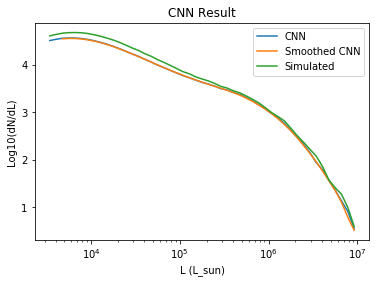

Error and MSE for the given base_number:
[0.0050084874965250492, 0.010036800988018513]


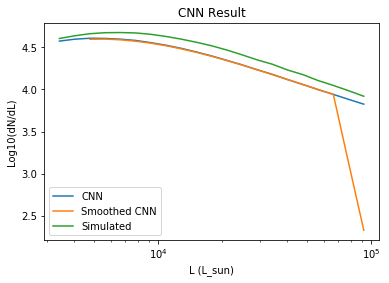

Error and MSE for the given base_number:
[0.0024387468583881855, 0.0048889419995248318]


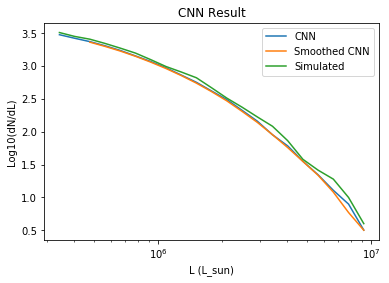

1 ----------------------------
Error and MSE for the given base_number:
[0.0026521256659179926, 0.005315891932696104]


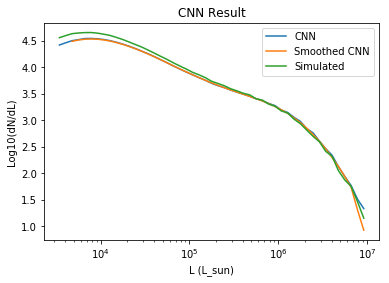

Error and MSE for the given base_number:
[0.0096541754901409149, 0.019390655681490898]


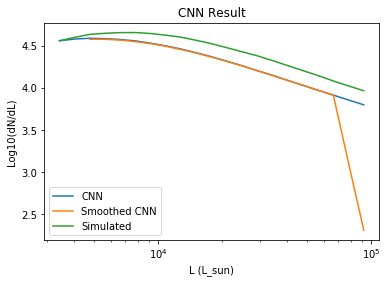

Error and MSE for the given base_number:
[0.00069134007208049297, 0.0013835392892360687]


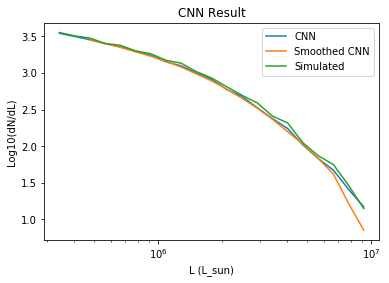

2 ----------------------------
Error and MSE for the given base_number:
[0.0033212669659405947, 0.0066546890884637833]


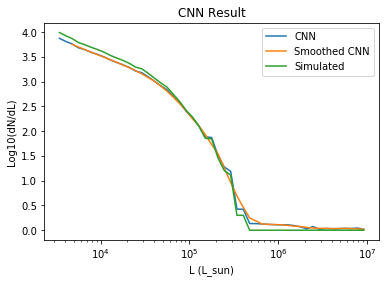

Error and MSE for the given base_number:
[0.0011061344994232059, 0.0022158192005008459]


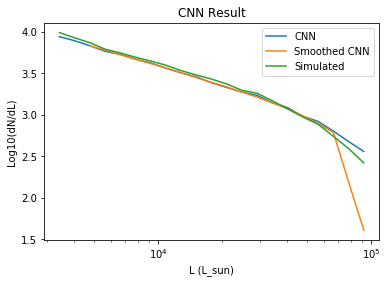

Error and MSE for the given base_number:
[0.017203453928232193, 0.034770626574754715]


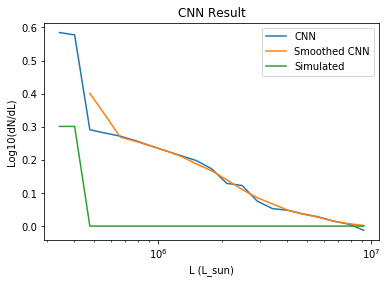

3 ----------------------------
Error and MSE for the given base_number:
[0.0024548829533159733, 0.0049243876710534096]


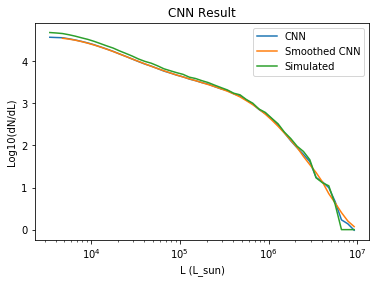

Error and MSE for the given base_number:
[0.0019644130952656269, 0.0039315330795943737]


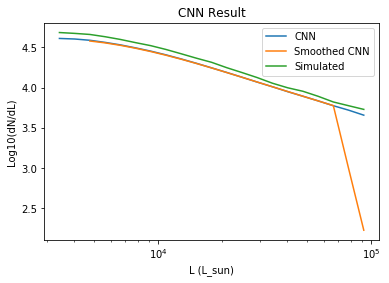

Error and MSE for the given base_number:
[0.00059638137463480234, 0.0011933951172977686]


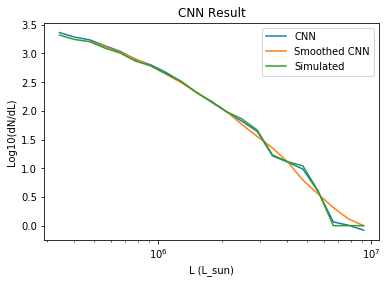

4 ----------------------------
Error and MSE for the given base_number:
[0.003917730413377285, 0.0078551536425948143]


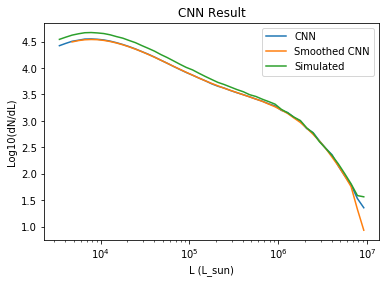

Error and MSE for the given base_number:
[0.0092345643788576126, 0.01855156198143959]


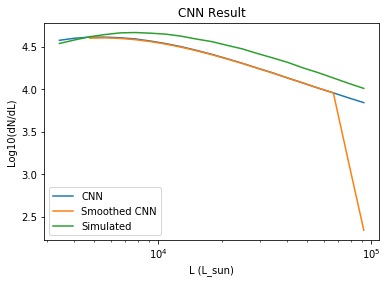

Error and MSE for the given base_number:
[0.0073441378772258759, 0.014791520312428474]


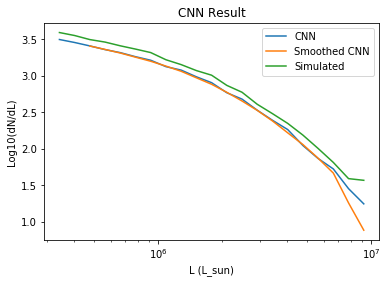

5 ----------------------------
Error and MSE for the given base_number:
[0.0048917289823293686, 0.0099157188087701797]


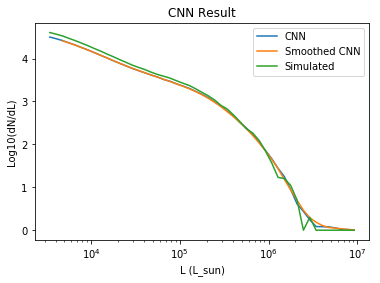

Error and MSE for the given base_number:
[0.0020373861771076918, 0.0040813693776726723]


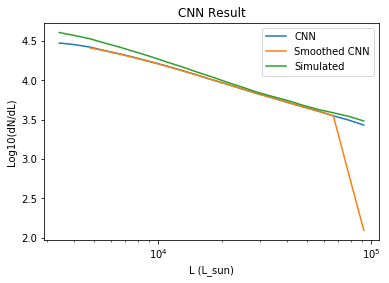

Error and MSE for the given base_number:
[0.0016308369813486934, 0.0032739788293838501]


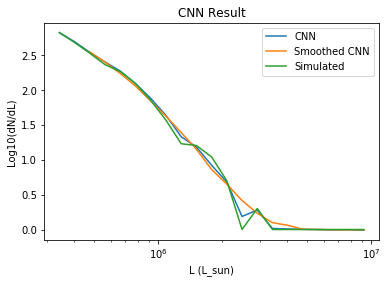

6 ----------------------------
Error and MSE for the given base_number:
[0.0060884039849042892, 0.012480422854423523]


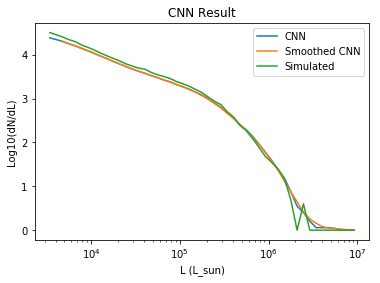

Error and MSE for the given base_number:
[0.00035228332853876054, 0.00070483348099514842]


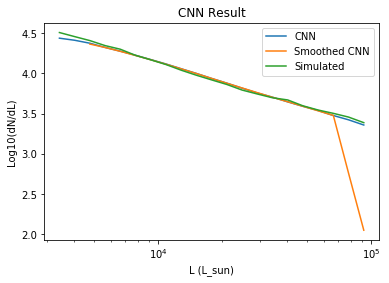

Error and MSE for the given base_number:
[0.0012509567895904183, 0.002513060113415122]


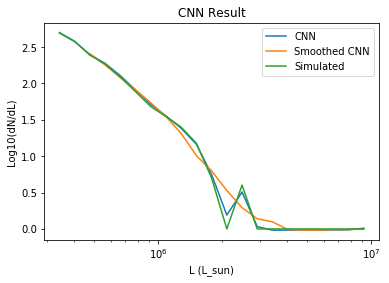

7 ----------------------------
Error and MSE for the given base_number:
[0.0050286538898944855, 0.010095765814185143]


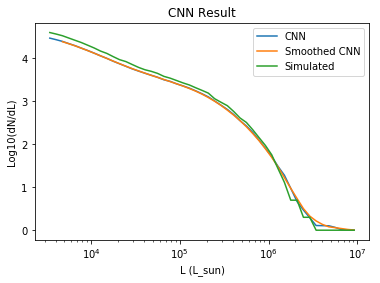

Error and MSE for the given base_number:
[0.0022617408540099859, 0.0045321565121412277]


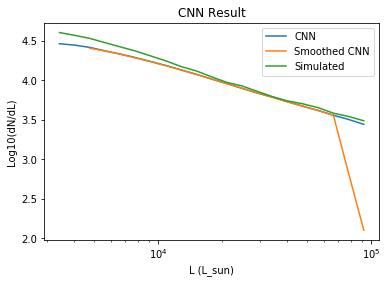

Error and MSE for the given base_number:
[0.0018770325696095824, 0.0037740955594927073]


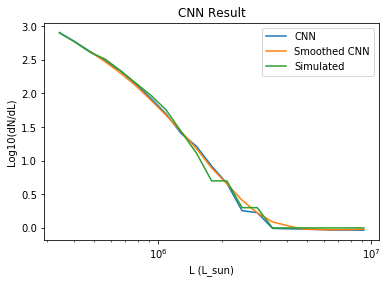

8 ----------------------------
Error and MSE for the given base_number:
[0.00098154006991535425, 0.00196654605679214]


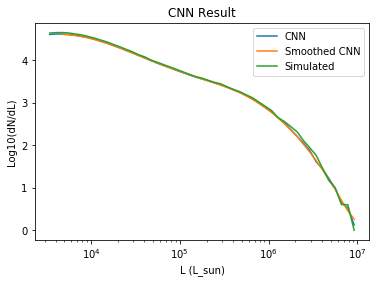

Error and MSE for the given base_number:
[0.0083855278789997101, 0.016820626333355904]


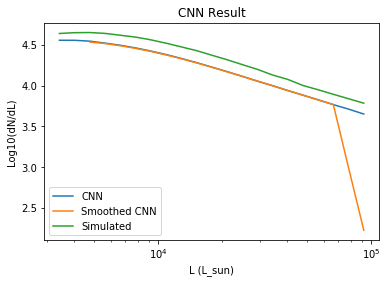

Error and MSE for the given base_number:
[0.00096402846975252032, 0.0019302150467410684]


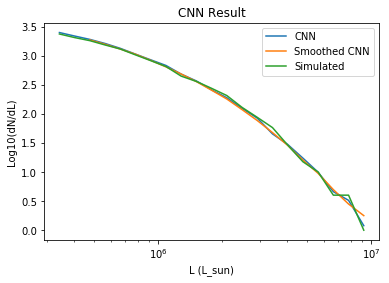

9 ----------------------------
Error and MSE for the given base_number:
[0.0041901920922100544, 0.0084243388846516609]


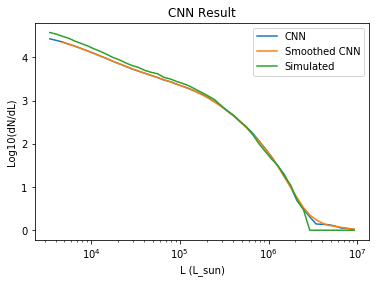

Error and MSE for the given base_number:
[0.0030269736889749765, 0.0060639465227723122]


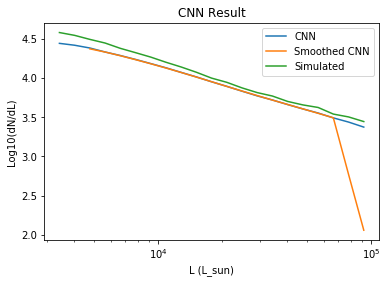

Error and MSE for the given base_number:
[0.0020873404573649168, 0.0041914423927664757]


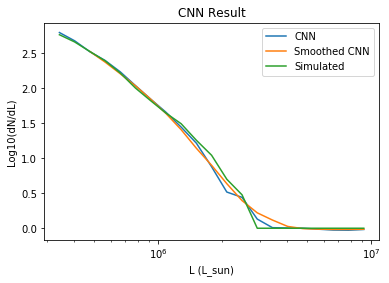

10 ----------------------------
Error and MSE for the given base_number:
[0.0019043440697714686, 0.0038141051772981882]


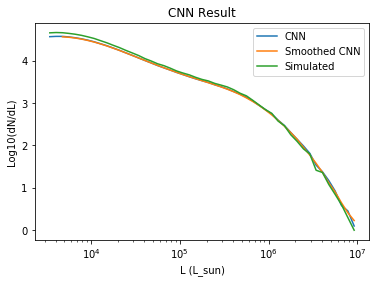

Error and MSE for the given base_number:
[0.0037256393115967512, 0.0074619436636567116]


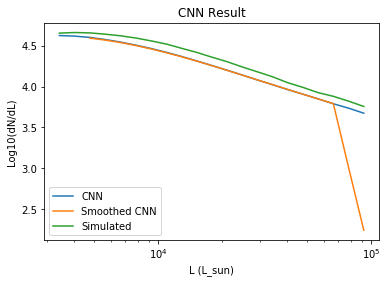

Error and MSE for the given base_number:
[0.00089179334463551641, 0.0017862786771729589]


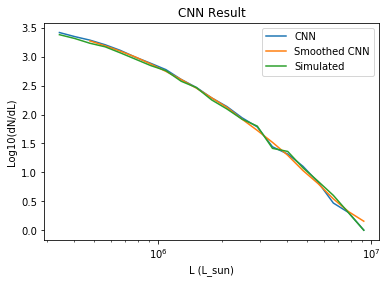

11 ----------------------------
Error and MSE for the given base_number:
[0.0057348036207258701, 0.011500977911055088]


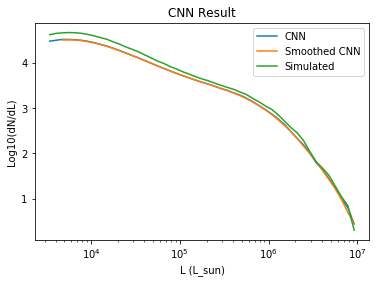

Error and MSE for the given base_number:
[0.0034546228125691414, 0.0069189853966236115]


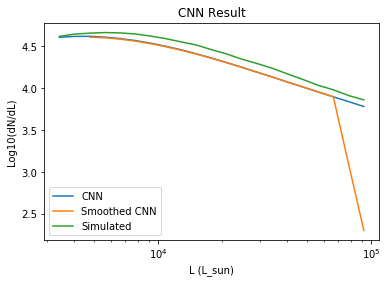

Error and MSE for the given base_number:
[0.0021335368510335684, 0.0042823245748877525]


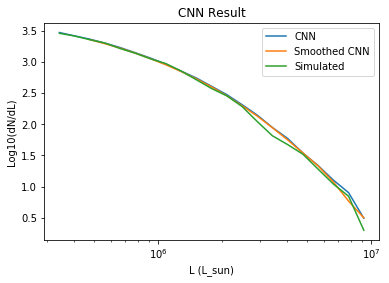

In [16]:
numb = 5 #1234 #10 is weirdly good....

for numb in range(12):
    print(numb, '----------------------------')
    cur_lum, cnn_lum = lnn.test_model(adam_test3, training_order, numb, 'log', True, pre_pool=4, 
                                          log_input=True, pre_pool_z=10, lum_func_size=lum_func_size)
    lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=lum_func_size)
    
    cur_lum, cnn_lum = lnn.test_model(adam_test2, training_order, numb, 'log', True, pre_pool=4, 
                                          log_input=True, pre_pool_z=10, lum_func_size=21)
    lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=21)

    cur_lum, cnn_lum = lnn.test_model(adam_test4, training_order, numb, 'log', True, pre_pool=4, 
                                          log_input=True, pre_pool_z=10, lum_func_size=-21)
    lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=-21)

In [33]:
lnn.test_model_multiple_times(adam_test3, random_small_Li_base, luminosity_byproduct='log',
                                threeD=True, log_input=True,
                                make_map_noisy=0, base_numbers=[], test_size=10,
                                pre_pool=4, pre_pool_z=10, lum_func_size=lum_func_size)

10/10 [==============================] - 234s 23s/step
[0.5750747933983803, 43.634043431282045]


In [20]:
lnn.test_model_multiple_times(adam_test5, random_small_Li_base, luminosity_byproduct='log',
                                threeD=True, log_input=True,
                                make_map_noisy=0, base_numbers=[], test_size=10,
                                pre_pool=4, pre_pool_z=10, lum_func_size=lum_func_size)

10/10 [==============================] - 200s 20s/step
[8.3936662383377545, 5393.5635843664404]


In [19]:
lnn.test_model_multiple_times(adam_test7, random_small_Li_base, luminosity_byproduct='log',
                                threeD=True, log_input=True,
                                make_map_noisy=0, base_numbers=[], test_size=10,
                                pre_pool=4, pre_pool_z=10, lum_func_size=lum_func_size)

10/10 [==============================] - 205s 21s/step
[0.006172699993476272, 0.012768389191478491]


In [34]:
base_numbers = np.random.choice(range(len(random_small_Li_base)), 12)

lnn.test_model_multiple_times(adam_test7, np.array(random_small_Li_base), luminosity_byproduct='log',
                                threeD=True, log_input=True,
                                make_map_noisy=0, base_numbers=base_numbers, test_size=10,
                                pre_pool=4, pre_pool_z=10, lum_func_size=lum_func_size)

10/10 [==============================] - 113s 11s/step
[0.0065130038186907765, 0.013429418019950391]


0 ----------------------------
Error and MSE for the given base_number:
[0.048127505928277969, 0.10482221841812134]


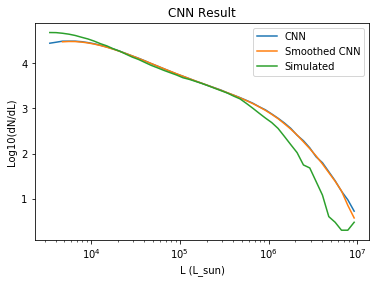

Error and MSE for the given base_number:
[0.06879974901676178, 0.1423812210559845]


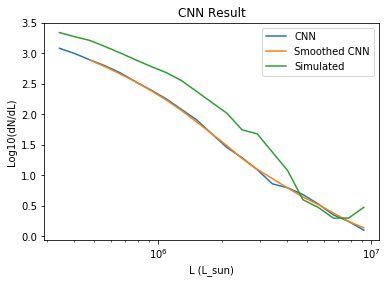

1 ----------------------------
Error and MSE for the given base_number:
[0.048421472311019897, 0.10650172829627991]


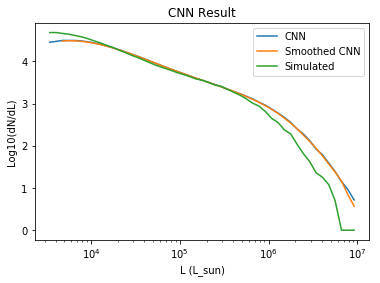

Error and MSE for the given base_number:
[0.073406577110290527, 0.15161572396755219]


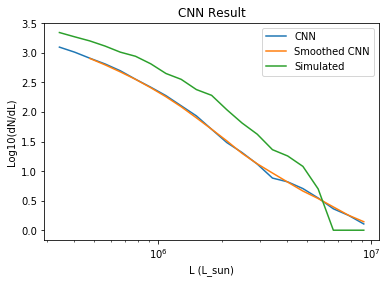

2 ----------------------------
Error and MSE for the given base_number:
[0.17074666917324066, 0.37464308738708496]


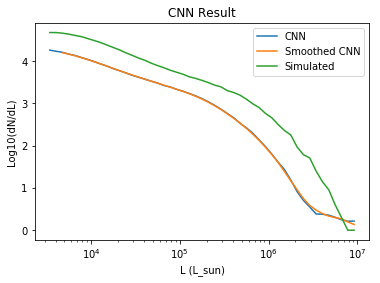

Error and MSE for the given base_number:
[0.38013771176338196, 0.91219872236251831]


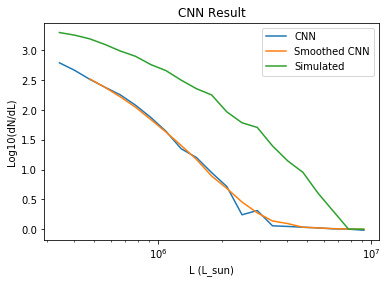

3 ----------------------------
Error and MSE for the given base_number:
[0.12421181052923203, 0.2615886926651001]


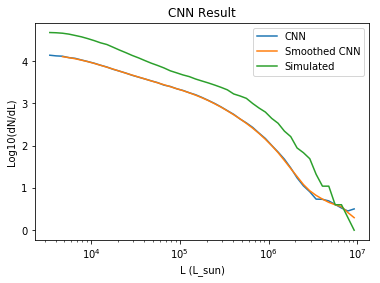

Error and MSE for the given base_number:
[0.0073644518852233887, 0.014869511127471924]


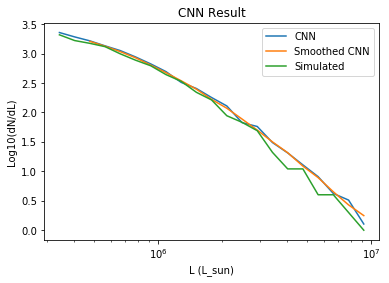

4 ----------------------------
Error and MSE for the given base_number:
[0.15678304433822632, 0.33494836091995239]


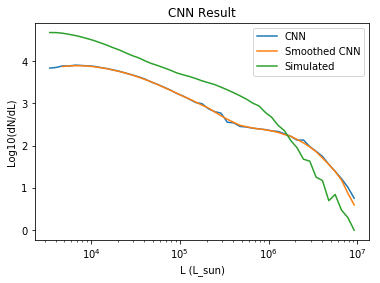

Error and MSE for the given base_number:
[0.005804828368127346, 0.011798286810517311]


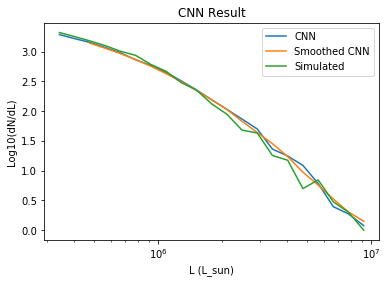

5 ----------------------------
Error and MSE for the given base_number:
[0.052464812994003296, 0.10816393047571182]


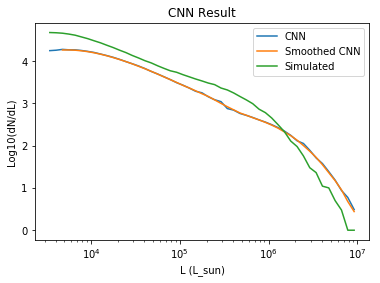

Error and MSE for the given base_number:
[0.080908931791782379, 0.17187748849391937]


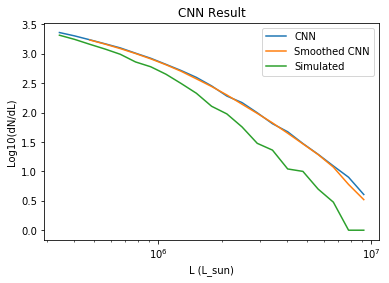

6 ----------------------------
Error and MSE for the given base_number:
[0.21595242619514465, 0.49599012732505798]


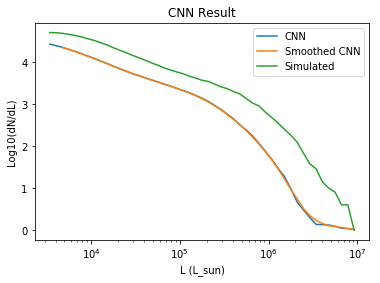

Error and MSE for the given base_number:
[0.46365043520927429, 1.113715648651123]


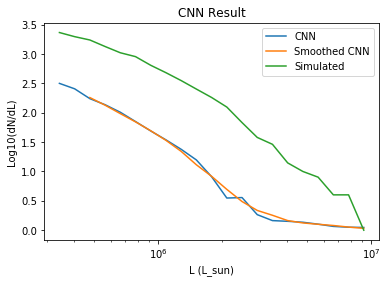

7 ----------------------------
Error and MSE for the given base_number:
[0.27747875452041626, 0.621204674243927]


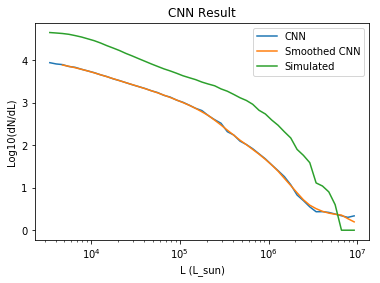

Error and MSE for the given base_number:
[0.081625998020172119, 0.16935260593891144]


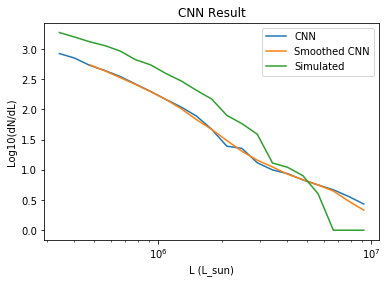

8 ----------------------------
Error and MSE for the given base_number:
[0.15909802913665771, 0.35639402270317078]


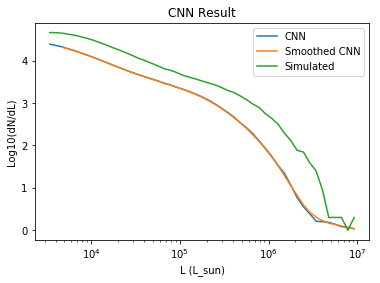

Error and MSE for the given base_number:
[0.22941432893276215, 0.50828039646148682]


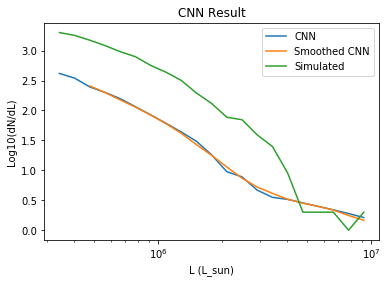

9 ----------------------------
Error and MSE for the given base_number:
[0.25670596957206726, 0.57202750444412231]


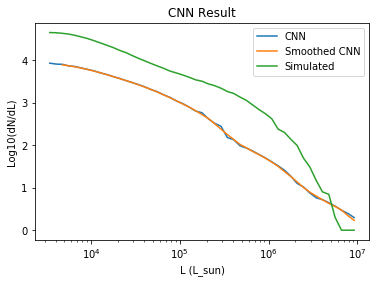

Error and MSE for the given base_number:
[0.23870745301246643, 0.56157922744750977]


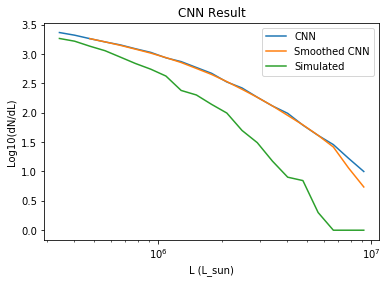

10 ----------------------------
Error and MSE for the given base_number:
[0.043241996318101883, 0.093320183455944061]


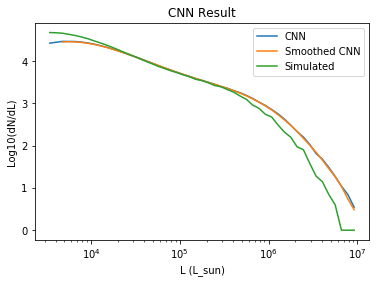

Error and MSE for the given base_number:
[0.022440042346715927, 0.046486932784318924]


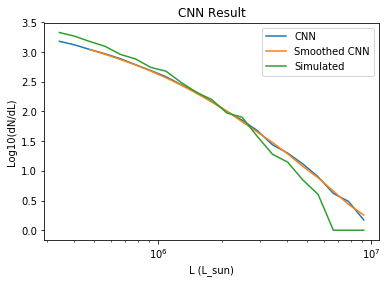

11 ----------------------------
Error and MSE for the given base_number:
[0.021033495664596558, 0.043671645224094391]


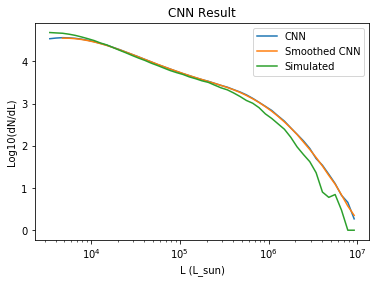

Error and MSE for the given base_number:
[0.23834367096424103, 0.54827505350112915]


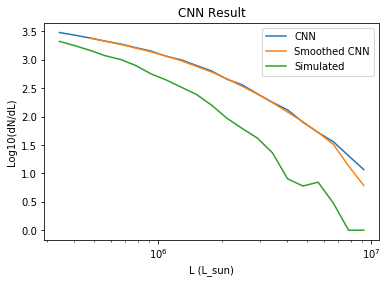

In [81]:
for numb in range(12):
    print(numb, '----------------------------')
    cur_lum, cnn_lum = lnn.test_model(adam_test3, base, numb, 'log', True, pre_pool=4, 
                                          log_input=True, pre_pool_z=10, lum_func_size=lum_func_size)
    lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=lum_func_size)

    cur_lum, cnn_lum = lnn.test_model(adam_test4, base, numb, 'log', True, pre_pool=4, 
                                          log_input=True, pre_pool_z=10, lum_func_size=-21)
    lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=-21)

100 ../maps2/random_maps2/COMAP_z2.39-3.44_1140Mpc_seed_13585_rotate_0_subfield_13__Breysse_2.000e-06_1.000e+00 ----------------------------
Error and MSE for the given base_number:
[0.093557514250278473, 0.19929783046245575]


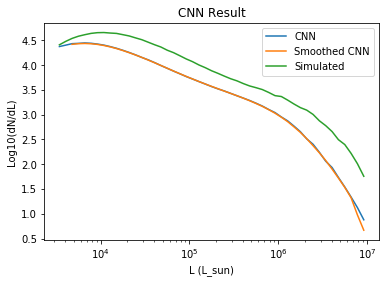

Error and MSE for the given base_number:
[0.046544440090656281, 0.09527510404586792]


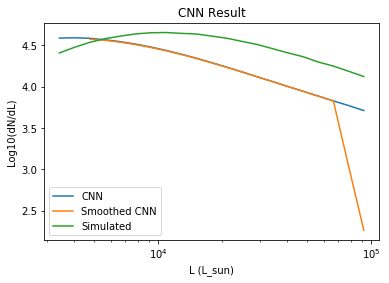

Error and MSE for the given base_number:
[0.34564509987831116, 0.81849980354309082]


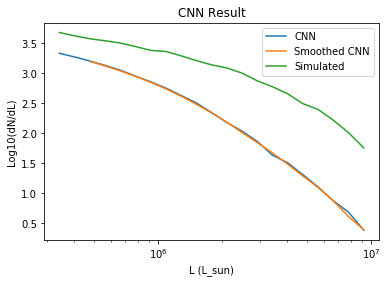

101 ../maps2/random_maps2/COMAP_z2.39-3.44_1140Mpc_seed_13585_rotate_0_subfield_13__Padmanabhan_4.170e+12_-1.170e+00_3.300e-03_4.000e-02_9.500e-01_4.800e-01_6.600e-01_-3.300e-01 ----------------------------
Error and MSE for the given base_number:
[0.017508942633867264, 0.035271067172288895]


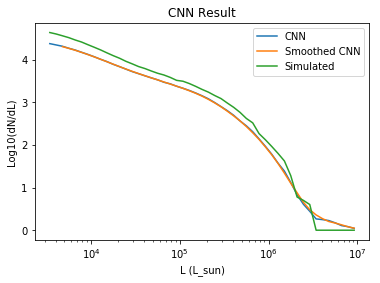

Error and MSE for the given base_number:
[0.024254770949482918, 0.048990845680236816]


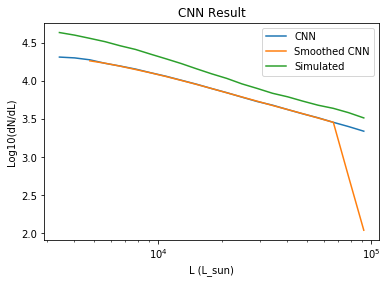

Error and MSE for the given base_number:
[0.23578885197639465, 0.54352736473083496]


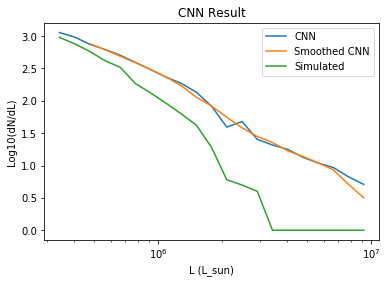

102 ../maps2/random_maps2/COMAP_z2.39-3.44_1140Mpc_seed_13585_rotate_0_subfield_15__Padmanabhan_4.170e+12_-1.170e+00_3.300e-03_4.000e-02_9.500e-01_4.800e-01_6.600e-01_-3.300e-01 ----------------------------
Error and MSE for the given base_number:
[0.28223684430122375, 0.66372275352478027]


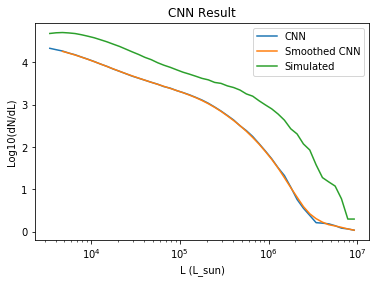

Error and MSE for the given base_number:
[0.047387011349201202, 0.096342004835605621]


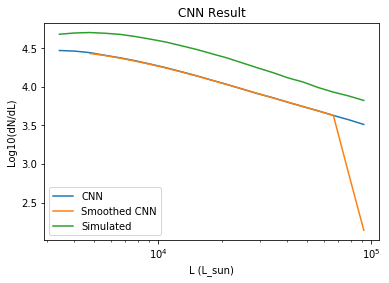

Error and MSE for the given base_number:
[0.051809687167406082, 0.10607343912124634]


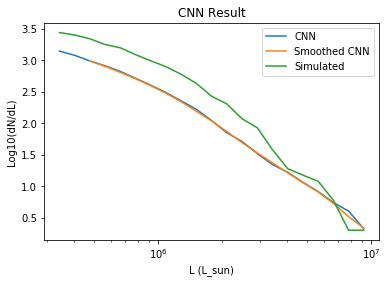

103 ../maps2/random_maps2/COMAP_z2.39-3.44_1140Mpc_seed_13585_rotate_0_subfield_16__Li_0.000e+00_1.370e+00_-1.740e+00_3.000e-01_3.000e-01 ----------------------------
Error and MSE for the given base_number:
[0.2639317512512207, 0.67868906259536743]


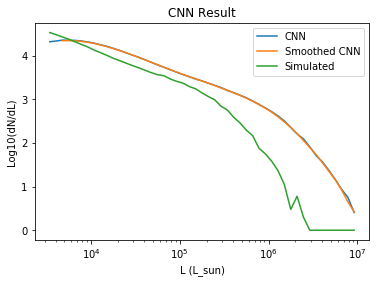

Error and MSE for the given base_number:
[0.0063119474798440933, 0.012716853991150856]


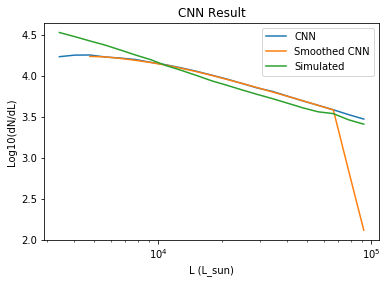

Error and MSE for the given base_number:
[0.58196645975112915, 1.5092605352401733]


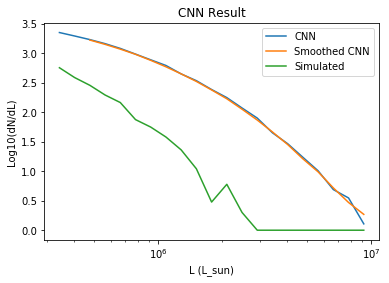

104 ../maps2/random_maps2/COMAP_z2.39-3.44_1140Mpc_seed_13585_rotate_0_subfield_16__Padmanabhan_4.170e+12_-1.170e+00_3.300e-03_4.000e-02_9.500e-01_4.800e-01_6.600e-01_-3.300e-01 ----------------------------
Error and MSE for the given base_number:
[0.040061257779598236, 0.08242594450712204]


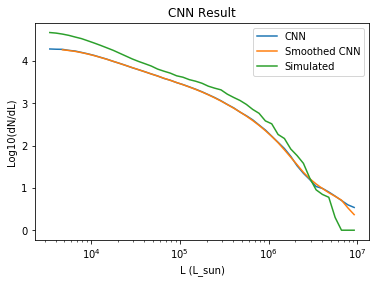

Error and MSE for the given base_number:
[0.0037013860419392586, 0.0074276914820075035]


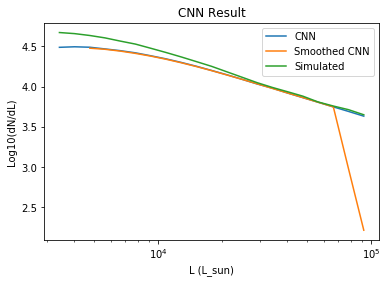

Error and MSE for the given base_number:
[0.20240107178688049, 0.44777166843414307]


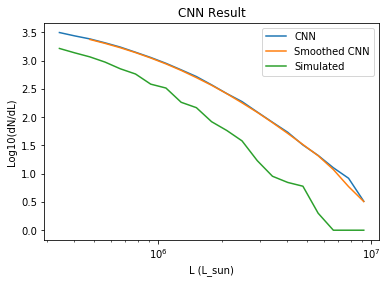

105 ../maps2/random_maps2/COMAP_z2.39-3.44_1140Mpc_seed_13585_rotate_0_subfield_18__Padmanabhan_4.170e+12_-1.170e+00_3.300e-03_4.000e-02_9.500e-01_4.800e-01_6.600e-01_-3.300e-01 ----------------------------
Error and MSE for the given base_number:
[0.14819745719432831, 0.34746739268302917]


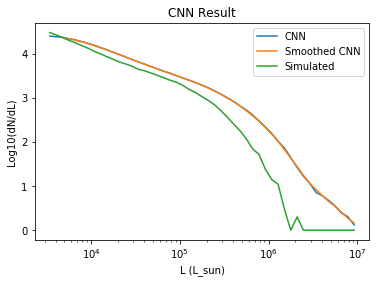

Error and MSE for the given base_number:
[0.024325745180249214, 0.04915977269411087]


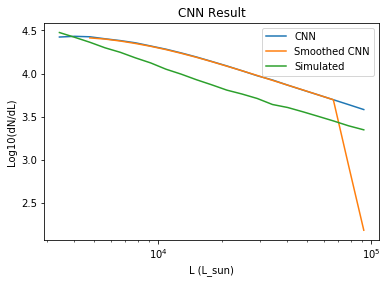

Error and MSE for the given base_number:
[0.84160220623016357, 2.3833403587341309]


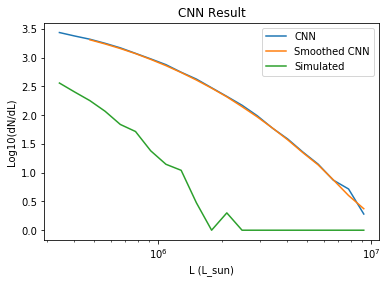

106 ../maps2/random_maps2/COMAP_z2.39-3.44_1140Mpc_seed_13585_rotate_0_subfield_19__Li_0.000e+00_1.370e+00_-1.740e+00_3.000e-01_3.000e-01 ----------------------------
Error and MSE for the given base_number:
[0.034983202815055847, 0.070874430239200592]


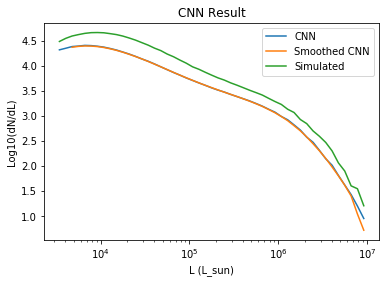

Error and MSE for the given base_number:
[0.040882185101509094, 0.083342060446739197]


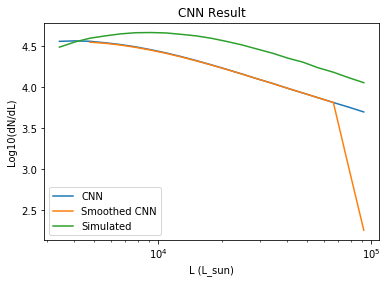

Error and MSE for the given base_number:
[1.0063580274581909, 2.9452598094940186]


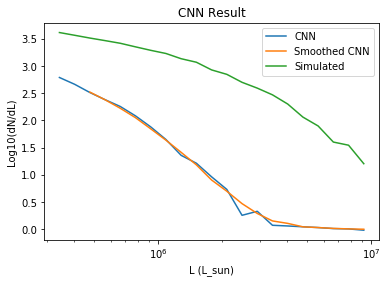

107 ../maps2/random_maps2/COMAP_z2.39-3.44_1140Mpc_seed_13585_rotate_0_subfield_1__Breysse_2.000e-06_1.000e+00 ----------------------------
Error and MSE for the given base_number:
[0.19210092723369598, 0.43766000866889954]


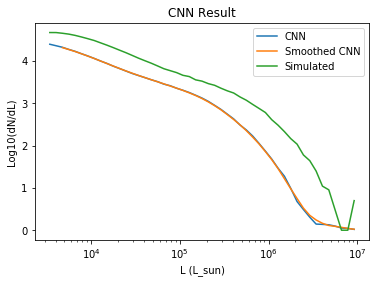

Error and MSE for the given base_number:
[0.020893605425953865, 0.042093735188245773]


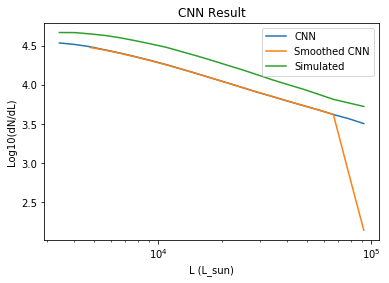

Error and MSE for the given base_number:
[0.17313171923160553, 0.39032244682312012]


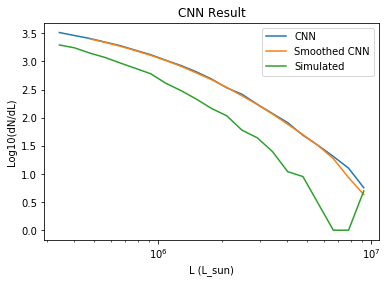

108 ../maps2/random_maps2/COMAP_z2.39-3.44_1140Mpc_seed_13585_rotate_0_subfield_1__Li_0.000e+00_1.370e+00_-1.740e+00_3.000e-01_3.000e-01 ----------------------------
Error and MSE for the given base_number:
[0.17493459582328796, 0.37688079476356506]


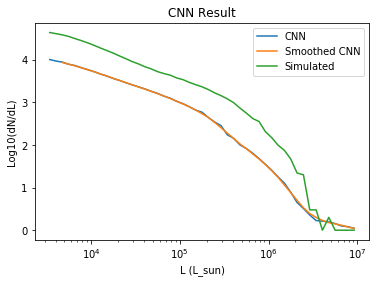

Error and MSE for the given base_number:
[0.0039175921119749546, 0.0078458879142999649]


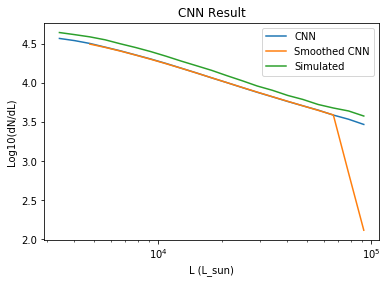

Error and MSE for the given base_number:
[0.12379076331853867, 0.2757459282875061]


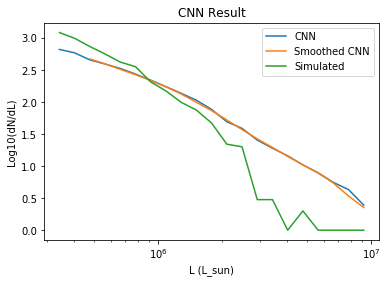

109 ../maps2/random_maps2/COMAP_z2.39-3.44_1140Mpc_seed_13585_rotate_0_subfield_20__Padmanabhan_4.170e+12_-1.170e+00_3.300e-03_4.000e-02_9.500e-01_4.800e-01_6.600e-01_-3.300e-01 ----------------------------
Error and MSE for the given base_number:
[0.062678426504135132, 0.12876377999782562]


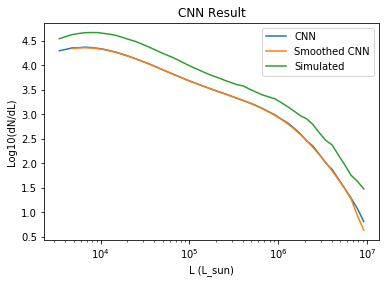

Error and MSE for the given base_number:
[0.080470666289329529, 0.16684523224830627]


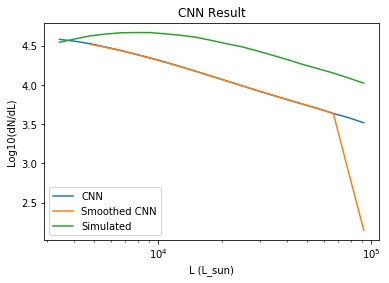

Error and MSE for the given base_number:
[0.47453421354293823, 1.1457281112670898]


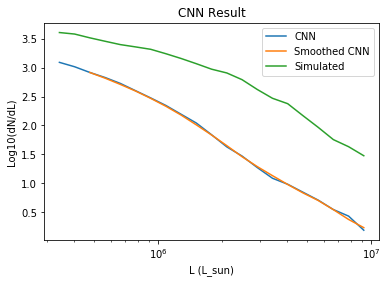

110 ../maps2/random_maps2/COMAP_z2.39-3.44_1140Mpc_seed_13585_rotate_0_subfield_21__Breysse_2.000e-06_1.000e+00 ----------------------------
Error and MSE for the given base_number:
[0.084439508616924286, 0.17565737664699554]


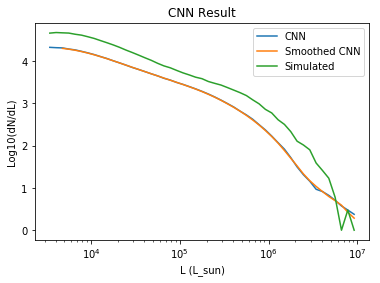

Error and MSE for the given base_number:
[0.0084968972951173782, 0.017043555155396461]


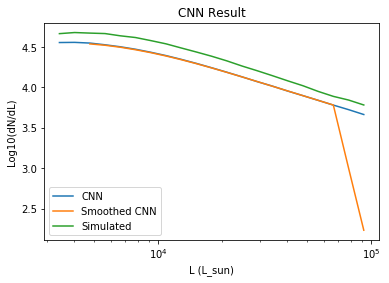

Error and MSE for the given base_number:
[0.02421724796295166, 0.051396455615758896]


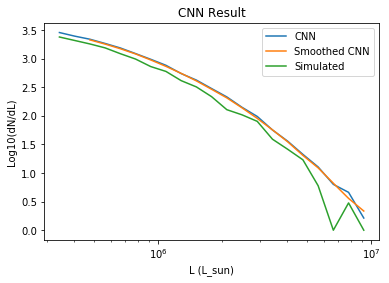

111 ../maps2/random_maps2/COMAP_z2.39-3.44_1140Mpc_seed_13585_rotate_0_subfield_23__Li_0.000e+00_1.370e+00_-1.740e+00_3.000e-01_3.000e-01 ----------------------------
Error and MSE for the given base_number:
[0.10335595160722733, 0.22179907560348511]


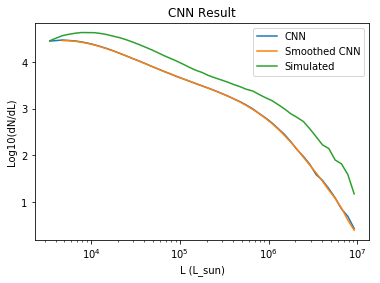

Error and MSE for the given base_number:
[0.088902503252029419, 0.18506397306919098]


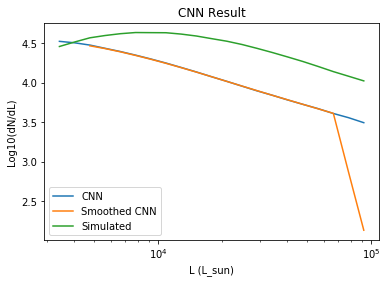

Error and MSE for the given base_number:
[1.0059088468551636, 2.9124298095703125]


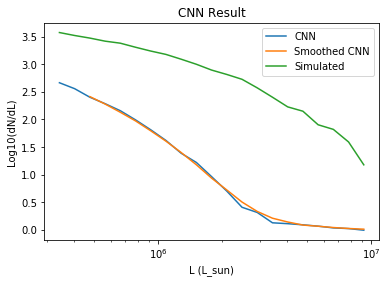

In [17]:
for numb in range(100, 112):
    print(numb, different_base[numb], '----------------------------')
    cur_lum, cnn_lum = lnn.test_model(adam_test3, random_small_Li_base, numb, 'log', True, pre_pool=4, 
                                          log_input=True, pre_pool_z=10, lum_func_size=lum_func_size)
    lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=lum_func_size)
    
    cur_lum, cnn_lum = lnn.test_model(adam_test2, random_small_Li_base, numb, 'log', True, pre_pool=4, 
                                          log_input=True, pre_pool_z=10, lum_func_size=21)
    lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=21)

    cur_lum, cnn_lum = lnn.test_model(adam_test4, random_small_Li_base, numb, 'log', True, pre_pool=4, 
                                          log_input=True, pre_pool_z=10, lum_func_size=-21)
    lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=-21)

0 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13637_rotate_0_subfield_29__Li_5.745e-03_1.402e+00_-1.862e+00_2.993e-01_2.976e-01 ----------------------------
Error and MSE for the given base_number:
[0.028549989685416222, 0.060026790946722031]


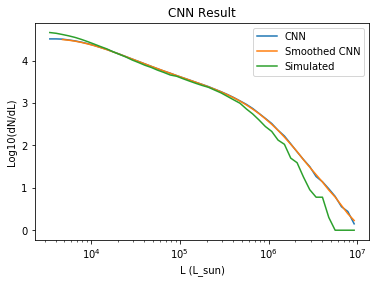

Error and MSE for the given base_number:
[0.033723469823598862, 0.068615078926086426]


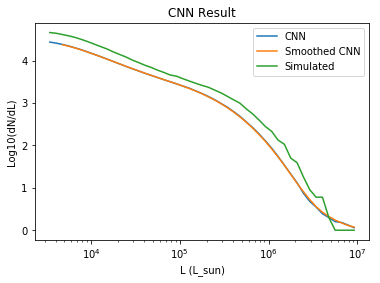

1 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13621_rotate_0_subfield_25__Li_-4.057e-02_1.379e+00_-1.117e+00_3.177e-01_3.020e-01 ----------------------------
Error and MSE for the given base_number:
[0.031217442825436592, 0.064983010292053223]


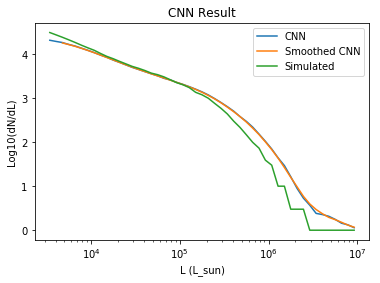

Error and MSE for the given base_number:
[0.05874311551451683, 0.12574149668216705]


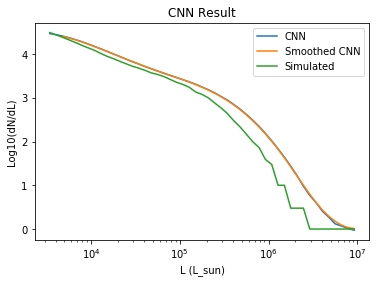

2 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13605_rotate_0_subfield_6__Li_9.586e-03_1.368e+00_-1.465e+00_3.057e-01_3.061e-01 ----------------------------
Error and MSE for the given base_number:
[0.08228851854801178, 0.17643992602825165]


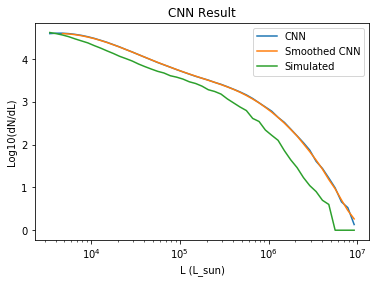

Error and MSE for the given base_number:
[0.011285047046840191, 0.022706219926476479]


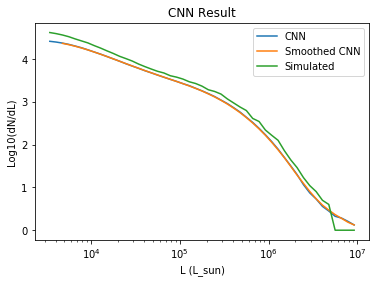

3 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13825_rotate_0_subfield_15__Li_-1.503e-02_1.417e+00_-2.279e+00_3.025e-01_2.915e-01 ----------------------------
Error and MSE for the given base_number:
[0.021065685898065567, 0.047239542007446289]


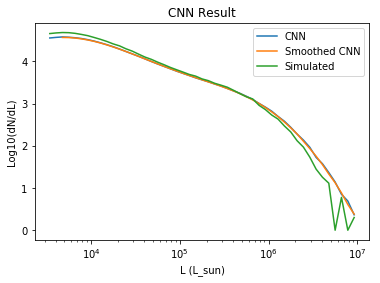

Error and MSE for the given base_number:
[0.033717215061187744, 0.073350079357624054]


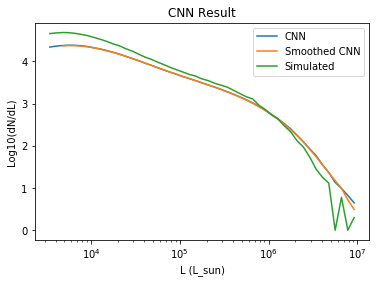

4 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13593_rotate_0_subfield_4__Li_1.565e-02_1.405e+00_-1.770e+00_3.012e-01_2.831e-01 ----------------------------
Error and MSE for the given base_number:
[0.058286994695663452, 0.12851728498935699]


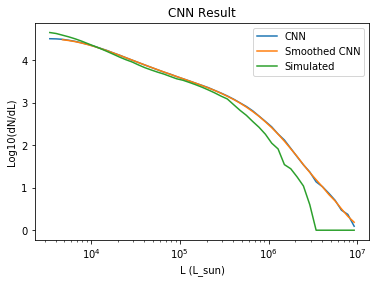

Error and MSE for the given base_number:
[0.041601274162530899, 0.09012816846370697]


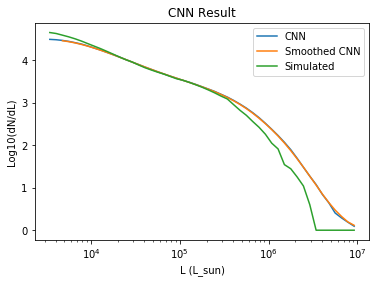

5 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13627_rotate_0_subfield_34__Li_-2.295e-04_1.328e+00_-2.330e+00_2.957e-01_2.992e-01 ----------------------------
Error and MSE for the given base_number:
[0.37076032161712646, 0.93225699663162231]


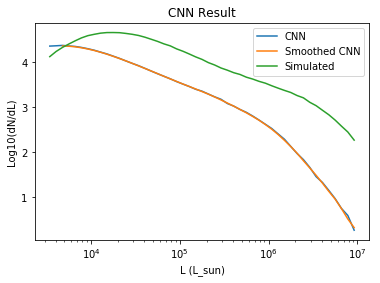

Error and MSE for the given base_number:
[0.12053247541189194, 0.25837528705596924]


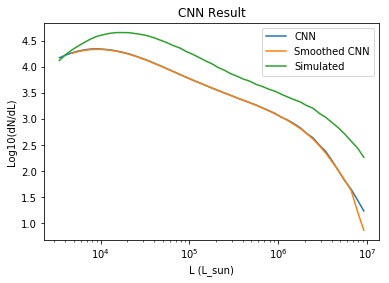

6 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13897_rotate_0_subfield_4__Li_6.136e-03_1.332e+00_-1.940e+00_3.064e-01_2.917e-01 ----------------------------
Error and MSE for the given base_number:
[0.076897904276847839, 0.16422121226787567]


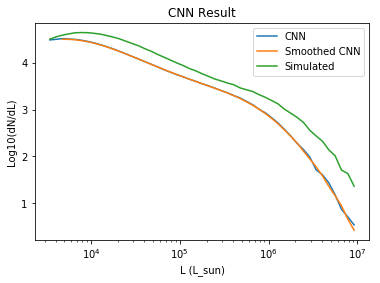

Error and MSE for the given base_number:
[0.033676467835903168, 0.068179845809936523]


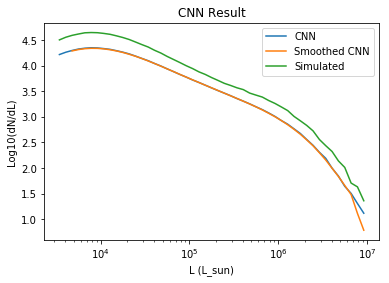

7 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13695_rotate_0_subfield_20__Li_-1.311e-02_1.362e+00_-1.119e+00_2.918e-01_2.858e-01 ----------------------------
Error and MSE for the given base_number:
[0.0093798507004976273, 0.019101511687040329]


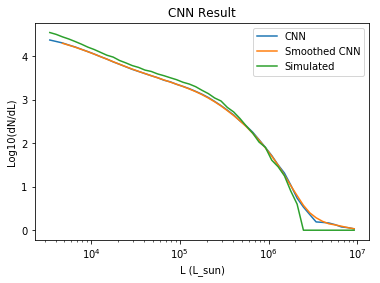

Error and MSE for the given base_number:
[0.017509069293737411, 0.036722976714372635]


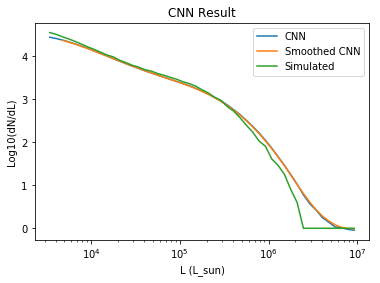

8 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13661_rotate_0_subfield_17__Li_-5.099e-04_1.398e+00_-1.481e+00_2.991e-01_2.973e-01 ----------------------------
Error and MSE for the given base_number:
[0.0099422149360179901, 0.020271310582756996]


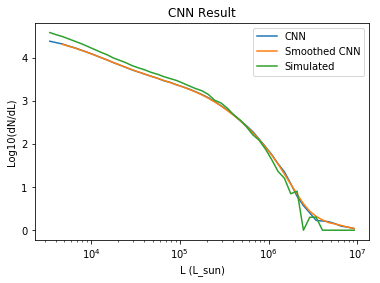

Error and MSE for the given base_number:
[0.0093884021043777466, 0.019592000171542168]


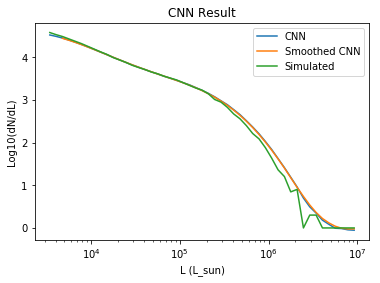

9 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13855_rotate_0_subfield_26__Li_1.929e-02_1.335e+00_-1.568e+00_2.930e-01_2.993e-01 ----------------------------
Error and MSE for the given base_number:
[0.026320710778236389, 0.053520943969488144]


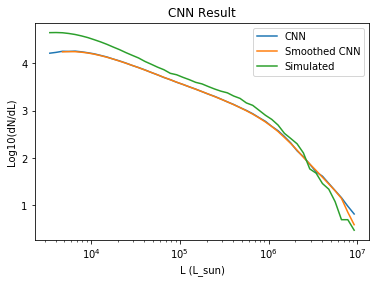

Error and MSE for the given base_number:
[0.026127217337489128, 0.052957236766815186]


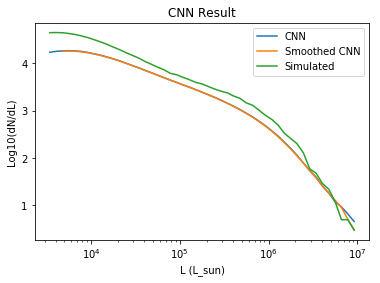

10 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13853_rotate_0_subfield_14__Li_-2.574e-02_1.362e+00_-2.178e+00_2.819e-01_3.157e-01 ----------------------------
Error and MSE for the given base_number:
[0.50951653718948364, 1.3640128374099731]


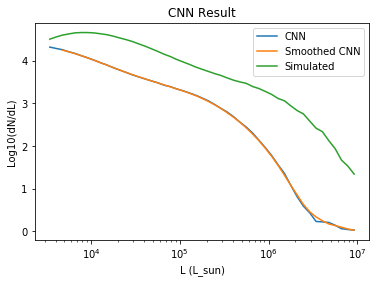

Error and MSE for the given base_number:
[0.12131229043006897, 0.26887020468711853]


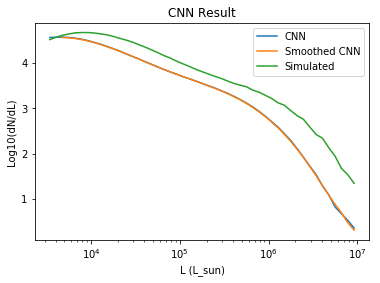

11 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13649_rotate_0_subfield_25__Li_4.566e-02_1.380e+00_-1.657e+00_2.970e-01_3.173e-01 ----------------------------
Error and MSE for the given base_number:
[0.67679637670516968, 1.8443665504455566]


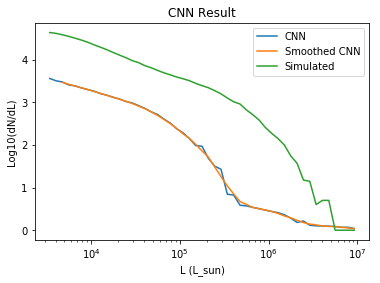

Error and MSE for the given base_number:
[0.0088612604886293411, 0.018081599846482277]


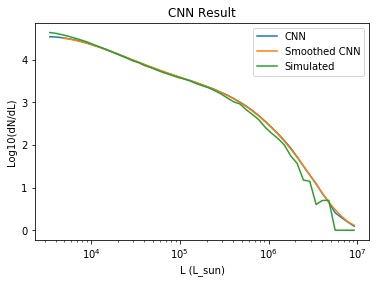

In [22]:
# for numb in range(100, 112):
for numb in range(0, 12):
    print(numb, random_small_Li_base[numb], '----------------------------')
    cur_lum, cnn_lum = lnn.test_model(adam_test3, random_small_Li_base, numb, 'log', True, pre_pool=4, 
                                          log_input=True, pre_pool_z=10, lum_func_size=lum_func_size)
    lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=lum_func_size)
    
    cur_lum, cnn_lum = lnn.test_model(adam_test5, random_small_Li_base, numb, 'log', True, pre_pool=4, 
                                          log_input=True, pre_pool_z=10, lum_func_size=lum_func_size)
    lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=lum_func_size)
    

855 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13585_rotate_0_subfield_34__Li_-6.871e-03_1.337e+00_-1.886e+00_3.141e-01_3.061e-01 ----------------------------
Error and MSE for the given base_number:
[0.0025057925377041101, 0.0050315572880208492]


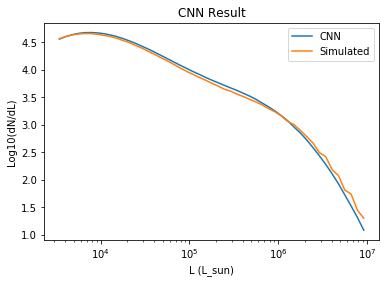

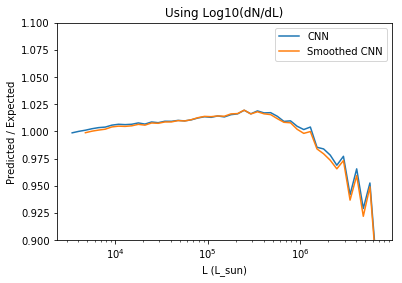

2029 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13679_rotate_0_subfield_30__Li_-4.273e-02_1.463e+00_-1.259e+00_3.041e-01_2.985e-01 ----------------------------
Error and MSE for the given base_number:
[0.0091423038393259048, 0.018401769921183586]


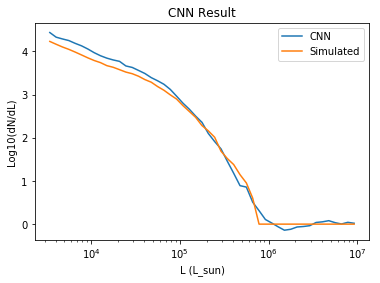

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/tools.py:278: RuntimeWarning: divide by zero encountered in true_divide
  
/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/tools.py:279: RuntimeWarning: divide by zero encountered in true_divide
  ### plot the ratio


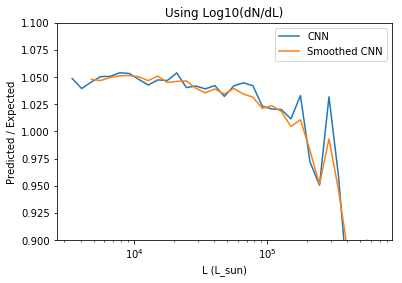

822 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13597_rotate_0_subfield_21__Li_-1.819e-02_1.318e+00_-1.566e+00_3.016e-01_2.911e-01 ----------------------------
Error and MSE for the given base_number:
[0.0040406109765172005, 0.0081329895183444023]


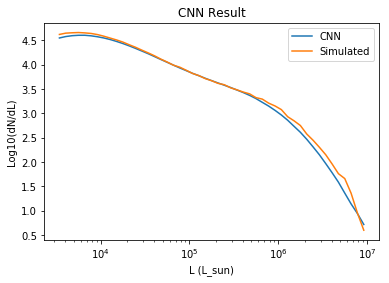

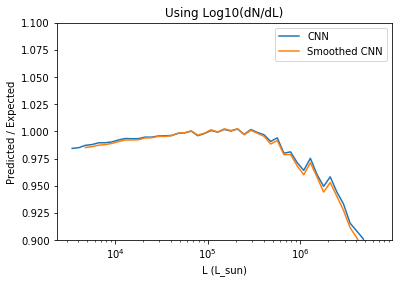

4034 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13599_rotate_0_subfield_20__Li_-1.099e-02_1.351e+00_-2.054e+00_2.943e-01_2.888e-01 ----------------------------
Error and MSE for the given base_number:
[0.0010951757431030273, 0.002192188985645771]


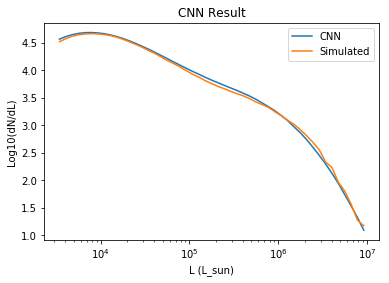

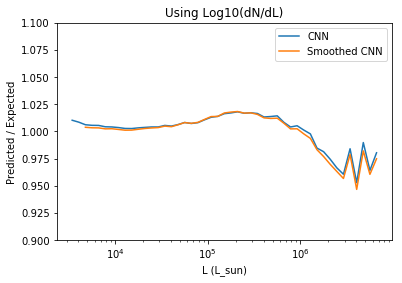

3581 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13827_rotate_0_subfield_15__Li_-6.023e-02_1.363e+00_-1.257e+00_3.141e-01_2.796e-01 ----------------------------
Error and MSE for the given base_number:
[0.0049658967182040215, 0.010031049139797688]


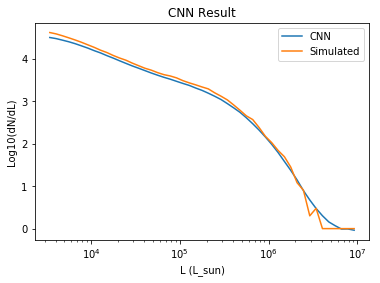

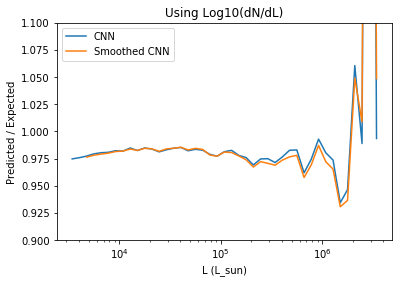

5015 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13645_rotate_0_subfield_22__Li_2.069e-02_1.358e+00_-1.576e+00_2.846e-01_2.941e-01 ----------------------------
Error and MSE for the given base_number:
[0.0045509813353419304, 0.0092035466805100441]


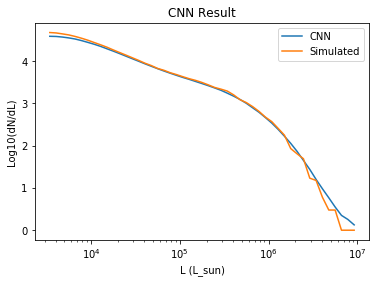

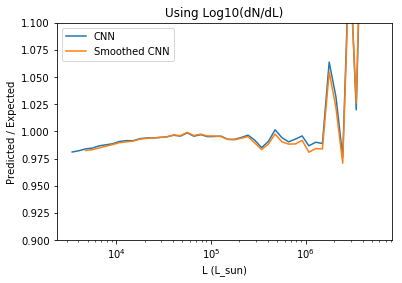

1064 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13731_rotate_0_subfield_11__Li_3.186e-02_1.397e+00_-1.508e+00_2.950e-01_2.955e-01 ----------------------------
Error and MSE for the given base_number:
[0.0033544886391609907, 0.0067280945368111134]


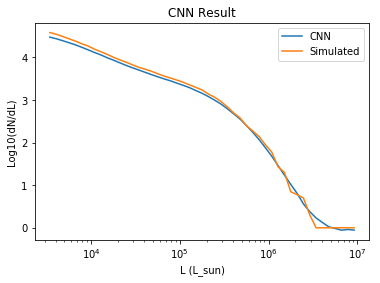

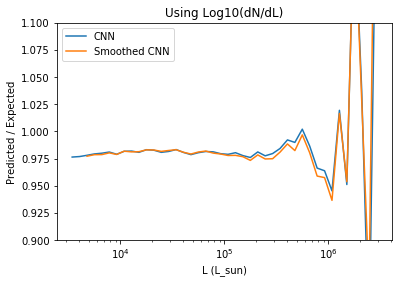

5474 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13659_rotate_0_subfield_27__Li_2.416e-02_1.417e+00_-1.851e+00_3.063e-01_3.036e-01 ----------------------------
Error and MSE for the given base_number:
[0.011267160996794701, 0.024156553670763969]


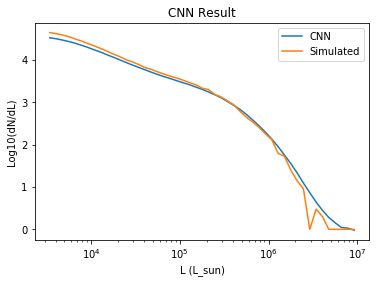

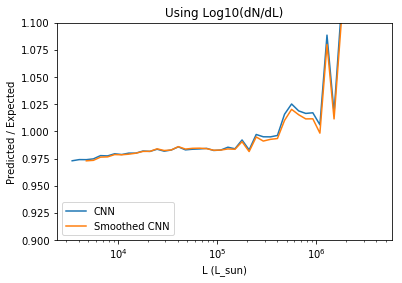

3469 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13623_rotate_0_subfield_16__Li_2.636e-02_1.381e+00_-1.086e+00_2.999e-01_2.922e-01 ----------------------------
Error and MSE for the given base_number:
[0.00440624775364995, 0.0089567312970757484]


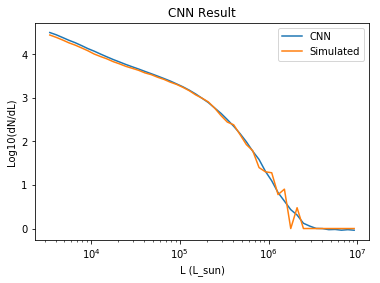

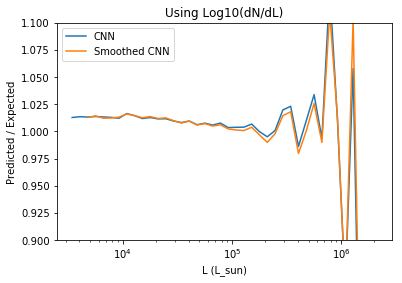

651 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13707_rotate_0_subfield_26__Li_-4.362e-02_1.325e+00_-2.018e+00_3.017e-01_2.902e-01 ----------------------------
Error and MSE for the given base_number:
[0.0040210862644016743, 0.0080640437081456184]


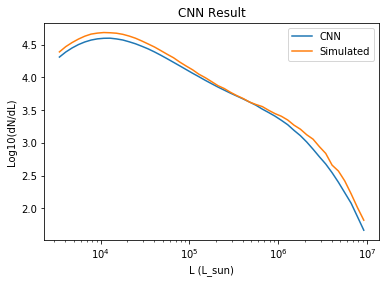

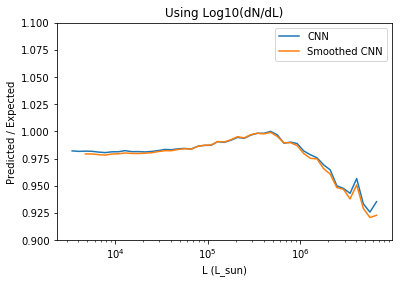

1886 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13675_rotate_0_subfield_20__Li_3.885e-02_1.376e+00_-2.155e+00_3.150e-01_2.964e-01 ----------------------------
Error and MSE for the given base_number:
[0.001879490097053349, 0.0037714329082518816]


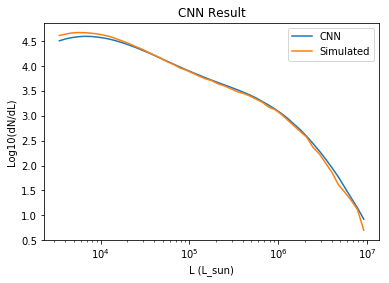

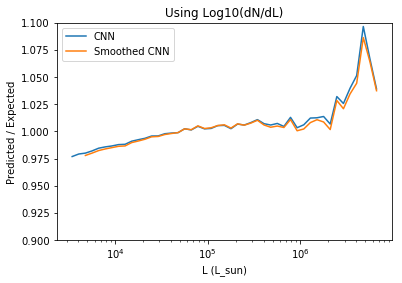

1632 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13745_rotate_0_subfield_13__Li_2.972e-02_1.358e+00_-1.845e+00_3.053e-01_2.957e-01 ----------------------------
Error and MSE for the given base_number:
[0.004872442688792944, 0.0098405471071600914]


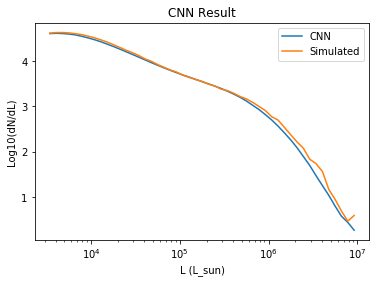

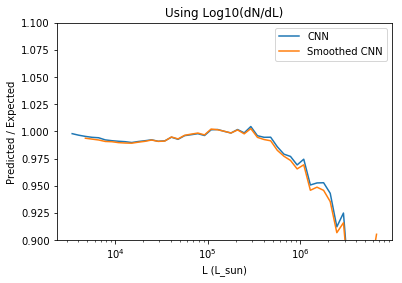

In [26]:
# for numb in range(100, 112):
# for numb in range(0, 12):
for numb in np.random.choice(range(len(random_small_Li_base)), 12):
    print(numb, random_small_Li_base[numb], '----------------------------')
    
    cur_lum, cnn_lum = lnn.test_model(adam_test7, random_small_Li_base, numb, 'log', True, pre_pool=4, 
                                          log_input=True, pre_pool_z=10, lum_func_size=lum_func_size)
    lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=lum_func_size)
    lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2)

0 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13637_rotate_0_subfield_29__Li_5.745e-03_1.402e+00_-1.862e+00_2.993e-01_2.976e-01 ----------------------------
Error and MSE for the given base_number:
[0.29916176199913025, 0.7574460506439209]


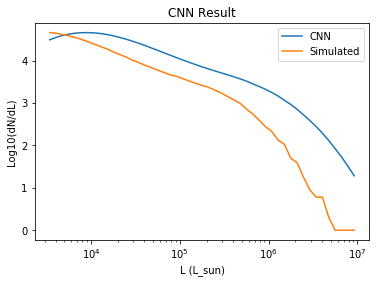

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/tools.py:278: RuntimeWarning: divide by zero encountered in true_divide
  
/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/tools.py:279: RuntimeWarning: divide by zero encountered in true_divide
  ### plot the ratio


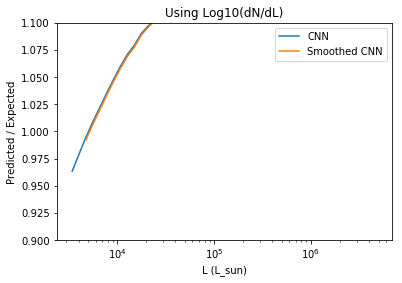

1 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13621_rotate_0_subfield_25__Li_-4.057e-02_1.379e+00_-1.117e+00_3.177e-01_3.020e-01 ----------------------------
Error and MSE for the given base_number:
[0.57331860065460205, 1.6058793067932129]


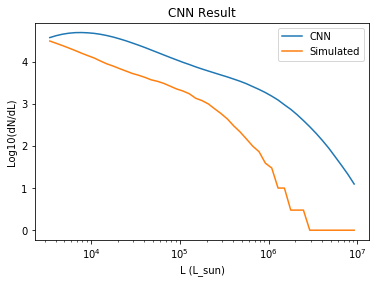

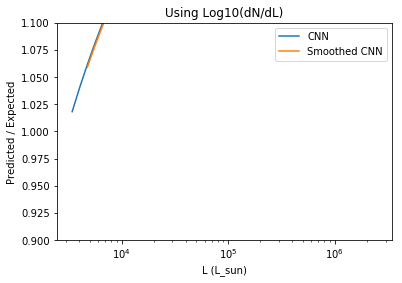

2 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13605_rotate_0_subfield_6__Li_9.586e-03_1.368e+00_-1.465e+00_3.057e-01_3.061e-01 ----------------------------
Error and MSE for the given base_number:
[0.31155684590339661, 0.76712006330490112]


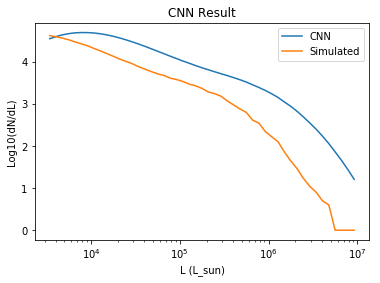

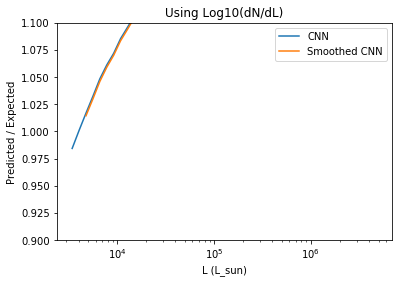

3 ../maps2/random_small_Li/COMAP_z2.39-3.44_1140Mpc_seed_13825_rotate_0_subfield_15__Li_-1.503e-02_1.417e+00_-2.279e+00_3.025e-01_2.915e-01 ----------------------------
Error and MSE for the given base_number:
[0.17832781374454498, 0.44426798820495605]


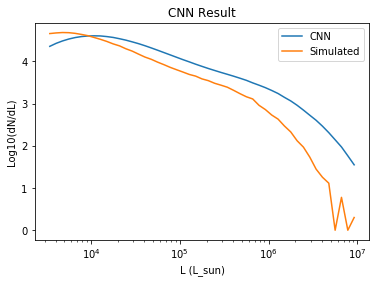

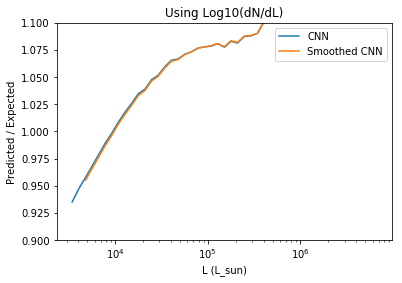

In [25]:
# for numb in range(100, 112):
for numb in range(0, 4):
# for numb in np.random.choice(range(len(random_small_Li_base)), 12):
    print(numb, random_small_Li_base[numb], '----------------------------')
    
    cur_lum, cnn_lum = lnn.test_model(adam_test7, random_small_Li_base, numb, 'log', True, pre_pool=4, 
                                          log_input=True, pre_pool_z=10, lum_func_size=lum_func_size,
                                     make_map_noisy=1)
    lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=lum_func_size)
    lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2)

1000 ../maps2/random_maps2/COMAP_z2.39-3.44_1140Mpc_seed_13641_rotate_0_subfield_9__Padmanabhan_4.170e+12_-1.170e+00_3.300e-03_4.000e-02_9.500e-01_4.800e-01_6.600e-01_-3.300e-01 ----------------------------
Error and MSE for the given base_number:
[0.020013580098748207, 0.040676295757293701]


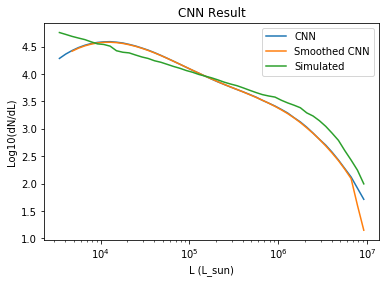

1001 ../maps2/random_maps2/COMAP_z2.39-3.44_1140Mpc_seed_13643_rotate_0_subfield_10__Breysse_2.000e-06_1.000e+00 ----------------------------
Error and MSE for the given base_number:
[1.4088053703308105, 7.462860107421875]


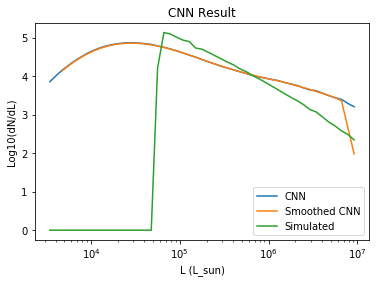

1002 ../maps2/random_maps2/COMAP_z2.39-3.44_1140Mpc_seed_13643_rotate_0_subfield_11__Li_0.000e+00_1.370e+00_-1.740e+00_3.000e-01_3.000e-01 ----------------------------
Error and MSE for the given base_number:
[0.0018386123701930046, 0.0036888092290610075]


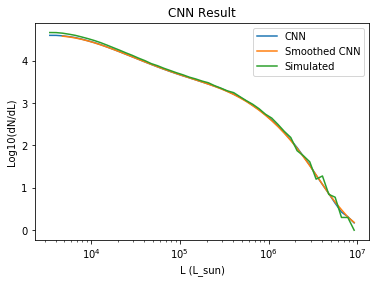

1003 ../maps2/random_maps2/COMAP_z2.39-3.44_1140Mpc_seed_13643_rotate_0_subfield_11__Padmanabhan_4.170e+12_-1.170e+00_3.300e-03_4.000e-02_9.500e-01_4.800e-01_6.600e-01_-3.300e-01 ----------------------------
Error and MSE for the given base_number:
[0.020311223343014717, 0.041285019367933273]


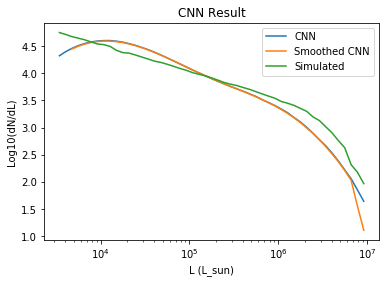

1004 ../maps2/random_maps2/COMAP_z2.39-3.44_1140Mpc_seed_13643_rotate_0_subfield_12__Li_0.000e+00_1.370e+00_-1.740e+00_3.000e-01_3.000e-01 ----------------------------
Error and MSE for the given base_number:
[0.003749555442482233, 0.0076466104947030544]


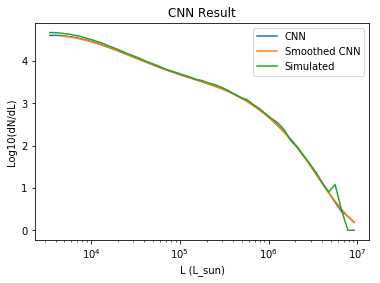

1005 ../maps2/random_maps2/COMAP_z2.39-3.44_1140Mpc_seed_13643_rotate_0_subfield_13__Breysse_2.000e-06_1.000e+00 ----------------------------
Error and MSE for the given base_number:
[1.3912414312362671, 7.3131556510925293]


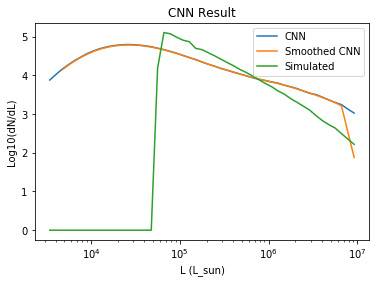

1006 ../maps2/random_maps2/COMAP_z2.39-3.44_1140Mpc_seed_13643_rotate_0_subfield_15__Breysse_2.000e-06_1.000e+00 ----------------------------
Error and MSE for the given base_number:
[1.4013576507568359, 7.4214215278625488]


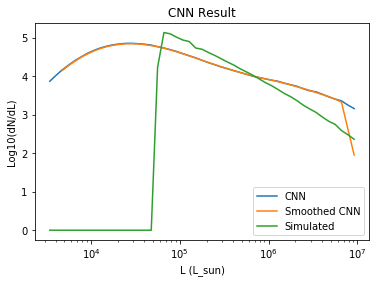

1007 ../maps2/random_maps2/COMAP_z2.39-3.44_1140Mpc_seed_13643_rotate_0_subfield_15__Li_0.000e+00_1.370e+00_-1.740e+00_3.000e-01_3.000e-01 ----------------------------
Error and MSE for the given base_number:
[0.0028245535213500261, 0.0057176477275788784]


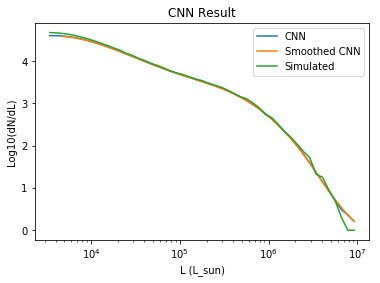

1008 ../maps2/random_maps2/COMAP_z2.39-3.44_1140Mpc_seed_13643_rotate_0_subfield_16__Breysse_2.000e-06_1.000e+00 ----------------------------
Error and MSE for the given base_number:
[1.3953853845596313, 7.3668065071105957]


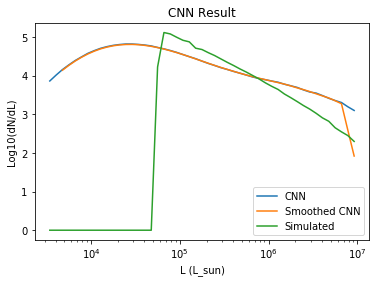

1009 ../maps2/random_maps2/COMAP_z2.39-3.44_1140Mpc_seed_13643_rotate_0_subfield_16__Li_0.000e+00_1.370e+00_-1.740e+00_3.000e-01_3.000e-01 ----------------------------
Error and MSE for the given base_number:
[0.0021643552463501692, 0.0043430263176560402]


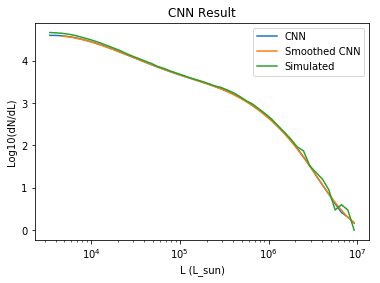

1010 ../maps2/random_maps2/COMAP_z2.39-3.44_1140Mpc_seed_13643_rotate_0_subfield_16__Padmanabhan_4.170e+12_-1.170e+00_3.300e-03_4.000e-02_9.500e-01_4.800e-01_6.600e-01_-3.300e-01 ----------------------------
Error and MSE for the given base_number:
[0.021612837910652161, 0.043977782130241394]


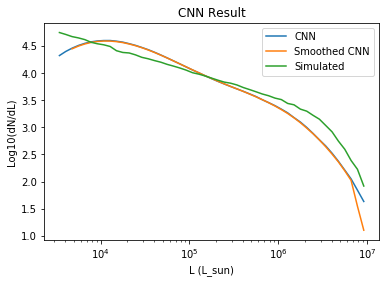

1011 ../maps2/random_maps2/COMAP_z2.39-3.44_1140Mpc_seed_13643_rotate_0_subfield_18__Breysse_2.000e-06_1.000e+00 ----------------------------
Error and MSE for the given base_number:
[1.3974889516830444, 7.3544683456420898]


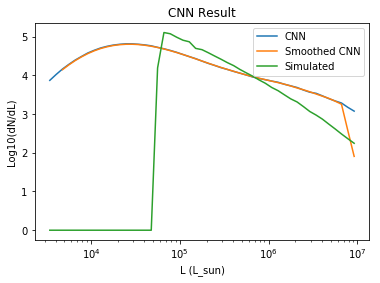

In [17]:
for numb in range(1000, 1012):
    print(numb, different_base[numb], '----------------------------')    
    cur_lum, cnn_lum = lnn.test_model(adam_test7, different_base, numb, 'log', True, pre_pool=4, 
                                          log_input=True, pre_pool_z=10, lum_func_size=lum_func_size)
    lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log', lum_func_size=lum_func_size)

Error and MSE for the given base_number:
[0.28576231002807617, 0.64409619569778442]
0.0844824041743


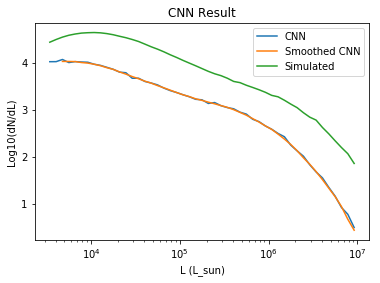

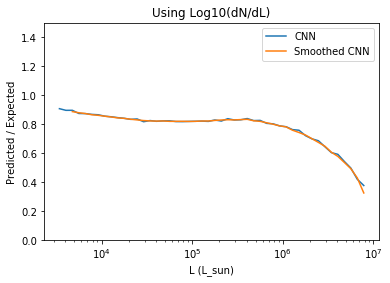

Error and MSE for the given base_number:
[0.720192551612854, 1.901777982711792]
0.386446387702


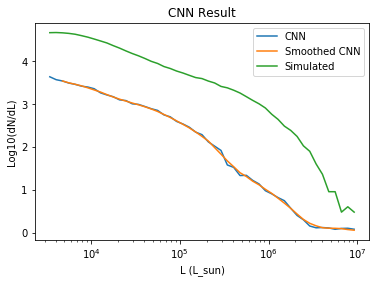

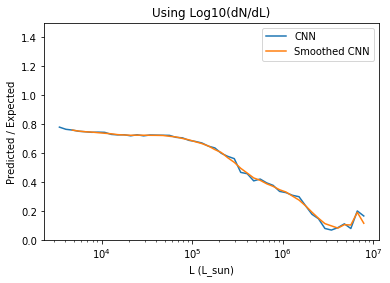

Error and MSE for the given base_number:
[0.60127174854278564, 1.6518551111221313]
0.363592147274


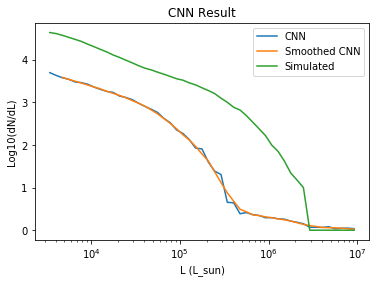

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/tools.py:273: RuntimeWarning: divide by zero encountered in true_divide
  ratio = cnn_lum[0]/cur_lum
/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/tools.py:274: RuntimeWarning: divide by zero encountered in true_divide
  ratio_smooth = avg/cur_lum


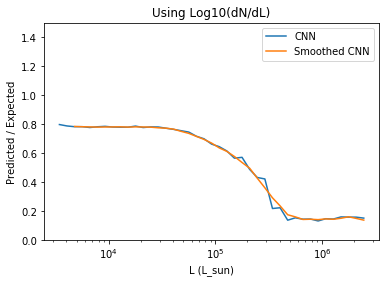

Error and MSE for the given base_number:
[0.23893070220947266, 0.52317458391189575]
0.0419325930634


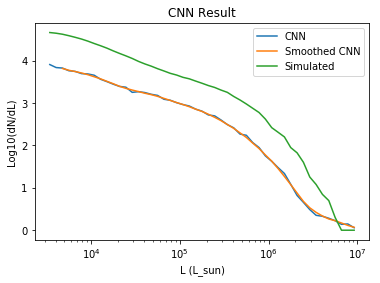

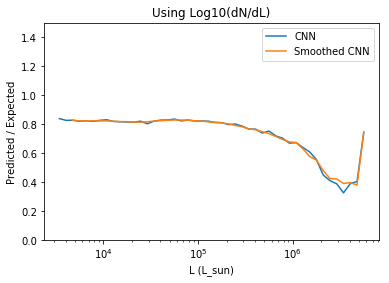

Error and MSE for the given base_number:
[0.28536233305931091, 0.63471198081970215]
0.0700777295962


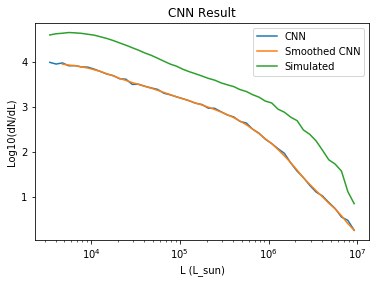

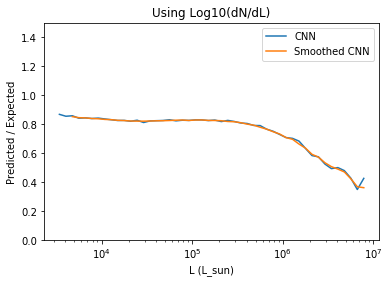

Error and MSE for the given base_number:
[0.39495593309402466, 0.91155016422271729]
0.100760105044


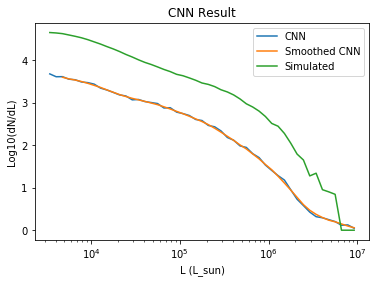

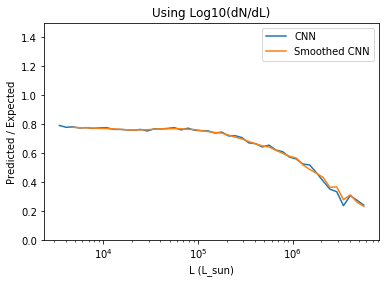

Error and MSE for the given base_number:
[0.76201051473617554, 2.0862977504730225]
0.422340393653


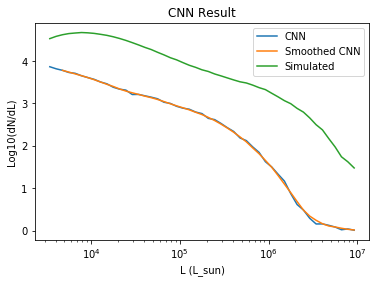

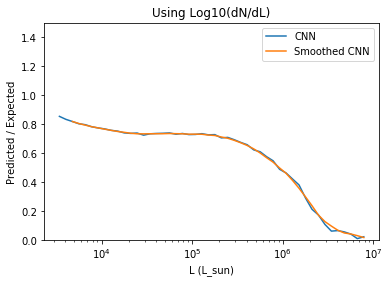

Error and MSE for the given base_number:
[0.45465788245201111, 1.2073854207992554]
0.278690213403


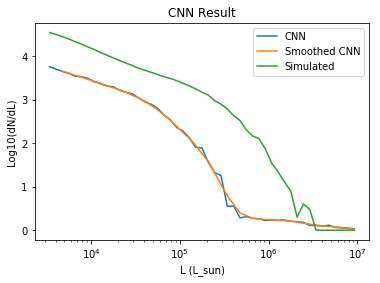

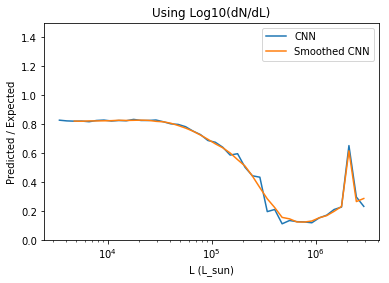

Error and MSE for the given base_number:
[0.33344650268554688, 0.76015108823776245]
0.0916328133782


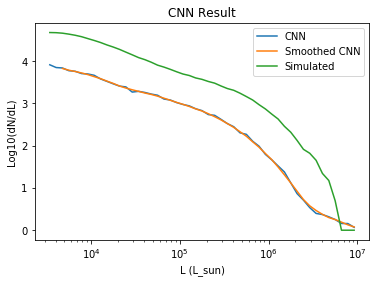

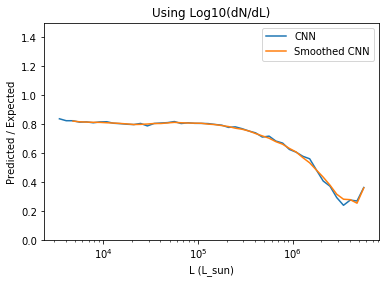

Error and MSE for the given base_number:
[0.23344613611698151, 0.51082783937454224]
0.0436893369231


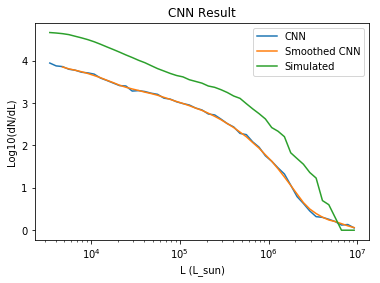

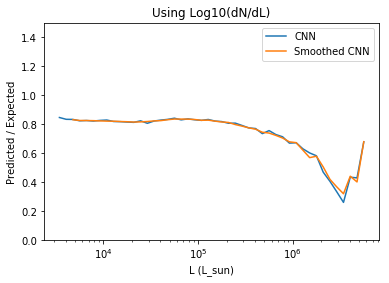

Error and MSE for the given base_number:
[0.18186783790588379, 0.44345387816429138]
0.194557484276


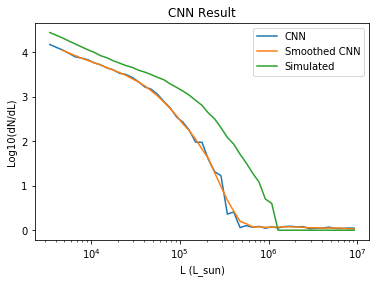

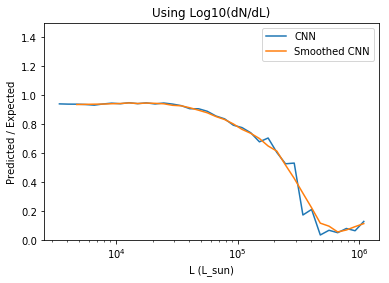

Error and MSE for the given base_number:
[0.25405022501945496, 0.65808618068695068]
0.254468852312


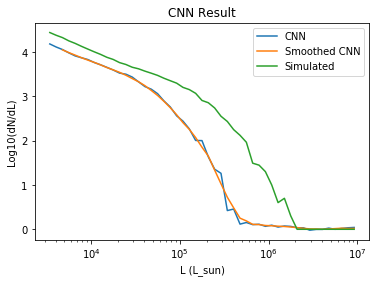

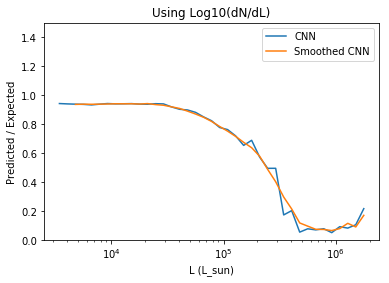

In [48]:
for i in range(12):
    cur_lum, cnn_lum = lnn.test_model(adam_test2, random_small_Li_base, i, 'log', True, pre_pool=4, 
                                      log_input=True, pre_pool_z=10)
    print(lnn.logcosh(cur_lum, cnn_lum[0]/0.8))
    lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log')
    lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log')

Error and MSE for the given base_number:
[6.3610224723815918, 55.414871215820312]


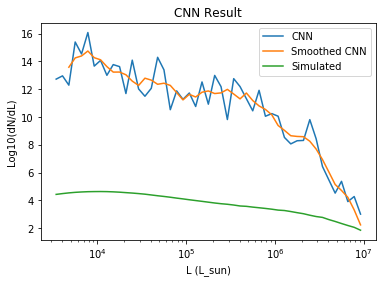

Error and MSE for the given base_number:
[0.087354935705661774, 0.19226817786693573]


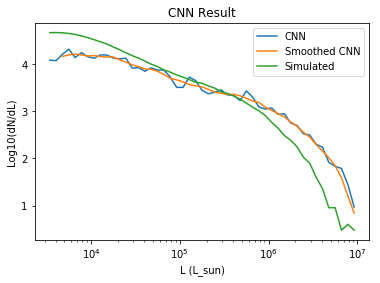

Error and MSE for the given base_number:
[0.21887786686420441, 0.56386876106262207]


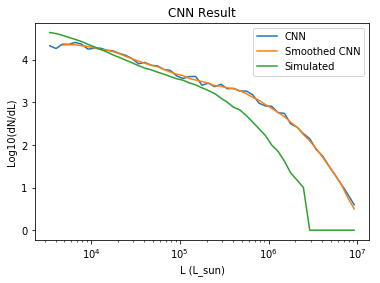

Error and MSE for the given base_number:
[0.6298905611038208, 1.6271717548370361]


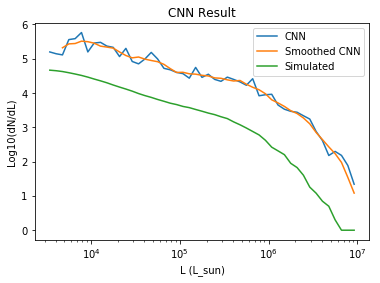

In [32]:
for i in range(4):
    cur_lum, cnn_lum = lnn.test_model(adam_test3, random_small_Li_base, i, 'log', True, pre_pool=4, 
                                      log_input=True, pre_pool_z=10)
    lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log')

Error and MSE for the given base_number:
[0.48133975267410278, 1.33735191822052]


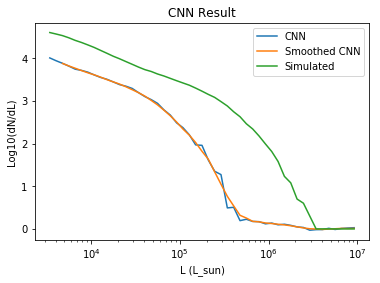

Error and MSE for the given base_number:
[0.32165676355361938, 0.72827827930450439]


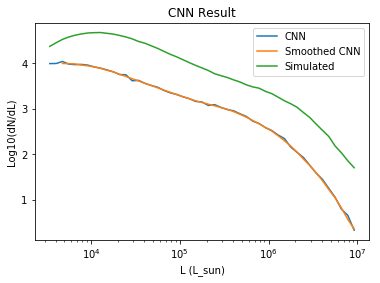

Error and MSE for the given base_number:
[0.60323375463485718, 1.5549658536911011]


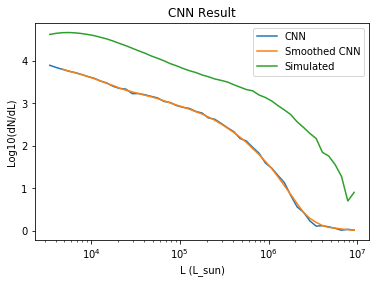

()

In [39]:
cur_lum, cnn_lum = lnn.test_model(adam_test2, random_small_Li_base, 100, 'log', True, pre_pool=4, 
                                  log_input=True, pre_pool_z=10)
lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log')

cur_lum, cnn_lum2 = lnn.test_model(adam_test2, random_small_Li_base, 400, 'log', True, pre_pool=4, 
                                  log_input=True, pre_pool_z=10)
lnn.plot_model_test(cur_lum, cnn_lum2, lumLogBinCents, 'log')

cur_lum, cnn_lum3 = lnn.test_model(adam_test2, random_small_Li_base, 800, 'log', True, pre_pool=4, 
                                  log_input=True, pre_pool_z=10)
lnn.plot_model_test(cur_lum, cnn_lum3, lumLogBinCents, 'log')

# lnn.plot_model_ratio(cnn_lum[0], cnn_lum3, lumLogBinCents, 'log')

# lnn.plot_model_ratio(cnn_lum[0], cnn_lum2, lumLogBinCents, 'log')

Error and MSE for the given base_number:
[0.35888823866844177, 0.86112433671951294]


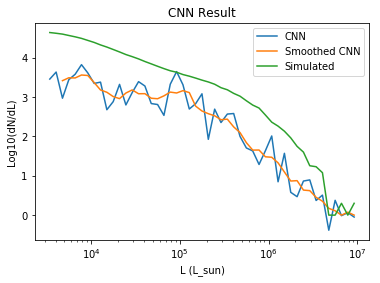

()

In [54]:
cur_lum, cnn_lum = lnn.test_model(small_resnet, random_small_Li_base, 75, 'log', True, pre_pool=4, log_input=True)
lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log')

# cur_lum, cnn_lum = lnn.test_model(small_resnet, random_small_Li_base, 12, 'log', True, pre_pool=4, log_input=True)
# lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log')

# cur_lum, cnn_lum = lnn.test_model(small_resnet, random_small_Li_base, 88, 'log', True, pre_pool=4, log_input=True)
# lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log')

Error and MSE for the given base_number:
[0.01234889030456543, 0.024910794571042061]


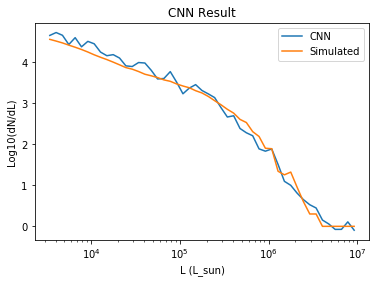

()

In [19]:
cur_lum, cnn_lum = lnn.test_model(smaller_test_no_first_bias2, random_small_Li_base, 2103, 'log', True, pre_pool=4, log_input=True)
lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log')

Error and MSE for the given base_number:
[0.15127968788146973, 0.32752493023872375]


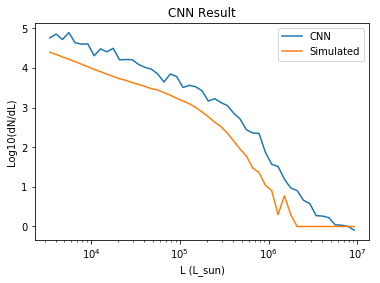

()

In [25]:
cur_lum, cnn_lum = lnn.test_model(smaller_test6, random_small_Li_base, 82, 'log', True, pre_pool=4, log_input=True)
lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log')
# lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2)

Error and MSE for the given base_number:
[0.01234889030456543, 0.024910794571042061]


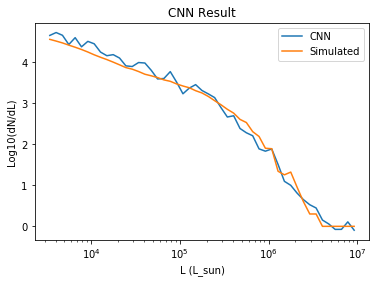

Error and MSE for the given base_number:
[0.021681094542145729, 0.044029410928487778]


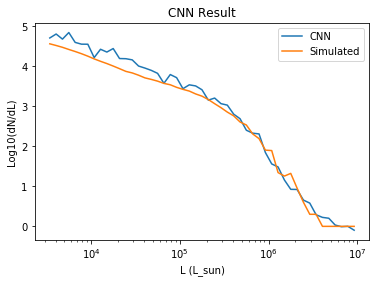

Error and MSE for the given base_number:
[0.089913360774517059, 0.18765988945960999]


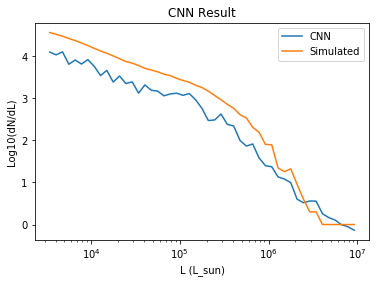

()

In [42]:
cur_lum, cnn_lum = lnn.test_model(smaller_test_no_first_bias2, random_small_Li_base, 2103, 'log', True, pre_pool=4, log_input=True)
lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log')

cur_lum, cnn_lum2 = lnn.test_model(smaller_test6, random_small_Li_base, 2103, 'log', True, pre_pool=4, log_input=True)
lnn.plot_model_test(cur_lum, cnn_lum2, lumLogBinCents, 'log')

cur_lum, cnn_lum2 = lnn.test_model(smaller_test_no_first_bias3, random_small_Li_base, 2103, 'log', True, pre_pool=4, log_input=True)
lnn.plot_model_test(cur_lum, cnn_lum2, lumLogBinCents, 'log')

Error and MSE for the given base_number:
[0.79038441181182861, 2.4729421138763428]


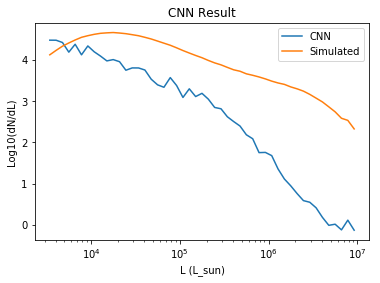

Error and MSE for the given base_number:
[0.74848473072052002, 2.3497734069824219]


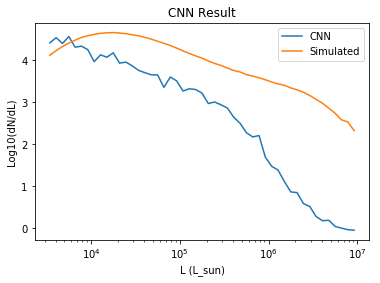

Error and MSE for the given base_number:
[0.79038441181182861, 2.4729421138763428]


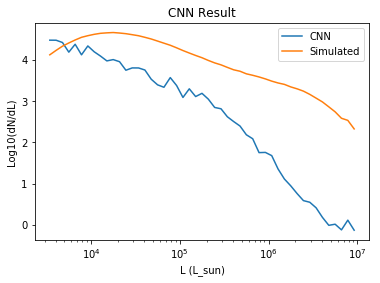

()

In [43]:
base_numb = 3500
cur_lum, cnn_lum = lnn.test_model(smaller_test_no_first_bias2, random_small_Li_base, base_numb, 'log', True, pre_pool=4, log_input=True)
lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log')

cur_lum, cnn_lum2 = lnn.test_model(smaller_test6, random_small_Li_base, base_numb, 'log', True, pre_pool=4, log_input=True)
lnn.plot_model_test(cur_lum, cnn_lum2, lumLogBinCents, 'log')

cur_lum, cnn_lum2 = lnn.test_model(smaller_test_no_first_bias2, random_small_Li_base, base_numb, 'log', True, pre_pool=4, log_input=True)
lnn.plot_model_test(cur_lum, cnn_lum2, lumLogBinCents, 'log')

Error and MSE for the given base_number:
[0.21368700265884399, 0.52552163600921631]


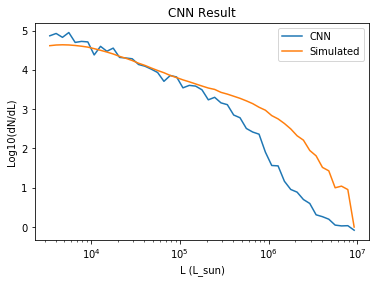

Error and MSE for the given base_number:
[0.048494655638933182, 0.10170084238052368]


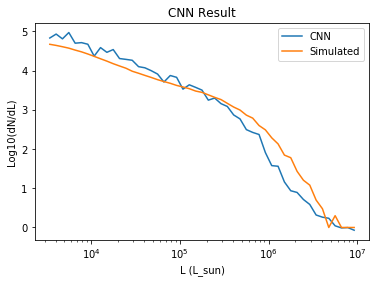

Error and MSE for the given base_number:
[0.16870930790901184, 0.39753967523574829]


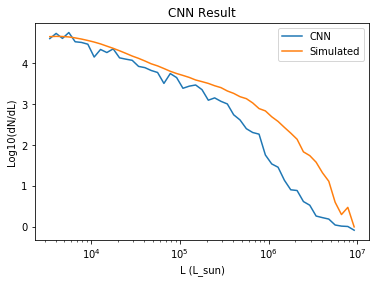

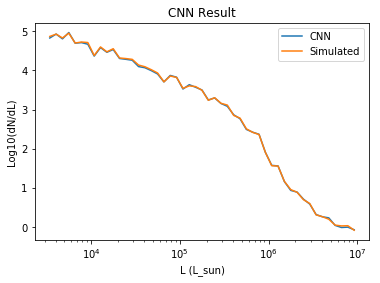

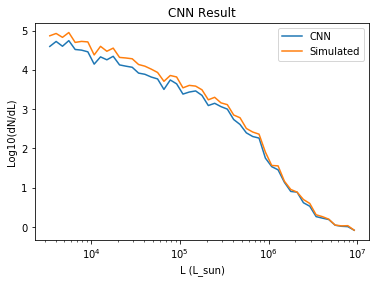

()

In [9]:
cur_lum, cnn_lum = lnn.test_model(smaller_test6, random_small_Li_base, 1157, 'log', True, pre_pool=4, log_input=True)
lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log')
# lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2)

cur_lum, cnn_lum2 = lnn.test_model(smaller_test6, random_small_Li_base, 2223, 'log', True, pre_pool=4, log_input=True)
lnn.plot_model_test(cur_lum, cnn_lum2, lumLogBinCents, 'log')

cur_lum, cnn_lum3 = lnn.test_model(smaller_test6, random_small_Li_base, 3347, 'log', True, pre_pool=4, log_input=True)
lnn.plot_model_test(cur_lum, cnn_lum3, lumLogBinCents, 'log')

lnn.plot_model_test(cnn_lum[0], cnn_lum2, lumLogBinCents, 'log')
lnn.plot_model_test(cnn_lum[0], cnn_lum3, lumLogBinCents, 'log')

Error and MSE for the given base_number:
[0.22707867622375488, 0.56260830163955688]


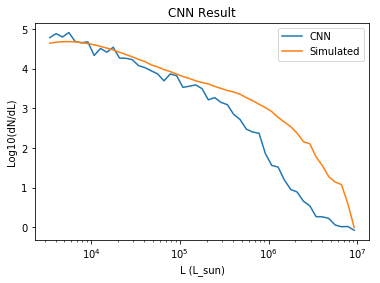

Error and MSE for the given base_number:
[0.23168069124221802, 0.5708458423614502]


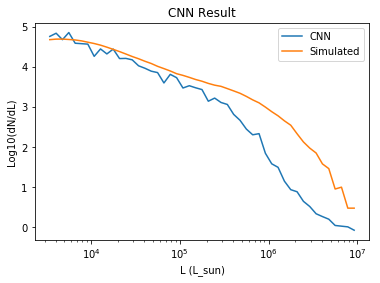

Error and MSE for the given base_number:
[0.80611646175384521, 2.5459144115447998]


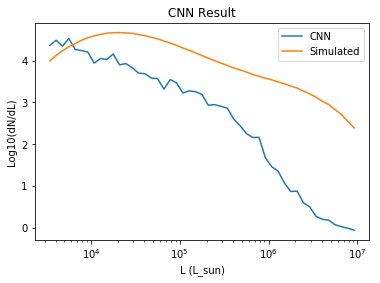

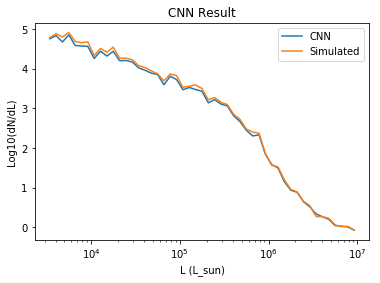

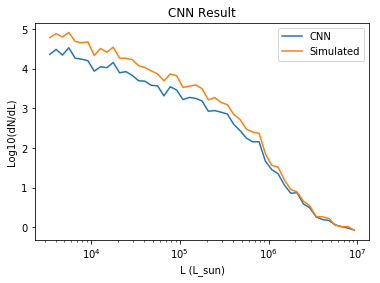

()

In [12]:
cur_lum, cnn_lum = lnn.test_model(smaller_test6, random_small_Li_base, 5555, 'log', True, pre_pool=4, log_input=True)
lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log')
# lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2)

cur_lum, cnn_lum2 = lnn.test_model(smaller_test6, random_small_Li_base, 4444, 'log', True, pre_pool=4, log_input=True)
lnn.plot_model_test(cur_lum, cnn_lum2, lumLogBinCents, 'log')

cur_lum, cnn_lum3 = lnn.test_model(smaller_test6, random_small_Li_base, 3747, 'log', True, pre_pool=4, log_input=True)
lnn.plot_model_test(cur_lum, cnn_lum3, lumLogBinCents, 'log')

lnn.plot_model_test(cnn_lum[0], cnn_lum2, lumLogBinCents, 'log')
lnn.plot_model_test(cnn_lum[0], cnn_lum3, lumLogBinCents, 'log')

Error and MSE for the given base_number:
[7.7816686630249023, 86.828651428222656]


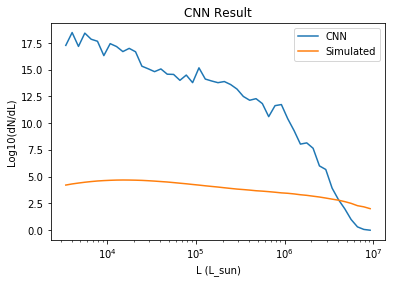

Error and MSE for the given base_number:
[3.1312539577484131, 16.485450744628906]


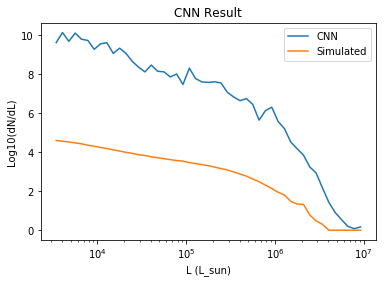

Error and MSE for the given base_number:
[0.66481524705886841, 1.7043135166168213]


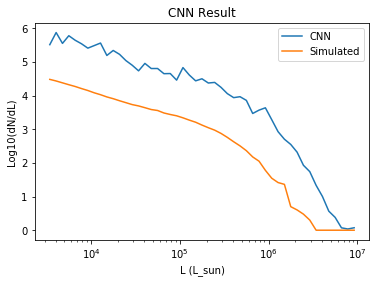

()

In [37]:
cur_lum, cnn_lum = lnn.test_model(smaller_test, random_small_Li_base, 57, 'log', True, pre_pool=4, log_input=True)
lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log')
# lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2)

cur_lum, cnn_lum = lnn.test_model(smaller_test, random_small_Li_base, 23, 'log', True, pre_pool=4, log_input=True)
lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log')

cur_lum, cnn_lum = lnn.test_model(smaller_test, random_small_Li_base, 47, 'log', True, pre_pool=4, log_input=True)
lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log')

Error and MSE for the given base_number:
[0.01174742728471756, 0.023698130622506142]


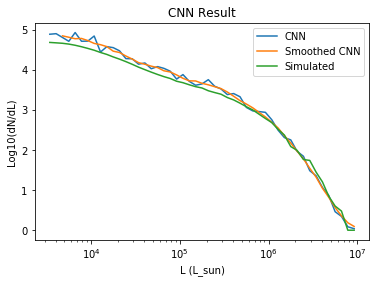

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/tools.py:239: RuntimeWarning: divide by zero encountered in true_divide
  ratio = cnn_lum[0]/cur_lum
/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/tools.py:240: RuntimeWarning: divide by zero encountered in true_divide
  ratio_smooth = avg/cur_lum


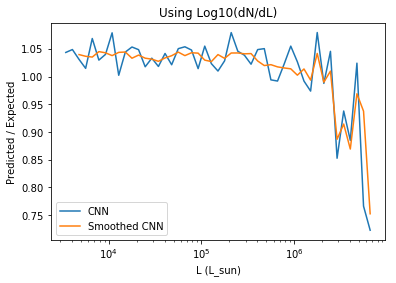

()

In [19]:
cur_lum, cnn_lum = lnn.test_model(log_lum_full_in_6_layer_kernel_3_2D, base, 100, 'log', False)
lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log')
lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2)

Error and MSE for the given base_number:
[0.0071315523236989975, 0.01434650830924511]


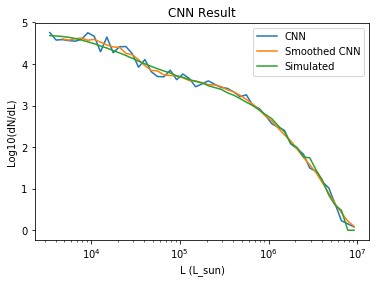

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/tools.py:239: RuntimeWarning: divide by zero encountered in true_divide
  ratio = cnn_lum[0]/cur_lum
/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/tools.py:240: RuntimeWarning: divide by zero encountered in true_divide
  ratio_smooth = avg/cur_lum


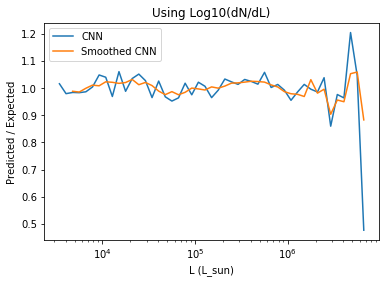

()

In [22]:
cur_lum, cnn_lum = lnn.test_model(log_lum_full_in_6_resnet_basic_Li, base, 100, 'log', True)
lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log')
lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2)

Error and MSE for the given base_number:
[0.14856645464897156, 0.31697973608970642]


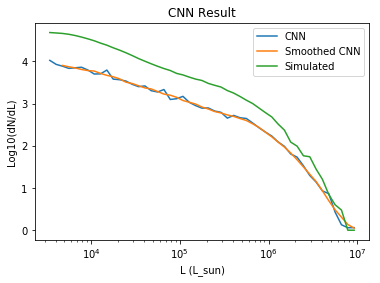

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/tools.py:239: RuntimeWarning: divide by zero encountered in true_divide
  plt.title('Using dN/dL')
/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/tools.py:240: RuntimeWarning: divide by zero encountered in true_divide
  elif title == 'basicL':


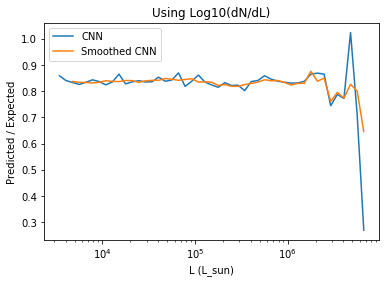

()

In [68]:
cur_lum, cnn_lum = lnn.test_model(log_lum_full_in_6_layer_2D_basic_Li, base, 100, 'log', False)
lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log')
lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2)

Error and MSE for the given base_number:
[0.34568053483963013, 0.88712108135223389]


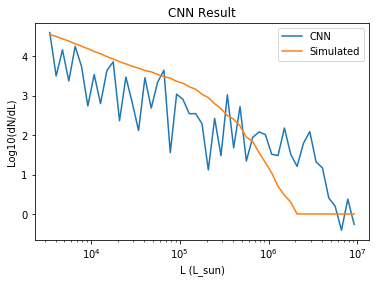

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/tools.py:257: RuntimeWarning: divide by zero encountered in true_divide
  ratio = cnn_lum[0]/cur_lum
/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/tools.py:258: RuntimeWarning: divide by zero encountered in true_divide
  ratio_smooth = avg/cur_lum


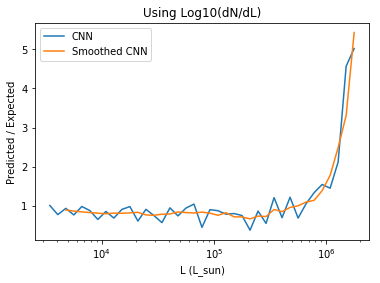

()

In [44]:
cur_lum, cnn_lum = lnn.test_model(log_lum_full_in_6_resnet_random_small_Li, random_small_Li_base, 1000, 'log', True)
lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log')
lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2)

Error and MSE for the given base_number:
[0.51578080654144287, 1.2918776273727417]


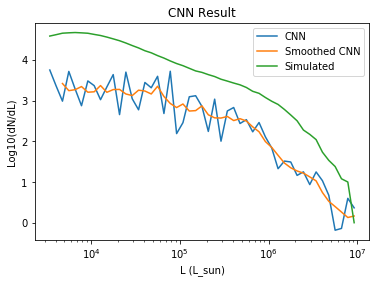

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/tools.py:239: RuntimeWarning: divide by zero encountered in true_divide
  ratio = cnn_lum[0]/cur_lum
/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/tools.py:240: RuntimeWarning: divide by zero encountered in true_divide
  ratio_smooth = avg/cur_lum


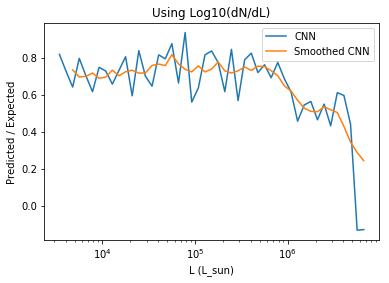

()

In [19]:
cur_lum, cnn_lum = lnn.test_model(log_lum_full_in_6_resnet_hyper_params_64_layers_random_small_Li, random_small_Li_base, 100, 'log', True)
lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log')
lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2)

Error and MSE for the given base_number:
[0.41637143492698669, 0.98827308416366577]


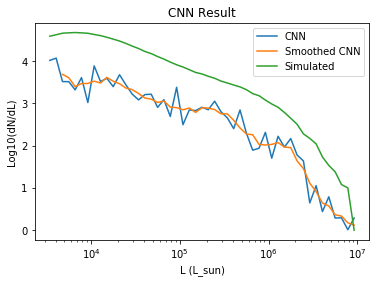

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/tools.py:239: RuntimeWarning: divide by zero encountered in true_divide
  ratio = cnn_lum[0]/cur_lum
/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/tools.py:240: RuntimeWarning: divide by zero encountered in true_divide
  ratio_smooth = avg/cur_lum


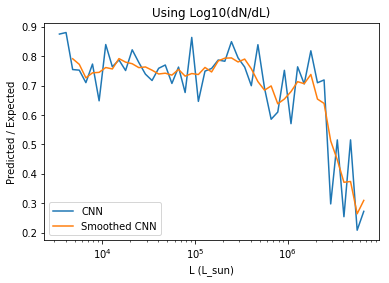

()

In [20]:
cur_lum, cnn_lum = lnn.test_model(log_lum_full_in_6_resnet_hyper_params_small_128_layers_random_small_Li, random_small_Li_base, 100, 'log', True)
lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log')
lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2)

Error and MSE for the given base_number:
[0.27200287580490112, 0.62348788976669312]


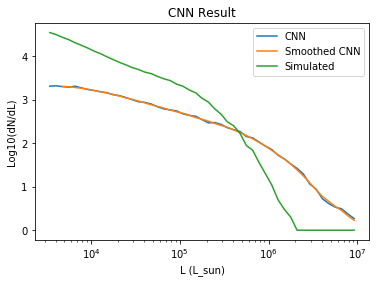

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/tools.py:239: RuntimeWarning: divide by zero encountered in true_divide
  plt.title('Using dN/dL')
/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/tools.py:240: RuntimeWarning: divide by zero encountered in true_divide
  elif title == 'basicL':


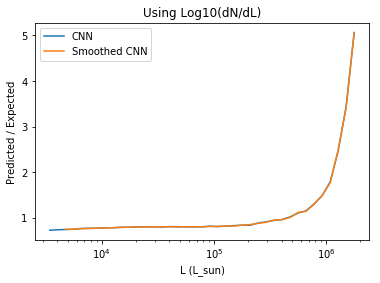

()

In [70]:
cur_lum, cnn_lum = lnn.test_model(log_lum_full_in_6_layer_2D_random_small_Li, random_small_Li_base, 1000, 'log', False)
lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log')
lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2)

Error and MSE for the given base_number:
[0.39584124088287354, 0.93391740322113037]


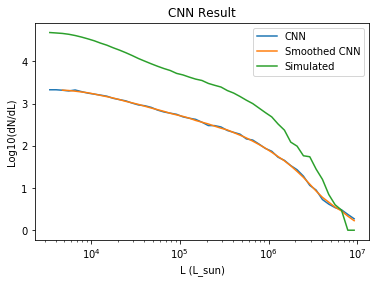

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/tools.py:239: RuntimeWarning: divide by zero encountered in true_divide
  plt.title('Using dN/dL')
/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/tools.py:240: RuntimeWarning: divide by zero encountered in true_divide
  elif title == 'basicL':


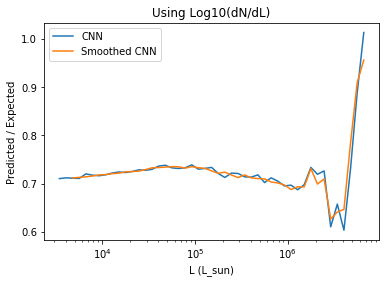

()

In [71]:
cur_lum, cnn_lum = lnn.test_model(log_lum_full_in_6_layer_2D_random_small_Li, base, 100, 'log', False)
lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log')
lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2)

[[[[ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   ..., 
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]]

  [[ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   ..., 
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]]

  [[ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   ..., 
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]]

  ..., 
  [[ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   ..., 
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]]

  [[ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   ..., 
   [ 0.  0.  0. ..., 

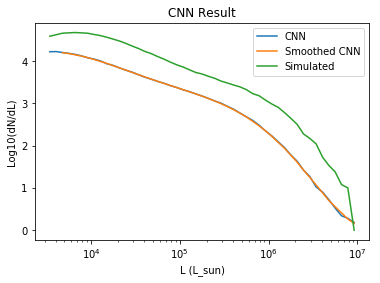

()

In [61]:
cur_lum, cnn_lum = lnn.test_model(log_lum_full_in_6_layer_2D_hyper_params_random_small_Li, random_small_Li_base, 100, 'log', False, False)
print(cur_lum)
print(cnn_lum)
lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log')

[ 4.60198398  4.6443598   4.67411679  4.69620781  4.70457945  4.70126569
  4.69043532  4.66985593  4.64052119  4.60602647  4.56420431  4.51806625
  4.46289191  4.40573898  4.34613773  4.28717446  4.22873391  4.1571242
  4.09173728  4.02193317  3.96421247  3.89878001  3.85642677  3.7909182
  3.74476224  3.69055046  3.6527297   3.59128727  3.54319859  3.49679132
  3.4372748   3.36977229  3.31534048  3.22349594  3.13097669  3.04805317
  2.94497591  2.81954394  2.68124124  2.56466606  2.39967372  2.2121876
  2.04139269  1.8260748   1.61278386  1.38021124  0.90308999  0.77815125
  0.47712125]
[[ 4.11657286  4.11996078  4.09913588  4.07927561  4.05502224  4.02174759
   3.97517061  3.94657922  3.90456653  3.83987427  3.80018544  3.74177241
   3.69003034  3.6461637   3.58542681  3.52886367  3.48297548  3.43164659
   3.39034772  3.33521461  3.29259777  3.23983526  3.19691849  3.144315
   3.09625912  3.03972435  2.97923064  2.92983723  2.85702968  2.78868699
   2.69921994  2.61382675  2.53019595

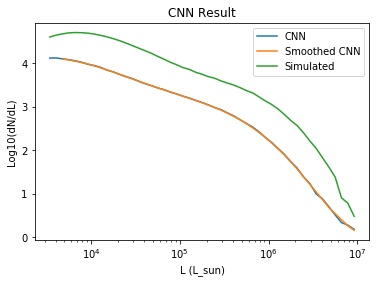

()

In [31]:
cur_lum2, cnn_lum2 = lnn.test_model(log_lum_full_in_6_layer_2D_hyper_params_random_small_Li, random_small_Li_base, 300, 'log', False, False)
print(cur_lum2)
print(cnn_lum2)
lnn.plot_model_test(cur_lum2, cnn_lum2, lumLogBinCents, 'log')

In [34]:
test_cnn = cnn_lum
cnn_lum/cnn_lum2

array([[ 1.01863039,  1.01867032,  1.01845932,  1.01843119,  1.01854205,
         1.01837647,  1.0184437 ,  1.01834893,  1.01840878,  1.0182339 ,
         1.01837373,  1.01852751,  1.01828945,  1.01826799,  1.01842344,
         1.01815474,  1.01826751,  1.01853132,  1.0182246 ,  1.01828003,
         1.01827419,  1.01821482,  1.01835442,  1.01839459,  1.01841319,
         1.01818919,  1.01828694,  1.01805556,  1.01824701,  1.01811385,
         1.01828647,  1.01771605,  1.01846862,  1.01820672,  1.01782334,
         1.01777601,  1.01795685,  1.01769567,  1.01835716,  1.01804471,
         1.01515865,  1.0200665 ,  1.01898968,  1.01760983,  1.01902819,
         1.01940346,  1.01439428,  1.00682628,  1.01088572]], dtype=float32)

0
[[ 0.99273479  0.99261767  0.99230802  0.99235868  0.992387    0.99233633
   0.99206412  0.99207503  0.99221289  0.99211204  0.99195933  0.99201179
   0.99199587  0.99198085  0.9919517   0.99191296  0.99200135  0.99211597
   0.99203622  0.99202049  0.99220347  0.99195892  0.99194783  0.9918282
   0.99212825  0.99153179  0.99135721  0.99109751  0.99139339  0.9910785
   0.99077761  0.99041259  0.99065369  0.99043196  0.99048221  0.98881465
   0.98934913  0.98748076  0.98923284  0.9871285   0.98440522  0.98661149
   0.98278499  0.98310924  0.97822857  0.98076636  0.97447634  0.97135574
   0.96734387]]


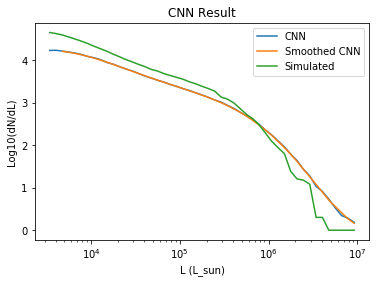

1
[[ 1.00332439  1.00346625  1.00299358  1.00307548  1.00343621  1.00327623
   1.00350523  1.00326192  1.00316846  1.00291693  1.00304556  1.003425
   1.00326228  1.00332808  1.00357902  1.00268757  1.00321162  1.00373876
   1.00304568  1.00306439  1.00344932  1.00306034  1.0035423   1.00344527
   1.00346899  1.00331557  1.00295556  1.00337636  1.00333297  1.00334382
   1.00286758  1.00232744  1.0035094   1.0040009   1.00350857  1.00323093
   1.00240481  1.00107646  1.0047549   1.00159371  0.9990235   1.00218594
   1.00321853  0.99835187  0.99646169  1.00226092  0.99338669  1.00512052
   1.00603604]]


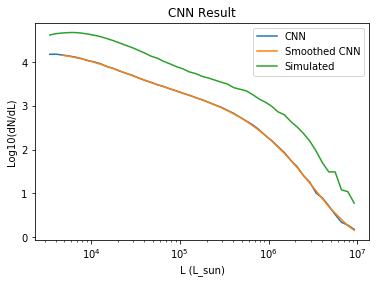

2
[[ 1.01709056  1.01731062  1.01713026  1.01676476  1.01716566  1.01693928
   1.01724279  1.01712143  1.01733434  1.0169822   1.01700211  1.01723886
   1.01732397  1.0170176   1.01703298  1.01704741  1.01705456  1.01727283
   1.01718473  1.01739359  1.01754868  1.01727509  1.01747561  1.01745844
   1.01738596  1.01703608  1.01739419  1.01731479  1.01764476  1.01771641
   1.017079    1.01719511  1.01785123  1.01806355  1.01817441  1.01762235
   1.01699495  1.01716983  1.01997638  1.01741159  1.01578355  1.02155304
   1.01560998  1.01904976  1.01645565  1.0184809   1.03377867  1.01798904
   1.0268594 ]]


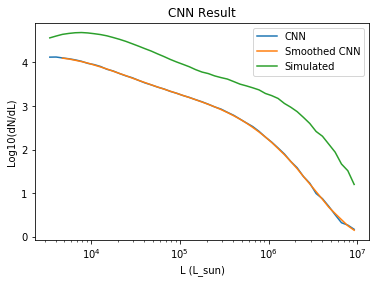

3
[[ 1.07228434  1.07251036  1.07300949  1.07255888  1.07217002  1.07217586
   1.07223856  1.07245481  1.07265377  1.07285678  1.0717411   1.07150733
   1.07153594  1.07134223  1.07173109  1.07225823  1.07237971  1.07121301
   1.07149148  1.0721885   1.07242262  1.07224488  1.07200778  1.07190406
   1.07218635  1.07089782  1.07027364  1.06999624  1.07112002  1.07155323
   1.06869233  1.07117927  1.06943083  1.07062435  1.07163072  1.06861567
   1.06516623  1.06520641  1.06414795  1.06244409  1.06515563  1.05901718
   1.05396628  1.06933141  1.04355061  1.0712924   1.05356205  1.05882025
   1.06117213]]


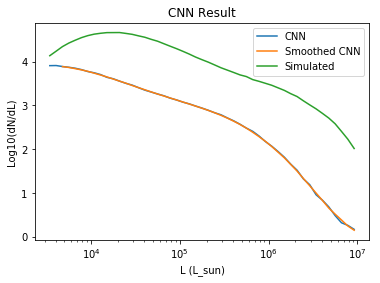

4
[[ 0.99306935  0.99303406  0.99274039  0.99282765  0.99288446  0.99287432
   0.99262071  0.99269265  0.99286664  0.99275082  0.99261606  0.99259734
   0.99264097  0.99268723  0.99266016  0.99257576  0.99266165  0.99271643
   0.99265158  0.99264836  0.99287784  0.99259728  0.99256724  0.99246716
   0.99281573  0.99231356  0.99202168  0.99206805  0.99230194  0.99197322
   0.99181306  0.991485    0.99185896  0.99171686  0.99169457  0.99073666
   0.99064714  0.98939651  0.99151492  0.98997772  0.98812306  0.98989636
   0.98731804  0.98793215  0.98338234  0.98931706  0.9849121   0.9788574
   0.98090643]]


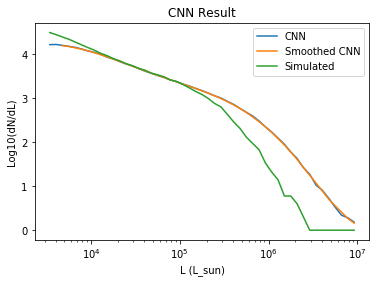

5
[[ 0.99572337  0.99584985  0.9955821   0.99559242  0.99576563  0.99556267
   0.99569368  0.99559826  0.99583995  0.99554271  0.99558061  0.99579215
   0.99557632  0.99567115  0.99562198  0.99536514  0.99556404  0.99574733
   0.9955793   0.99546921  0.99559206  0.99557227  0.9956823   0.99556059
   0.99568951  0.99548024  0.99513656  0.99573231  0.99575859  0.99551749
   0.99551421  0.99499863  0.99582303  0.9961471   0.99567181  0.9959144
   0.99425656  0.99494171  0.99657017  0.99577165  0.99175525  0.99397141
   0.99382514  0.99315709  0.9914555   0.99583596  0.99090284  0.9944483
   0.99812406]]


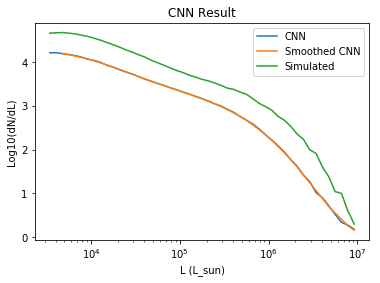

6
[[ 0.99171716  0.99163103  0.99133444  0.99135882  0.99150741  0.99146634
   0.99132824  0.99136788  0.99146122  0.99132526  0.99123377  0.9912861
   0.99123043  0.99128747  0.99137139  0.9911508   0.99119776  0.99137849
   0.9912948   0.99126065  0.99143994  0.99123961  0.9912262   0.99125308
   0.99150646  0.99102491  0.99078441  0.99084216  0.99112505  0.99060977
   0.99043405  0.99017537  0.99068737  0.99029863  0.99037856  0.98960721
   0.98939842  0.98782229  0.99023038  0.98769611  0.98643351  0.98886049
   0.98687148  0.98546511  0.98234105  0.98511797  0.98497677  0.98094493
   0.97697568]]


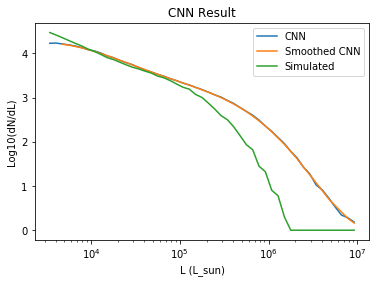

7
[[ 0.99196661  0.99194509  0.99172747  0.99170637  0.99181771  0.99172199
   0.9916268   0.99171466  0.99184006  0.99172121  0.9917109   0.99158728
   0.99157798  0.99156022  0.99156135  0.99157929  0.99162841  0.991759
   0.99163318  0.99175489  0.99177527  0.99158126  0.99162751  0.99172086
   0.99193412  0.99144745  0.99147475  0.99137521  0.99176115  0.99132252
   0.99102032  0.99127495  0.99163771  0.99141628  0.9906081   0.99028736
   0.99027473  0.98899573  0.99023807  0.98844224  0.98776031  0.99049956
   0.98908967  0.98921287  0.98862886  0.99044949  0.9948771   0.97458225
   0.98085678]]


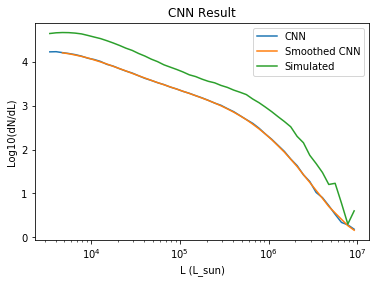

8
[[ 1.0085144   1.00876808  1.00875044  1.00823963  1.00859344  1.00836086
   1.00849545  1.00833714  1.00839627  1.0083499   1.00832701  1.00844646
   1.00817049  1.00798321  1.00834966  1.00808036  1.00847352  1.00858903
   1.00790942  1.00798655  1.0083046   1.00831711  1.0083226   1.00844324
   1.00766027  1.00847709  1.00786841  1.00770915  1.00799918  1.00833035
   1.00819838  1.00748634  1.00838053  1.00802124  1.00810885  1.00675702
   1.00638449  1.00699914  1.00621533  1.00486934  1.00422823  1.00707722
   1.00596642  1.00349605  1.0012958   1.01529038  0.98422122  1.00168312
   0.99372107]]


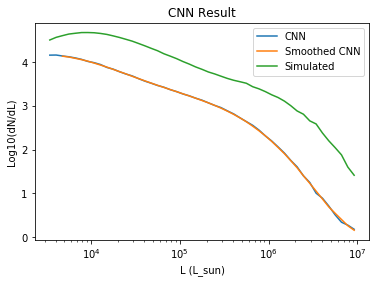

9
[[ 0.99551177  0.99567777  0.99534798  0.99539012  0.99549472  0.99544334
   0.9951238   0.99513429  0.99540472  0.99542546  0.99520314  0.99521506
   0.99527818  0.99517554  0.99531859  0.99525785  0.99536556  0.99522889
   0.99529958  0.99535364  0.99554688  0.99533528  0.99524796  0.99514937
   0.9954704   0.99516636  0.99490005  0.99468815  0.99519527  0.99513459
   0.99534774  0.99485415  0.9953025   0.99545509  0.9957692   0.99516594
   0.99513227  0.99585664  0.99647659  0.99667895  0.99422503  0.99725783
   0.99461293  1.00073147  0.99845815  1.00513124  0.99097794  0.9737606
   0.99001908]]


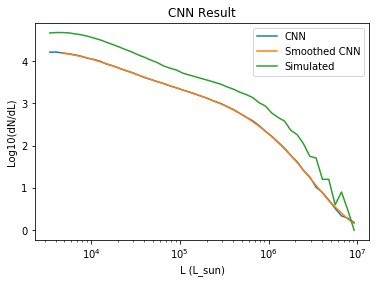

10
[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]


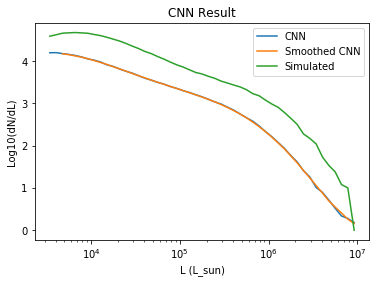

11
[[ 0.78300273  0.78392994  0.78386581  0.78420913  0.7837677   0.78359073
   0.78349072  0.78339547  0.7840966   0.78330904  0.78347558  0.78366625
   0.78327191  0.7835905   0.78331751  0.78393656  0.78336692  0.78325683
   0.78201783  0.78365362  0.78357047  0.78265417  0.78369677  0.78435171
   0.78370154  0.78306872  0.78346825  0.78333813  0.78413033  0.78562897
   0.78161806  0.78410256  0.78417492  0.7840426   0.78191286  0.78409386
   0.77962071  0.78243369  0.77703345  0.77192801  0.77844232  0.78344601
   0.77619416  0.76926708  0.79738683  0.76328886  0.77782345  0.79167539
   0.79453999]]


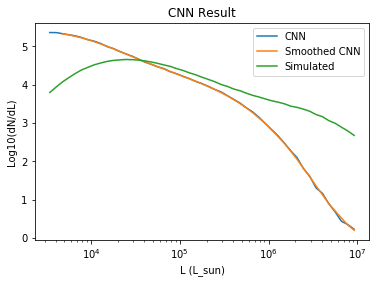

12
[[ 0.99820745  0.99806678  0.99775314  0.99768561  0.99787319  0.9976483
   0.99756026  0.99748325  0.99750888  0.99742681  0.99728745  0.99752498
   0.99736607  0.99731052  0.9973796   0.99719089  0.99733293  0.99758279
   0.99744004  0.9973405   0.99753904  0.99748123  0.99740469  0.99750876
   0.99743873  0.9973321   0.99689716  0.9967106   0.99704391  0.99653453
   0.99670893  0.99591911  0.99639481  0.99608481  0.99627376  0.99457586
   0.99436867  0.99280083  0.99486172  0.99192107  0.98790878  0.9904471
   0.98874342  0.98615468  0.98161507  0.9828577   0.97131479  0.97154236
   0.96892029]]


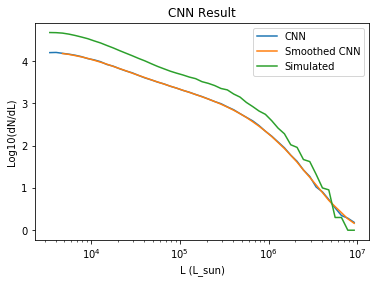

13
[[ 0.99237025  0.99229693  0.9921633   0.99210757  0.99210083  0.99203491
   0.99210072  0.99196243  0.99207586  0.99203575  0.99184555  0.99196094
   0.99192095  0.99193221  0.99193108  0.99179864  0.99197555  0.99191922
   0.99191952  0.99198425  0.99214381  0.99188441  0.99197811  0.99216431
   0.99209356  0.99170136  0.99171442  0.99137741  0.9916687   0.99120212
   0.9910506   0.99100411  0.99096704  0.99107879  0.99073642  0.98938763
   0.98989546  0.98833066  0.98922038  0.98693675  0.98467147  0.98667121
   0.98415029  0.98609918  0.98091805  0.98649359  0.98468548  0.97724086
   0.97590429]]


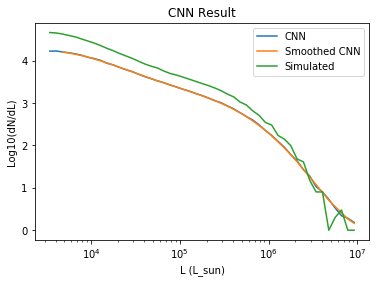

14
[[ 1.22454011  1.22518897  1.22502625  1.22444975  1.22454822  1.22432101
   1.22388721  1.22385836  1.22476864  1.22334707  1.22284353  1.22335768
   1.22259688  1.22239482  1.22244942  1.22353053  1.22314227  1.22181344
   1.22081232  1.22277868  1.22333515  1.22140777  1.22253394  1.2230258
   1.22361362  1.221632    1.22202873  1.22115791  1.22283447  1.224347
   1.22036636  1.22372162  1.2232703   1.22312593  1.22095251  1.2224462
   1.21660376  1.2222749   1.21365082  1.2101804   1.21877193  1.22207463
   1.21710789  1.21072936  1.2244736   1.2005583   1.20318413  1.18250251
   1.17790663]]


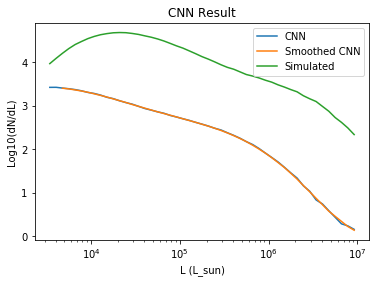

15
[[ 0.99664587  0.99658424  0.99637991  0.99647605  0.99644029  0.99635583
   0.99619955  0.99620426  0.9964093   0.99629927  0.99618191  0.99612242
   0.99619901  0.99618292  0.99609959  0.99620432  0.99623156  0.99617171
   0.99610507  0.99619901  0.99638546  0.99616456  0.99608612  0.99607629
   0.99629664  0.99581003  0.99562556  0.99546206  0.99589258  0.99557221
   0.9953562   0.99519122  0.99550843  0.99527436  0.99538916  0.9937067
   0.99376816  0.99263889  0.99429381  0.99282426  0.99140918  0.99213094
   0.9896369   0.99017191  0.98727745  0.99081242  0.98733371  0.98391658
   0.98129773]]


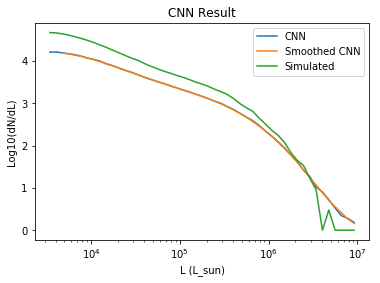

16
[[ 1.0040741   1.00384998  1.00365305  1.00342178  1.00351763  1.00328541
   1.0034281   1.00326025  1.00326598  1.00317013  1.00304723  1.00320888
   1.00313091  1.00284481  1.00296783  1.00301731  1.00303566  1.00292063
   1.00318587  1.00309074  1.00328314  1.00309706  1.00320113  1.00332904
   1.00329053  1.00283968  1.00307846  1.00279987  1.00278819  1.00262785
   1.00210667  1.00182807  1.00163794  1.00098348  1.00114202  0.99945349
   1.00044262  0.99716198  0.9990052   0.99595666  0.99063361  0.99698681
   0.98810166  0.98774391  0.98109466  0.98047233  0.98165441  0.97276449
   0.96367955]]


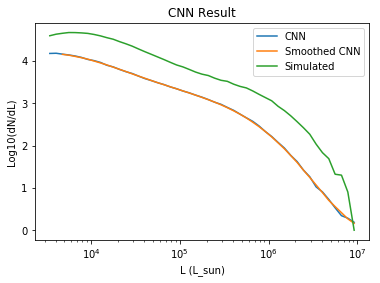

17
[[ 1.01342833  1.01345766  1.0131954   1.01298606  1.01303923  1.01306629
   1.01311696  1.0131408   1.01313794  1.01290762  1.01281714  1.01281333
   1.01256752  1.01280081  1.01280797  1.0125351   1.0125742   1.01276171
   1.01269948  1.01281488  1.01279211  1.01248312  1.0127281   1.01290381
   1.01334012  1.01201832  1.01214015  1.01194406  1.01239514  1.01203752
   1.01078248  1.01190889  1.01150548  1.01128125  1.0112443   1.01054192
   1.0103128   1.00652695  1.00906324  1.00528777  1.00661194  1.00677299
   1.00303626  1.00399899  1.00031304  1.00829995  1.00900972  1.00268149
   0.99503565]]


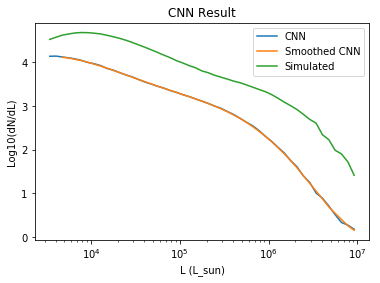

18
[[ 0.99779457  0.99770349  0.99753398  0.99739093  0.99758703  0.99759173
   0.99760991  0.99756962  0.9976179   0.9977206   0.99747485  0.9974755
   0.99750674  0.99744684  0.99765396  0.99752039  0.99757874  0.9976294
   0.99790806  0.99768561  0.99789488  0.99767631  0.99756825  0.99788696
   0.99772155  0.99748039  0.99732429  0.99711543  0.99735701  0.99691886
   0.99698502  0.99692446  0.9971205   0.99682134  0.99809521  0.99623781
   0.99619365  0.99499035  0.99677902  0.99419999  0.99201894  0.99592847
   0.99265379  0.99532568  0.99031198  0.99798161  0.99783784  0.99012864
   0.99111098]]


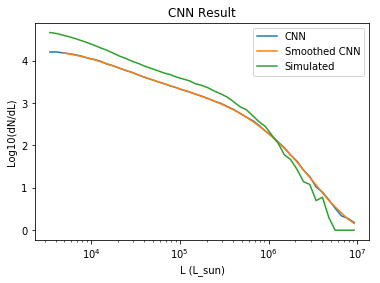

19
[[ 1.00970054  1.00996804  1.00969744  1.00974035  1.009969    1.00980937
   1.01000476  1.00972116  1.00978255  1.00980043  1.00967526  1.00994408
   1.00988722  1.01000082  1.01003683  1.00962615  1.00989664  1.0100925
   1.00973666  1.00998378  1.01017678  1.00991452  1.01005352  1.00997353
   1.00998974  1.00978434  1.00970554  1.00949538  1.00985467  1.01008701
   1.00953329  1.00955367  1.00998664  1.01100707  1.01105857  1.01050818
   1.00868738  1.00915551  1.0110358   1.00914168  1.00701773  1.00784338
   1.0059973   1.01100039  1.00960279  1.01055241  1.00761771  1.01348579
   1.01505589]]


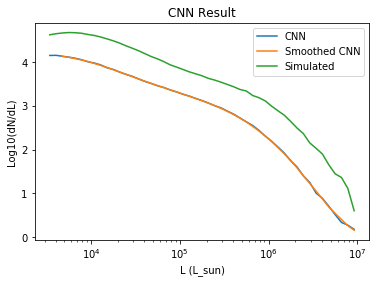

20
[[ 0.99620229  0.99618244  0.99595982  0.99583459  0.99603814  0.9959085
   0.99592471  0.99589092  0.9959482   0.99584156  0.99569494  0.99577194
   0.99573576  0.99567467  0.99578959  0.99569237  0.99577975  0.99587727
   0.99574685  0.99581063  0.99606824  0.99577266  0.99582434  0.99591959
   0.99591762  0.99560916  0.99553841  0.99533051  0.99570405  0.99534869
   0.99483818  0.99475795  0.99520785  0.99470353  0.99477643  0.99367082
   0.99381238  0.99183053  0.99385887  0.99034029  0.9883616   0.99367058
   0.98931074  0.98659039  0.9848088   0.98877996  0.98837602  0.98388785
   0.97823775]]


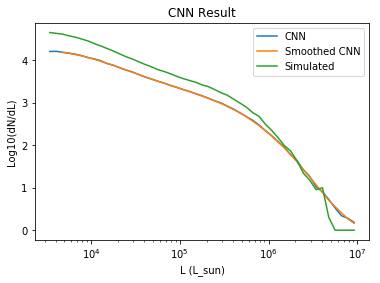

21
[[ 0.99309963  0.99303335  0.99276835  0.99280351  0.9928987   0.99288338
   0.99270809  0.99274021  0.99286121  0.99275291  0.99263275  0.9926824
   0.99268258  0.99268109  0.99273562  0.99261051  0.99268371  0.99277943
   0.99267054  0.99269611  0.99290776  0.9927128   0.99265504  0.99267137
   0.99289525  0.99244785  0.99221897  0.992257    0.99254042  0.99221152
   0.9919585   0.99175161  0.992194    0.9919486   0.99210989  0.99085957
   0.9910264   0.98933518  0.99193001  0.9893766   0.98841363  0.99076748
   0.9882682   0.98957121  0.98416609  0.98871976  0.98498732  0.98068434
   0.97978234]]


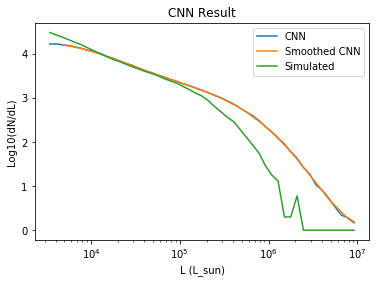

22
[[ 0.9935804   0.99353749  0.99337971  0.99343359  0.99346036  0.99348229
   0.99314636  0.99315518  0.99344444  0.99345779  0.99318278  0.99316901
   0.99316508  0.99317783  0.99327928  0.9931398   0.9932372   0.99326348
   0.9934727   0.99326879  0.993397    0.99341702  0.99318856  0.99331194
   0.99344039  0.99321538  0.99276936  0.99272805  0.99327821  0.99245274
   0.99273986  0.99267131  0.99287301  0.99257809  0.99299145  0.99142116
   0.99204624  0.99073732  0.99193388  0.99064744  0.98849082  0.99077046
   0.99106097  0.9910996   0.98525584  0.99215508  0.97960132  0.97832507
   0.98109472]]


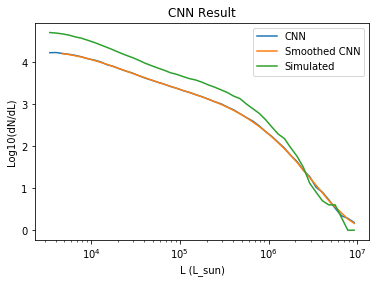

23
[[ 0.99248135  0.99243981  0.99222004  0.99220181  0.99231756  0.99228567
   0.99209183  0.99208724  0.99221832  0.99215883  0.99202126  0.99206716
   0.9920575   0.99203759  0.99213177  0.99198729  0.9921      0.99220121
   0.99203342  0.99212754  0.99233568  0.99209523  0.99211407  0.99202985
   0.99225891  0.99186933  0.99158704  0.99150002  0.99186516  0.99163342
   0.99128985  0.99100912  0.99136722  0.99125314  0.99148732  0.99021953
   0.99030989  0.98903042  0.99096924  0.98860592  0.98756993  0.98971713
   0.98680282  0.98688012  0.98178506  0.98652083  0.9796707   0.97779709
   0.97725415]]


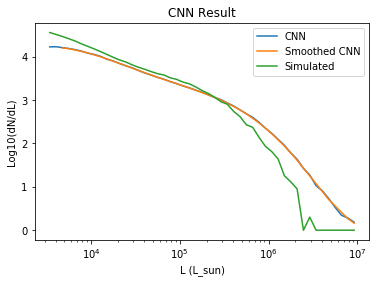

24
[[ 0.99574232  0.99564379  0.99538291  0.99532652  0.9954741   0.99534023
   0.99519742  0.99531174  0.99530786  0.99517751  0.99505866  0.99510765
   0.99503022  0.99506879  0.99508464  0.9949106   0.99506837  0.9952395
   0.99509054  0.99509418  0.99523109  0.9949891   0.99511135  0.99513775
   0.99528712  0.99490249  0.99460906  0.99455804  0.99478239  0.99418938
   0.99411649  0.99388403  0.99424154  0.99391657  0.99367845  0.99257404
   0.99243087  0.99041456  0.99197978  0.98977876  0.98877949  0.99010646
   0.98797446  0.98685849  0.98316985  0.98689491  0.98422623  0.97438407
   0.97344685]]


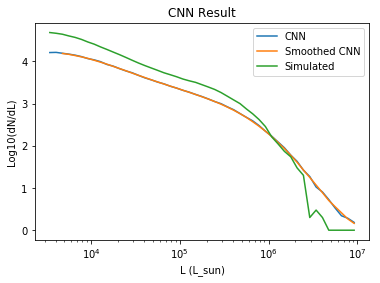

25
[[ 0.99135804  0.99126339  0.99098134  0.99099153  0.99111599  0.99107271
   0.99089944  0.99095303  0.99107969  0.99088597  0.9908517   0.99087054
   0.99081314  0.99086374  0.99091637  0.99076492  0.99075359  0.99092674
   0.99090815  0.99084067  0.99093276  0.99075514  0.99074417  0.99080259
   0.99103904  0.99053818  0.99038678  0.99040127  0.99062204  0.99005806
   0.99005479  0.98989278  0.9902733   0.9898898   0.98983079  0.9889971
   0.98885131  0.98752427  0.98911154  0.98710376  0.98645824  0.98768163
   0.98601311  0.98506838  0.98297268  0.98369515  0.98343682  0.97704577
   0.97606176]]


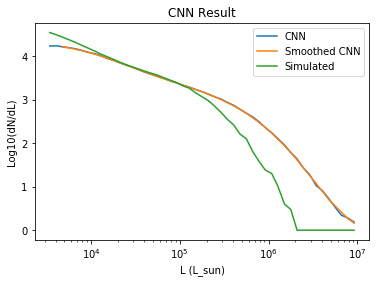

26
[[ 0.52211869  0.52252054  0.52178472  0.52226663  0.52193785  0.52143198
   0.52120519  0.52130425  0.52138215  0.52043509  0.52077788  0.52086896
   0.52055752  0.52080071  0.52030653  0.5207597   0.52061808  0.52088356
   0.51938933  0.52047229  0.52055383  0.51919872  0.52087736  0.52071869
   0.52046549  0.51960075  0.51968032  0.51924908  0.51929432  0.52091891
   0.51683521  0.51763332  0.51855344  0.51768392  0.51495308  0.51515222
   0.51070684  0.51018441  0.50605202  0.50376654  0.50291473  0.50396854
   0.49314922  0.48064983  0.50063103  0.46920869  0.47789547  0.49576795
   0.47662929]]


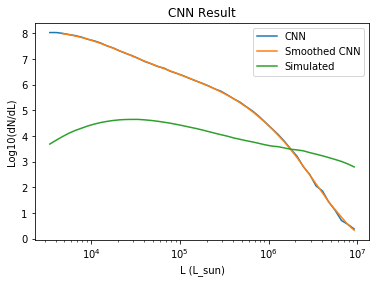

27
[[ 0.99451846  0.99444079  0.99417061  0.99403614  0.99421537  0.99411702
   0.99412668  0.99409235  0.99419248  0.99396664  0.99386144  0.99408174
   0.99391556  0.99392599  0.99403316  0.9938454   0.99387175  0.99405843
   0.99395585  0.9939397   0.99409562  0.99386913  0.99392015  0.9941166
   0.99414819  0.99369097  0.99358994  0.99364311  0.99371624  0.99327081
   0.99319422  0.99296141  0.99330425  0.99294114  0.99296725  0.99208301
   0.99173355  0.99039221  0.99195319  0.98894382  0.98720068  0.99191517
   0.98640352  0.98823649  0.98377061  0.98572391  0.98518658  0.97554296
   0.976385  ]]


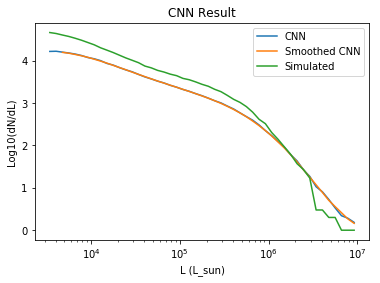

28
[[ 0.98803747  0.98808885  0.98781878  0.98783749  0.9879756   0.98777097
   0.98774791  0.98765916  0.98777425  0.98778683  0.98763603  0.98777634
   0.98772818  0.98774362  0.98777109  0.98757017  0.98777908  0.98797119
   0.98762888  0.9878183   0.98801494  0.98781669  0.98783886  0.98774111
   0.98788214  0.98757362  0.98722732  0.98709172  0.98744732  0.98730695
   0.98712897  0.98655045  0.98706865  0.98725742  0.98726875  0.98612702
   0.98549974  0.98438925  0.98690248  0.98466492  0.98121673  0.98431957
   0.98031753  0.98363799  0.97841704  0.98249918  0.97300059  0.97085589
   0.97330654]]


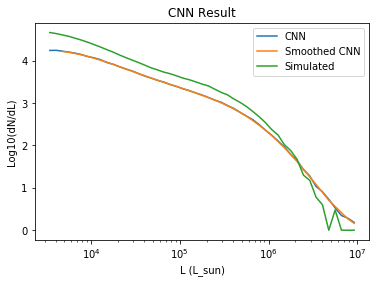

29
[[ 1.0066427   1.00676     1.00632381  1.006006    1.00631905  1.00596035
   1.00574243  1.00555062  1.00595808  1.00538409  1.00542748  1.00567174
   1.00506806  1.00537086  1.00507045  1.00532305  1.00517714  1.00527406
   1.00456965  1.00511348  1.00526047  1.00492716  1.00491023  1.00472391
   1.00542879  1.00438595  1.00414968  1.00351107  1.00448108  1.00448716
   1.00387907  1.00371826  1.00391161  1.00364757  1.00343394  1.00207317
   1.00031781  1.00014651  0.99969     0.99667394  0.99701357  0.99393225
   0.99093115  0.98672676  0.99249488  0.98924112  0.9639014   0.97425145
   0.95013285]]


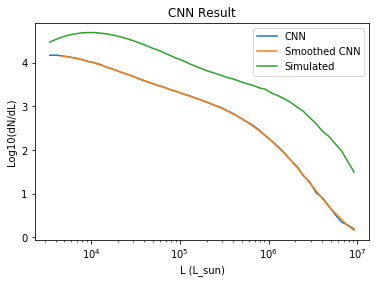

30
[[ 1.01863039  1.01867032  1.01845932  1.01843119  1.01854205  1.01837647
   1.0184437   1.01834893  1.01840878  1.0182339   1.01837373  1.01852751
   1.01828945  1.01826799  1.01842344  1.01815474  1.01826751  1.01853132
   1.0182246   1.01828003  1.01827419  1.01821482  1.01835442  1.01839459
   1.01841319  1.01818919  1.01828694  1.01805556  1.01824701  1.01811385
   1.01828647  1.01771605  1.01846862  1.01820672  1.01782334  1.01777601
   1.01795685  1.01769567  1.01835716  1.01804471  1.01515865  1.0200665
   1.01898968  1.01760983  1.01902819  1.01940346  1.01439428  1.00682628
   1.01088572]]


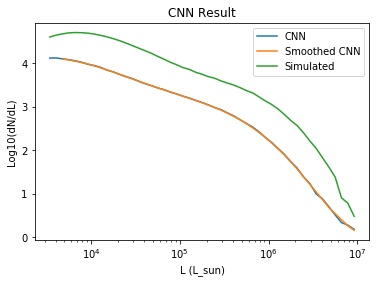

31
[[ 0.989703    0.98966736  0.98940843  0.98937613  0.98952281  0.98949099
   0.98928416  0.98935086  0.9894954   0.98934841  0.98917127  0.9891699
   0.98915523  0.98916453  0.98924357  0.98914796  0.98915738  0.98931199
   0.98923433  0.98919988  0.98933047  0.98914754  0.98913926  0.98912805
   0.98935384  0.98888999  0.98865962  0.98865026  0.9889583   0.98854405
   0.98824668  0.98815626  0.98863608  0.98813564  0.98824066  0.98727089
   0.98720199  0.98586255  0.9870345   0.98524308  0.9847101   0.98741204
   0.98350853  0.98356324  0.98033965  0.98261338  0.97918266  0.97465181
   0.97007221]]


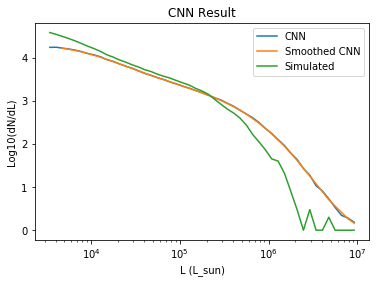

32
[[ 0.9921447   0.99207801  0.99181157  0.99185199  0.99193633  0.99191451
   0.9917087   0.99176902  0.99188644  0.99180782  0.9916721   0.99167162
   0.9916507   0.99169672  0.99173713  0.99165398  0.99170887  0.99178964
   0.99168551  0.99171501  0.99190468  0.99165148  0.991615    0.99161202
   0.99184561  0.99138242  0.99112695  0.99103063  0.99138707  0.99101233
   0.99074739  0.99046278  0.99090624  0.99051964  0.99064362  0.98957193
   0.98949426  0.98796898  0.99003059  0.98762888  0.98655754  0.98842216
   0.98646283  0.98593837  0.98219895  0.98578465  0.98138303  0.97819662
   0.97671551]]


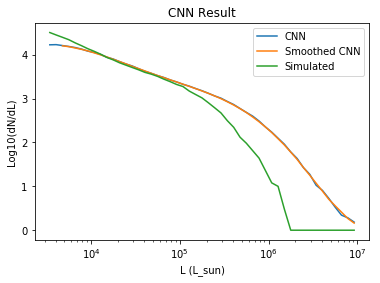

33
[[ 0.9941715   0.99408925  0.99385965  0.99387795  0.99393106  0.9938857
   0.99377966  0.99372953  0.99387258  0.99385762  0.99365854  0.99363446
   0.99376142  0.99366111  0.9937427   0.99363959  0.9937557   0.99385959
   0.99372286  0.99376178  0.99406451  0.99370885  0.99374753  0.99365407
   0.99382281  0.99335665  0.99314779  0.99302256  0.99326253  0.99307901
   0.99271989  0.99239767  0.99279833  0.99251658  0.99295843  0.991175
   0.99164754  0.98983169  0.99176544  0.98972434  0.9868353   0.99160916
   0.98630315  0.98712492  0.98134458  0.98672211  0.98329914  0.98047107
   0.97485137]]


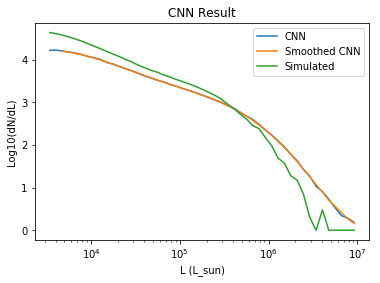

34
[[ 0.99230522  0.99227077  0.99211472  0.9920615   0.9922058   0.99217963
   0.99198353  0.99202281  0.99222142  0.9921791   0.99200106  0.99199963
   0.99201745  0.99202061  0.99200529  0.99213099  0.99204481  0.99203175
   0.99218619  0.99217033  0.99235916  0.992127    0.99202013  0.9920789
   0.99224496  0.99175769  0.99173045  0.99145168  0.99191415  0.99145406
   0.99116915  0.99126911  0.99148744  0.9911716   0.99163717  0.99045569
   0.99025714  0.98956698  0.99062949  0.98859131  0.98745036  0.98961455
   0.98859495  0.98868966  0.98545462  0.9887228   0.99105251  0.98538297
   0.98408991]]


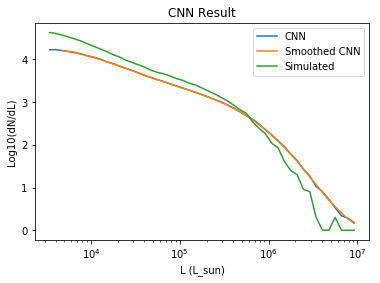

35
[[ 0.99795389  0.99767423  0.99747306  0.99760985  0.99751234  0.99742872
   0.99714786  0.99717689  0.99721611  0.99707294  0.9970116   0.99719959
   0.99693513  0.99705976  0.99694395  0.99693614  0.99697113  0.99702412
   0.99708372  0.99689281  0.99697995  0.99696237  0.99688077  0.99698722
   0.99701321  0.99680525  0.99661475  0.99649817  0.99652439  0.995718
   0.99615628  0.99536824  0.99541599  0.99495459  0.99454778  0.99278432
   0.9940207   0.99190748  0.9923737   0.98955858  0.98809421  0.98841691
   0.98788762  0.9818868   0.97949404  0.97886431  0.97122061  0.96997339
   0.96905214]]


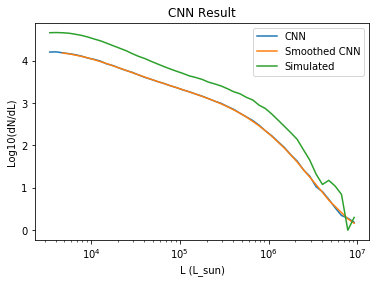

36


KeyboardInterrupt: 

In [35]:
for i in range(100):
    print(i)
    cur_lum, cnn_lum = lnn.test_model(log_lum_full_in_6_layer_2D_hyper_params_random_small_Li, random_small_Li_base, i*10, 'log', False, False)
    print(test_cnn/cnn_lum)
    lnn.plot_model_test(cur_lum, cnn_lum, lumLogBinCents, 'log')
# lnn.plot_model_ratio(cur_lum, cnn_lum, lumLogBinCents, 'log', 2)

In [52]:
log_lum_full_in_6_layer_2D_hyper_params_random_small_Li.layers[0].get_weights()

[array([[[[-0.00493428, -0.01088059,  0.01191645, ...,  0.05011302,
            0.04675707, -0.04847752],
          [ 0.11715354,  0.04348465,  0.02955405, ...,  0.05599158,
           -0.00774271, -0.05240725],
          [ 0.06942842, -0.06016144,  0.00547594, ...,  0.04770487,
            0.0310287 ,  0.04844918],
          ..., 
          [ 0.03983736,  0.02559877,  0.04004673, ..., -0.06670775,
            0.02680099,  0.03013027],
          [ 0.01765029, -0.00751676,  0.01057082, ..., -0.04900242,
           -0.00745065, -0.02425602],
          [ 0.06073467,  0.05296445, -0.02041513, ..., -0.00850822,
            0.01168651, -0.01965198]],
 
         [[ 0.03571729, -0.04479407, -0.0569239 , ..., -0.01603251,
           -0.018597  , -0.00872388],
          [-0.0064277 , -0.06603581, -0.0201553 , ...,  0.09441964,
            0.01717225, -0.03562399],
          [ 0.00307058, -0.03979665, -0.01278489, ...,  0.00558711,
           -0.04375843, -0.02902761],
          ..., 
          [

In [62]:
%autoreload

In [27]:
lnn.test_model_multiple_times(log_lum_full_in_6_resnet_random_small_Li, random_small_Li_base, luminosity_byproduct='log',
                             threeD=True, evaluate=True, log_input=False, make_map_noisy=0,
                             base_numbers=[], test_size=10)

10/10 [==============================] - 374s 37s/step
[0.62532413899898531, 4.3861942112445833]


In [28]:
lnn.test_model_multiple_times(log_lum_full_in_6_layer_2D_random_small_Li, random_small_Li_base, luminosity_byproduct='log',
                             threeD=False, evaluate=True, log_input=False, make_map_noisy=0,
                             base_numbers=[], test_size=10)

10/10 [==============================] - 203s 20s/step
[0.31369823664426805, 2.6980190277099609]


In [33]:
lnn.test_model_multiple_times(log_lum_full_in_6_resnet_hyper_params_random_small_Li, random_small_Li_base, luminosity_byproduct='log',
                             threeD=True, evaluate=True, log_input=False, make_map_noisy=0,
                             base_numbers=[], test_size=10)

10/10 [==============================] - 376s 38s/step
[1.3526564121246338, 45.749858903884885]


In [32]:
lnn.test_model_multiple_times(log_lum_full_in_6_layer_2D_hyper_params_random_small_Li, random_small_Li_base, luminosity_byproduct='log',
                             threeD=False, evaluate=True, log_input=False, make_map_noisy=0,
                             base_numbers=[], test_size=10)

10/10 [==============================] - 204s 20s/step
[0.24814368560910224, 1.6167004168033601]


# Compare Multiple Models

In [25]:
model_keys = ['log_lum_full_in_6_resnet_random_small_Li', 'log_lum_full_in_6_layer_2D_random_small_Li', 
              'log_lum_full_in_6_resnet_hyper_params_random_small_Li', 'log_lum_full_in_6_layer_2D_hyper_params_random_small_Li']
models_dict = {}
models_dict['log_lum_full_in_6_resnet_random_small_Li'] = {'model': log_lum_full_in_6_resnet_random_small_Li, 'luminosity_product': 'log', 'threeD': True}
models_dict['log_lum_full_in_6_layer_2D_random_small_Li'] = {'model': log_lum_full_in_6_layer_2D_random_small_Li, 'luminosity_product': 'log', 'threeD': False}
models_dict['log_lum_full_in_6_resnet_hyper_params_random_small_Li'] = {'model': log_lum_full_in_6_resnet_hyper_params_random_small_Li, 'luminosity_product': 'log', 'threeD': True}
models_dict['log_lum_full_in_6_layer_2D_hyper_params_random_small_Li'] = {'model': log_lum_full_in_6_layer_2D_hyper_params_random_small_Li, 'luminosity_product': 'log', 'threeD': False}

log
log_lum_full_in_6_resnet_random_small_Li
Error and MSE for the given base_number:
[0.3686676025390625, 0.86094391345977783]
0.368667605113
0.0518187479779
log_lum_full_in_6_layer_2D_random_small_Li


/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/tools.py:461: RuntimeWarning: divide by zero encountered in true_divide
  diff = np.log(np.cosh((y_true - y_pred)/y_true))


Error and MSE for the given base_number:
[0.59432226419448853, 1.4640872478485107]
0.594322235563
0.0707195159976
log_lum_full_in_6_resnet_hyper_params_random_small_Li
Error and MSE for the given base_number:
[0.25150558352470398, 0.56139266490936279]
0.251505575934
0.03667915624
log_lum_full_in_6_layer_2D_hyper_params_random_small_Li
Error and MSE for the given base_number:
[0.20506928861141205, 0.44420927762985229]
0.205069297814
0.0377566585921


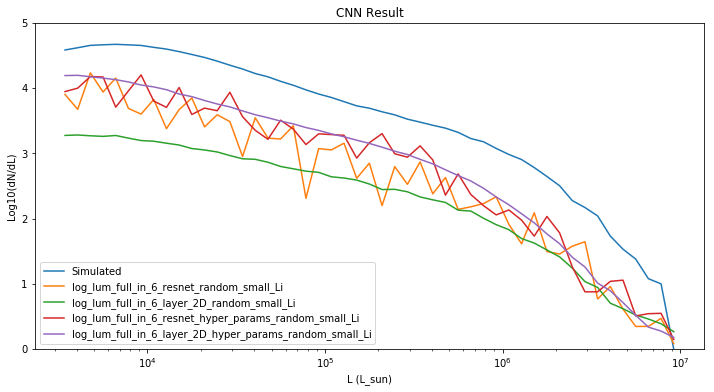

/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/tools.py:353: RuntimeWarning: invalid value encountered in true_divide
  ratio = compare_lum/compare_lum
/home/dpfeffe2/projects/intensitymap_cnn/scripts/lnn/tools.py:358: RuntimeWarning: divide by zero encountered in true_divide
  ratio = cnn_lums[i]/compare_lum


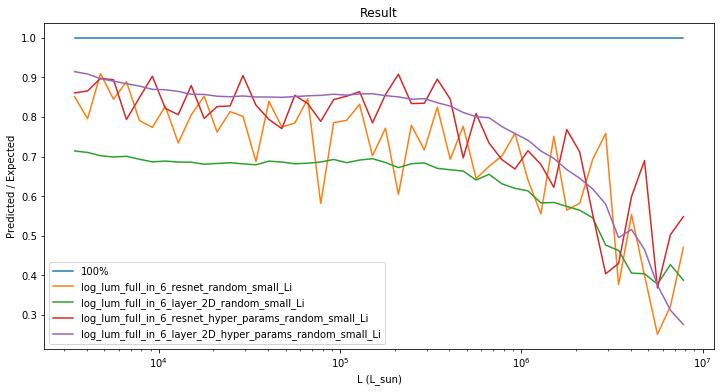

In [26]:
lnn.compare_multiple_models(model_keys, models_dict, random_small_Li_base, 100, lumLogBinCents, end_cut_off=1, 
                            evaluate=True, make_map_noisy=0)

log
log_lum_full_in_6_resnet_random_small_Li
Error and MSE for the given base_number:
[12.504203796386719, 218.49472045898438]
12.5042044196
2.55361950551
log_lum_full_in_6_layer_2D_random_small_Li
Error and MSE for the given base_number:
[1.1960055828094482, 3.5858237743377686]
1.19600549268
0.125740435741
log_lum_full_in_6_resnet_hyper_params_random_small_Li
Error and MSE for the given base_number:
[16.488954544067383, 367.41448974609375]
16.4889559558
3.54832846506
log_lum_full_in_6_layer_2D_hyper_params_random_small_Li
Error and MSE for the given base_number:
[0.63146841526031494, 1.7694895267486572]
0.631468442326
0.0752581484832


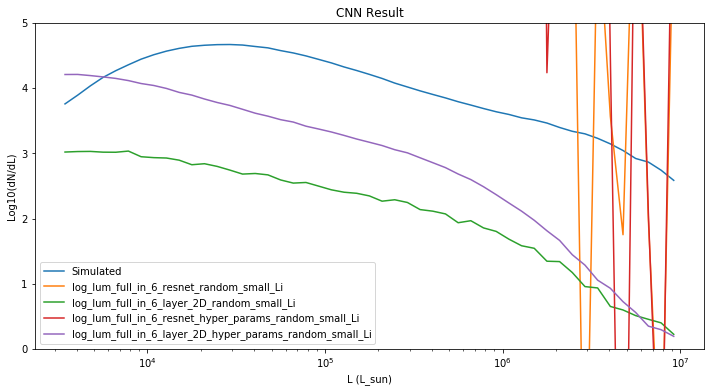

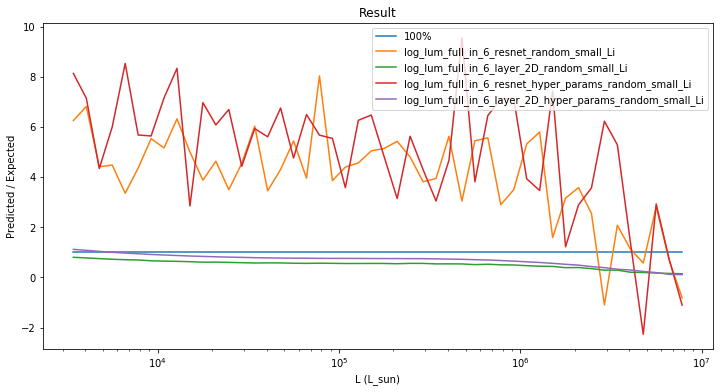

In [35]:
lnn.compare_multiple_models(model_keys, models_dict, random_small_Li_base, 1255, lumLogBinCents, end_cut_off=1, 
                            evaluate=True, make_map_noisy=0)

# Model History

In [27]:
log_lum_full_in_6_resnet_random_small_Li_history = lnn.get_full_history('log_lum_full_in_6_resnet_random_small_Li', modelLoc2)
log_lum_full_in_6_layer_2D_random_small_Li_history = lnn.get_full_history('log_lum_full_in_6_layer_2D_random_small_Li', modelLoc2)

In [29]:
log_lum_full_in_6_resnet_hyper_params_random_small_Li_history = lnn.get_full_history('log_lum_full_in_6_resnet_hyper_params_random_small_Li', modelLoc2)
log_lum_full_in_6_layer_2D_hyper_params_random_small_Li_history = lnn.get_full_history('log_lum_full_in_6_layer_2D_hyper_params_random_small_Li', modelLoc2)

In [32]:
log_lum_full_in_6_layer_2D_basic_Li_history = lnn.get_full_history('log_lum_full_in_6_layer_2D_basic_Li', modelLoc2)
log_lum_full_in_6_layer_kernel_3_2D_history = lnn.get_full_history('log_lum_full_in_6_layer_kernel_3_2D', modelLoc2)

In [21]:
log_lum_full_in_6_resnet_hyper_params_small_128_layers_random_small_Li_history = lnn.get_full_history('log_lum_full_in_6_resnet_hyper_params_small_128_layers_random_small_Li', modelLoc2)
log_lum_full_in_6_resnet_hyper_params_64_layers_random_small_Li_history = lnn.get_full_history('log_lum_full_in_6_resnet_hyper_params_64_layers_random_small_Li', modelLoc2)

In [47]:
smaller_test_history = lnn.get_full_history('smaller_test2', modelLoc2)
smaller_test_no_first_bias_history = lnn.get_full_history('smaller_test_no_first_bias', modelLoc2)
smaller_test_no_first_bias2_history = lnn.get_full_history('smaller_test_no_first_bias2', modelLoc2)

In [21]:
smaller_test_less_lums_high_history = lnn.get_full_history('smaller_test_less_lums_high', modelLoc2)

In [18]:
adam_test2_history = lnn.get_full_history('adam_test2', modelLoc2)
adam_test3_history = lnn.get_full_history('adam_test3', modelLoc2)
adam_test4_history = lnn.get_full_history('adam_test4', modelLoc2)
adam_test5_history = lnn.get_full_history('adam_test5', modelLoc2)
adam_test6_history = lnn.get_full_history('adam_test6', modelLoc2)
adam_test7_history = lnn.get_full_history('adam_test7', modelLoc2)

adam_test2_history


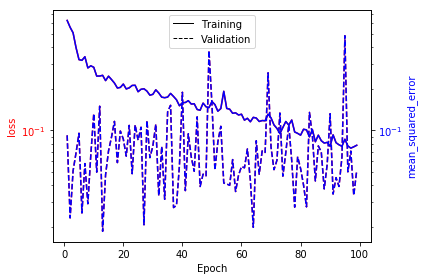

adam_test3_history


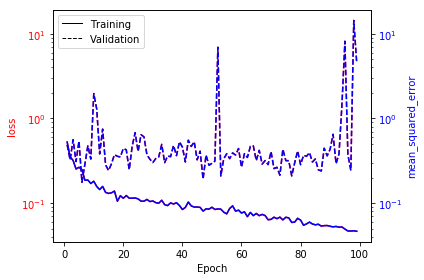

adam_test4_history


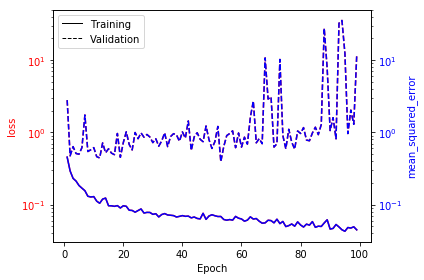

adam_test5_history


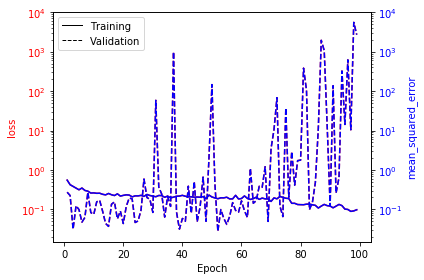

adam_test6_history


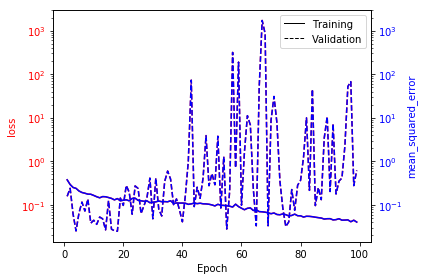

adam_test7_history


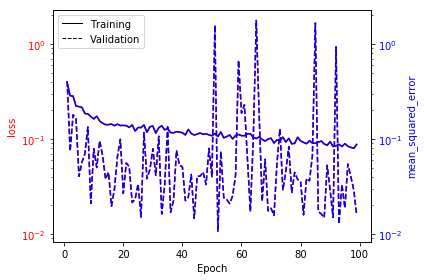

()

In [19]:
print('adam_test2_history')
lnn.history_compare_two_metrics(adam_test2_history)

print('adam_test3_history')
lnn.history_compare_two_metrics(adam_test3_history)

print('adam_test4_history')
lnn.history_compare_two_metrics(adam_test4_history)

print('adam_test5_history')
lnn.history_compare_two_metrics(adam_test5_history)

print('adam_test6_history')
lnn.history_compare_two_metrics(adam_test6_history)

print('adam_test7_history')
lnn.history_compare_two_metrics(adam_test7_history)

smaller_test_less_lums_high_history


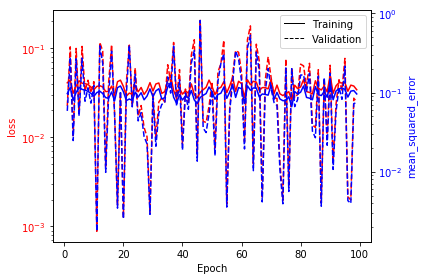

()

In [22]:
print('smaller_test_less_lums_high_history')
lnn.history_compare_two_metrics(smaller_test_less_lums_high_history)

smaller_test_history


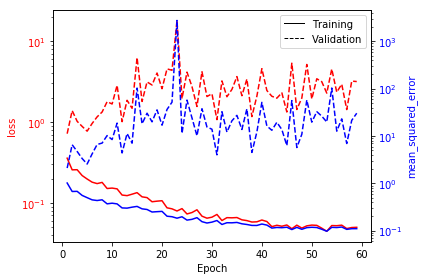

smaller_test_no_first_bias_history


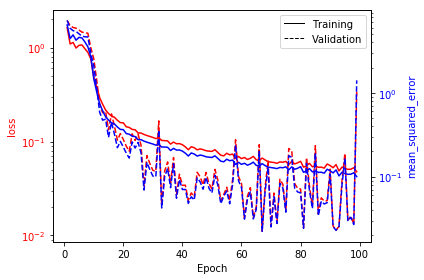

smaller_test_no_first_bias2_history


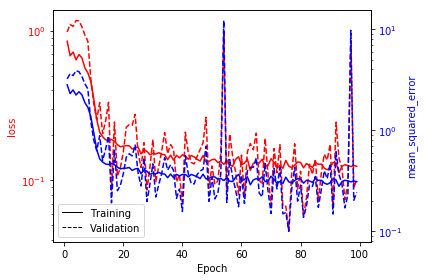

()

In [48]:
print('smaller_test_history')
lnn.history_compare_two_metrics(smaller_test_history)

print('smaller_test_no_first_bias_history')
lnn.history_compare_two_metrics(smaller_test_no_first_bias_history)

print('smaller_test_no_first_bias2_history')
lnn.history_compare_two_metrics(smaller_test_no_first_bias2_history)

log_lum_full_in_6_resnet_random_small_Li_history


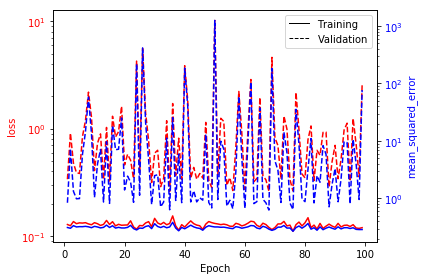

log_lum_full_in_6_layer_2D_random_small_Li_history


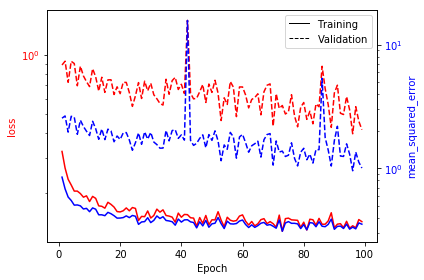

()

In [33]:
print('log_lum_full_in_6_resnet_random_small_Li_history')
lnn.history_compare_two_metrics(log_lum_full_in_6_resnet_random_small_Li_history)

print('log_lum_full_in_6_layer_2D_random_small_Li_history')
lnn.history_compare_two_metrics(log_lum_full_in_6_layer_2D_random_small_Li_history)

log_lum_full_in_6_resnet_hyper_params_random_small_Li_history


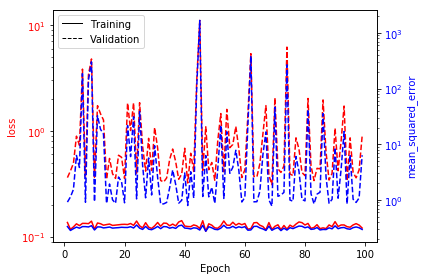

log_lum_full_in_6_layer_2D_hyper_params_random_small_Li_history


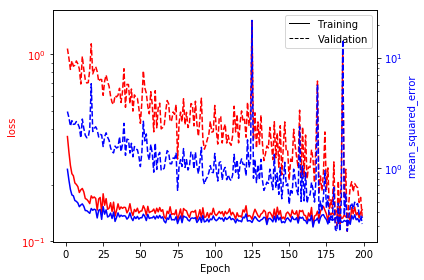

()

In [30]:
print('log_lum_full_in_6_resnet_hyper_params_random_small_Li_history')
lnn.history_compare_two_metrics(log_lum_full_in_6_resnet_hyper_params_random_small_Li_history)

print('log_lum_full_in_6_layer_2D_hyper_params_random_small_Li_history')
lnn.history_compare_two_metrics(log_lum_full_in_6_layer_2D_hyper_params_random_small_Li_history)

log_lum_full_in_6_layer_2D_basic_Li_history


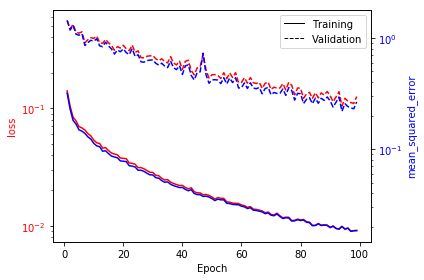

log_lum_full_in_6_layer_kernel_3_2D_history


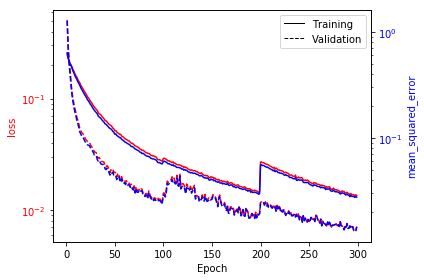

()

In [34]:
print('log_lum_full_in_6_layer_2D_basic_Li_history')
lnn.history_compare_two_metrics(log_lum_full_in_6_layer_2D_basic_Li_history)

print('log_lum_full_in_6_layer_kernel_3_2D_history')
lnn.history_compare_two_metrics(log_lum_full_in_6_layer_kernel_3_2D_history)

log_lum_full_in_6_resnet_hyper_params_small_128_layers_random_small_Li_history


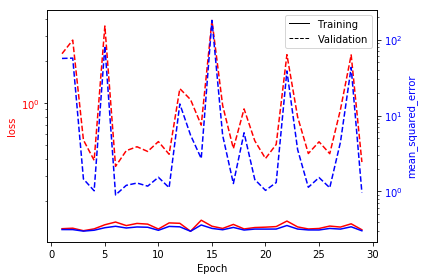

log_lum_full_in_6_resnet_hyper_params_64_layers_random_small_Li_history


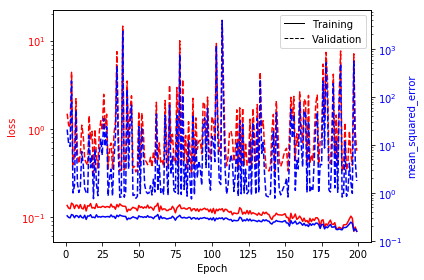

()

In [22]:
print('log_lum_full_in_6_resnet_hyper_params_small_128_layers_random_small_Li_history')
lnn.history_compare_two_metrics(log_lum_full_in_6_resnet_hyper_params_small_128_layers_random_small_Li_history)

print('log_lum_full_in_6_resnet_hyper_params_64_layers_random_small_Li_history')
lnn.history_compare_two_metrics(log_lum_full_in_6_resnet_hyper_params_64_layers_random_small_Li_history)

In [ ]:
keras.callbacks.